<a href="https://colab.research.google.com/github/Mahirtayeb1/Citrus-Leaf-Disease-Detection-Using-CNN/blob/main/Lime_visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import os
import PIL
import glob
import keras
from pathlib import Path
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay
from sklearn import preprocessing, linear_model
import seaborn as sn; sn.set(font_scale=1.4)
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from tqdm import tqdm
from tensorflow import keras
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Conv2D, MaxPooling2D, Activation, Dropout, Flatten
from tensorflow.keras.utils import to_categorical, plot_model, get_file
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications import VGG16
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.applications import EfficientNetB7
from tensorflow.keras.applications import DenseNet201
from tensorflow.keras.applications import InceptionResNetV2
from tensorflow.keras.applications.inception_resnet_v2 import preprocess_input
from tensorflow.keras.applications.densenet import preprocess_input
from tensorflow.keras.applications.efficientnet import preprocess_input
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from tensorflow.keras.applications import MobileNet
from tensorflow.keras.layers import GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import ReduceLROnPlateau
# !pip install Augmentor
# !pip install split-folders[full]
# !pip install Augmentor Pillow

2024-02-03 17:26:47.757899: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-02-03 17:26:49.594789: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2024-02-03 17:26:49.594880: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory
2024-02-03 17:26:49.594888: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Cannot dlopen some TensorRT libraries. If you would like to use Nv

In [ ]:
import os
import tensorflow as tf

# Set TF_CPP_MIN_LOG_LEVEL to suppress warnings
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

# Rest of your code
print(tf.__version__)
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

physical_devices = tf.config.list_physical_devices('GPU')
print(physical_devices)
if len(physical_devices) > 0:
    tf.config.experimental.set_memory_growth(physical_devices[0], True)

2.11.0
Num GPUs Available:  1
[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [ ]:
weights_path = '/mnt/d/Undergrad_thesis/h5_ncleaves'

In [ ]:
root_path = '/mnt/d/Undergrad_thesis/new_citrus_leaves'
dataset_path = os.path.join(root_path,"dataset") #"/content/drive/MyDrive/Thesis P3/new_citrus_leaves"

In [ ]:
num_of_images = {}

for dir in os.listdir(dataset_path):
  num_of_images[dir] = len(os.listdir(os.path.join(dataset_path, dir)))

In [ ]:
os.getcwd()

'/home/mafatay'

In [ ]:
num_of_images.items()

dict_items([('Black spot', 171), ('canker', 163), ('greening', 204), ('new_healthy_citrus', 149)])

In [ ]:
src = os.listdir(dataset_path)
src

['Black spot', 'canker', 'greening', 'new_healthy_citrus']

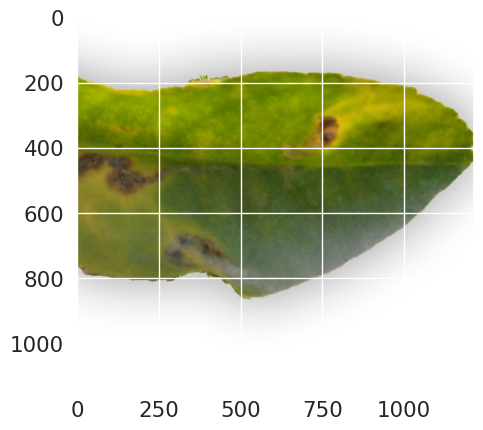

In [ ]:
temp_dir = os.path.join(root_path, 'split_aug', 'train', 'aug_Black spot')
img = image.load_img(os.path.join(temp_dir,os.listdir(temp_dir)[0]))
plt.imshow(img)

In [ ]:
cv2.imread(os.path.join(temp_dir,os.listdir(temp_dir)[0])).shape

(1133, 1216, 3)

In [ ]:
split_aug_path = os.path.join(root_path, 'split_aug') #"/content/drive/MyDrive/Undergrad Thesis/Aug_split_fix"
fnames = os.listdir(split_aug_path)
len(fnames)

3

In [ ]:
fnames

['test', 'train', 'val']

In [ ]:
fnames
split_aug = os.listdir(os.path.join(split_aug_path, fnames[0]))
split_aug

['aug_Black spot', 'aug_canker', 'aug_greening', 'aug_new_healthy_citrus']

/home/mafatay/.local/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
  0%|                                                                                                        | 0/1000 [00:00<?, ?it/s]

1/1 [==============================] - 3s 3s/step


  1%|▉                                                                                              | 10/1000 [00:02<04:17,  3.85it/s]

1/1 [==============================] - 0s 29ms/step


  3%|██▋                                                                                            | 28/1000 [00:02<01:14, 13.02it/s]

1/1 [==============================] - 0s 27ms/step


  4%|███▊                                                                                           | 40/1000 [00:02<00:48, 19.70it/s]

1/1 [==============================] - 0s 28ms/step


  6%|█████▋                                                                                         | 60/1000 [00:03<00:28, 33.48it/s]

1/1 [==============================] - 0s 29ms/step


  8%|███████▍                                                                                       | 78/1000 [00:03<00:18, 48.89it/s]

1/1 [==============================] - 0s 29ms/step


  9%|████████▋                                                                                      | 92/1000 [00:03<00:16, 56.43it/s]

1/1 [==============================] - 0s 30ms/step


 11%|█████████▉                                                                                    | 106/1000 [00:03<00:13, 68.66it/s]

1/1 [==============================] - 0s 28ms/step


 12%|███████████▎                                                                                  | 120/1000 [00:03<00:11, 73.52it/s]

1/1 [==============================] - 0s 26ms/step


 14%|█████████████                                                                                 | 139/1000 [00:03<00:09, 94.81it/s]

1/1 [==============================] - 0s 26ms/step


 15%|██████████████▍                                                                               | 153/1000 [00:03<00:09, 93.89it/s]

1/1 [==============================] - 0s 28ms/step


 17%|███████████████▉                                                                              | 170/1000 [00:03<00:08, 97.43it/s]

1/1 [==============================] - 0s 34ms/step


 19%|█████████████████▋                                                                           | 190/1000 [00:04<00:07, 102.26it/s]

1/1 [==============================] - 0s 28ms/step


 21%|███████████████████▎                                                                         | 208/1000 [00:04<00:06, 118.23it/s]

1/1 [==============================] - 0s 52ms/step


 22%|████████████████████▋                                                                        | 222/1000 [00:04<00:07, 100.60it/s]

1/1 [==============================] - 0s 25ms/step


 23%|█████████████████████▊                                                                       | 234/1000 [00:04<00:07, 102.25it/s]

1/1 [==============================] - 0s 25ms/step


 25%|██████████████████████▉                                                                      | 246/1000 [00:04<00:07, 105.48it/s]

1/1 [==============================] - 0s 25ms/step


 26%|███████████████████████▉                                                                     | 258/1000 [00:04<00:06, 106.61it/s]

1/1 [==============================] - 0s 27ms/step


 27%|█████████████████████████▍                                                                    | 270/1000 [00:04<00:08, 89.85it/s]

1/1 [==============================] - 0s 26ms/step


 28%|██████████████████████████▍                                                                   | 281/1000 [00:05<00:07, 94.14it/s]

1/1 [==============================] - 0s 24ms/step


 29%|███████████████████████████▎                                                                 | 294/1000 [00:05<00:06, 102.69it/s]

1/1 [==============================] - 0s 24ms/step


 31%|████████████████████████████▋                                                                | 309/1000 [00:05<00:06, 114.70it/s]

1/1 [==============================] - 0s 27ms/step


 32%|██████████████████████████████▎                                                               | 322/1000 [00:05<00:07, 95.52it/s]

1/1 [==============================] - 0s 27ms/step


 33%|███████████████████████████████                                                              | 334/1000 [00:05<00:06, 101.04it/s]

1/1 [==============================] - 0s 28ms/step


 34%|████████████████████████████████                                                             | 345/1000 [00:05<00:06, 101.12it/s]

1/1 [==============================] - 0s 26ms/step


 36%|█████████████████████████████████                                                            | 356/1000 [00:05<00:06, 102.53it/s]

1/1 [==============================] - 0s 28ms/step


 37%|██████████████████████████████████▏                                                          | 367/1000 [00:05<00:06, 101.02it/s]

1/1 [==============================] - 0s 26ms/step


 38%|███████████████████████████████████▏                                                         | 378/1000 [00:05<00:06, 101.79it/s]

1/1 [==============================] - 0s 26ms/step


 39%|████████████████████████████████████▏                                                        | 389/1000 [00:06<00:05, 103.64it/s]

1/1 [==============================] - 0s 24ms/step


 40%|█████████████████████████████████████▌                                                        | 400/1000 [00:06<00:07, 85.37it/s]

1/1 [==============================] - 0s 24ms/step


 41%|██████████████████████████████████████▌                                                       | 410/1000 [00:06<00:06, 88.81it/s]

1/1 [==============================] - 0s 26ms/step


 42%|███████████████████████████████████████▍                                                      | 420/1000 [00:06<00:07, 75.70it/s]

1/1 [==============================] - 0s 28ms/step


 43%|████████████████████████████████████████▍                                                     | 430/1000 [00:06<00:07, 81.26it/s]

1/1 [==============================] - 0s 28ms/step


 44%|█████████████████████████████████████████▎                                                    | 440/1000 [00:06<00:06, 83.83it/s]

1/1 [==============================] - 0s 28ms/step


 45%|██████████████████████████████████████████▎                                                   | 450/1000 [00:06<00:06, 85.68it/s]

1/1 [==============================] - 0s 24ms/step


 46%|███████████████████████████████████████████▎                                                  | 461/1000 [00:06<00:05, 91.65it/s]

1/1 [==============================] - 0s 28ms/step


 47%|████████████████████████████████████████████▎                                                 | 471/1000 [00:07<00:05, 93.13it/s]

1/1 [==============================] - 0s 26ms/step


 48%|█████████████████████████████████████████████▏                                                | 481/1000 [00:07<00:05, 92.38it/s]

1/1 [==============================] - 0s 26ms/step


 50%|██████████████████████████████████████████████                                               | 495/1000 [00:07<00:04, 105.53it/s]

1/1 [==============================] - 0s 24ms/step


 51%|███████████████████████████████████████████████                                              | 506/1000 [00:07<00:04, 104.68it/s]

1/1 [==============================] - 0s 29ms/step


 52%|████████████████████████████████████████████████                                             | 517/1000 [00:07<00:04, 105.67it/s]

1/1 [==============================] - 0s 28ms/step


 53%|█████████████████████████████████████████████████                                            | 528/1000 [00:07<00:04, 105.35it/s]

1/1 [==============================] - 0s 27ms/step


 54%|██████████████████████████████████████████████████▏                                          | 539/1000 [00:07<00:04, 100.89it/s]

1/1 [==============================] - 0s 25ms/step


 55%|███████████████████████████████████████████████████▋                                          | 550/1000 [00:07<00:05, 85.64it/s]

1/1 [==============================] - 0s 25ms/step


 56%|████████████████████████████████████████████████████▋                                         | 560/1000 [00:07<00:05, 87.67it/s]

1/1 [==============================] - 0s 27ms/step


 57%|█████████████████████████████████████████████████████▌                                        | 570/1000 [00:08<00:04, 90.73it/s]

1/1 [==============================] - 0s 26ms/step


 58%|██████████████████████████████████████████████████████▌                                       | 580/1000 [00:08<00:06, 61.11it/s]

1/1 [==============================] - 0s 25ms/step


 60%|████████████████████████████████████████████████████████                                      | 597/1000 [00:08<00:04, 83.03it/s]

1/1 [==============================] - 0s 25ms/step


 61%|█████████████████████████████████████████████████████████▎                                    | 610/1000 [00:08<00:04, 83.79it/s]

1/1 [==============================] - 0s 27ms/step


 63%|██████████████████████████████████████████████████████████▎                                  | 627/1000 [00:08<00:03, 102.71it/s]

1/1 [==============================] - 0s 23ms/step


 64%|████████████████████████████████████████████████████████████▏                                 | 640/1000 [00:08<00:03, 98.76it/s]

1/1 [==============================] - 0s 23ms/step


 66%|█████████████████████████████████████████████████████████████▍                               | 660/1000 [00:09<00:03, 108.57it/s]

1/1 [==============================] - 0s 24ms/step


 68%|███████████████████████████████████████████████████████████████▏                             | 680/1000 [00:09<00:02, 115.10it/s]

1/1 [==============================] - 0s 24ms/step


 70%|█████████████████████████████████████████████████████████████████                            | 700/1000 [00:09<00:02, 118.71it/s]

1/1 [==============================] - 0s 25ms/step


 72%|██████████████████████████████████████████████████████████████████▊                          | 718/1000 [00:09<00:02, 131.95it/s]

1/1 [==============================] - 0s 25ms/step


 73%|████████████████████████████████████████████████████████████████████                         | 732/1000 [00:09<00:02, 119.32it/s]

1/1 [==============================] - 0s 23ms/step


 75%|█████████████████████████████████████████████████████████████████████▊                       | 750/1000 [00:09<00:02, 119.29it/s]

1/1 [==============================] - 0s 23ms/step


 77%|███████████████████████████████████████████████████████████████████████▌                     | 770/1000 [00:09<00:01, 123.07it/s]

1/1 [==============================] - 0s 25ms/step


 79%|█████████████████████████████████████████████████████████████████████████▍                   | 790/1000 [00:10<00:01, 124.48it/s]

1/1 [==============================] - 0s 24ms/step


 81%|███████████████████████████████████████████████████████████████████████████▏                 | 809/1000 [00:10<00:01, 138.94it/s]

1/1 [==============================] - 0s 24ms/step


 82%|████████████████████████████████████████████████████████████████████████████▋                | 824/1000 [00:10<00:01, 117.30it/s]

1/1 [==============================] - 0s 24ms/step


 84%|██████████████████████████████████████████████████████████████████████████████               | 840/1000 [00:10<00:01, 108.77it/s]

1/1 [==============================] - 0s 24ms/step


 85%|███████████████████████████████████████████████████████████████████████████████▏             | 852/1000 [00:10<00:01, 110.28it/s]

1/1 [==============================] - 0s 25ms/step


 87%|████████████████████████████████████████████████████████████████████████████████▌            | 866/1000 [00:10<00:01, 116.86it/s]

1/1 [==============================] - 0s 25ms/step


 88%|█████████████████████████████████████████████████████████████████████████████████▋           | 879/1000 [00:10<00:01, 119.44it/s]

1/1 [==============================] - 0s 26ms/step


 89%|███████████████████████████████████████████████████████████████████████████████████▊          | 892/1000 [00:11<00:01, 98.43it/s]

1/1 [==============================] - 0s 24ms/step


 90%|████████████████████████████████████████████████████████████████████████████████████▏        | 905/1000 [00:11<00:00, 105.72it/s]

1/1 [==============================] - 0s 29ms/step


 92%|█████████████████████████████████████████████████████████████████████████████████████▎       | 917/1000 [00:11<00:00, 108.31it/s]

1/1 [==============================] - 0s 24ms/step


 93%|███████████████████████████████████████████████████████████████████████████████████████▍      | 930/1000 [00:11<00:00, 93.42it/s]

1/1 [==============================] - 0s 24ms/step


 94%|████████████████████████████████████████████████████████████████████████████████████████▍     | 941/1000 [00:11<00:00, 95.12it/s]

1/1 [==============================] - 0s 25ms/step


 95%|████████████████████████████████████████████████████████████████████████████████████████▋    | 954/1000 [00:11<00:00, 103.38it/s]

1/1 [==============================] - 0s 26ms/step


 96%|█████████████████████████████████████████████████████████████████████████████████████████▋   | 965/1000 [00:11<00:00, 104.67it/s]

1/1 [==============================] - 0s 27ms/step


 98%|██████████████████████████████████████████████████████████████████████████████████████████▊  | 977/1000 [00:11<00:00, 108.47it/s]

1/1 [==============================] - 0s 25ms/step


 99%|███████████████████████████████████████████████████████████████████████████████████████████▉ | 989/1000 [00:11<00:00, 110.69it/s]

1/1 [==============================] - 0s 25ms/step


100%|█████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:12<00:00, 82.71it/s]


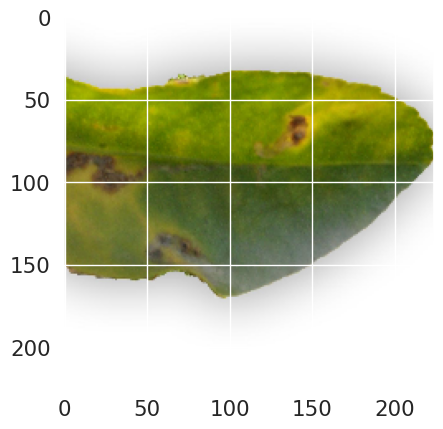

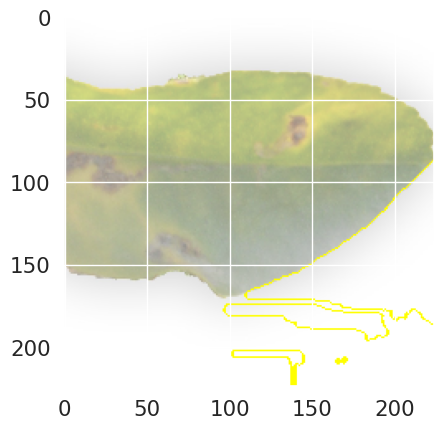

In [ ]:
import lime
from lime import lime_image
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np
from skimage.segmentation import mark_boundaries


# Load your CNN model
model = load_model(os.path.join(weights_path, 'New_Custom_cnn.h5'))  # Replace with the path to your model file

# img = image.load_img(os.path.join(temp_dir,os.listdir(temp_dir)[0]))

# Load an image for explanation
img_path = os.path.join(temp_dir,os.listdir(temp_dir)[0])  # Replace with the path to your image
img = image.load_img(img_path, target_size=(224, 224))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)

# Function to preprocess the input image for the model
def preprocess_input(img_array):
    img_array /= 255.
    # Add any additional preprocessing steps here
    return img_array

img_array = preprocess_input(img_array)

# Generate LIME explanation
explainer = lime_image.LimeImageExplainer()
explanation = explainer.explain_instance(img_array[0], model.predict, top_labels=5, hide_color=0, num_samples=1000)

# Display the original image and the LIME explanation
plt.imshow(img)
plt.show()

temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=True, num_features=5, hide_rest=False)
plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))
plt.show()


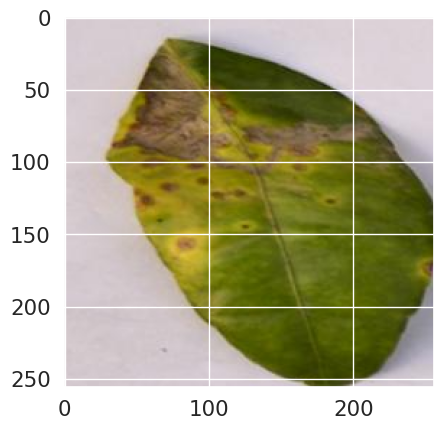

In [ ]:
temp_dir = os.path.join(root_path, 'split_aug', 'val', 'aug_canker')
img = image.load_img(os.path.join(temp_dir,os.listdir(temp_dir)[0]))
plt.imshow(img)

  0%|                                                                                                        | 0/1000 [00:00<?, ?it/s]

1/1 [==============================] - 0s 83ms/step


  1%|▉                                                                                              | 10/1000 [00:00<00:14, 69.28it/s]

1/1 [==============================] - 0s 27ms/step


  2%|█▉                                                                                             | 20/1000 [00:00<00:11, 83.96it/s]

1/1 [==============================] - 0s 31ms/step


  3%|██▊                                                                                            | 30/1000 [00:00<00:11, 87.90it/s]

1/1 [==============================] - 0s 26ms/step


  4%|████▏                                                                                         | 45/1000 [00:00<00:08, 110.30it/s]

1/1 [==============================] - 0s 25ms/step


  6%|█████▋                                                                                         | 60/1000 [00:00<00:09, 98.23it/s]

1/1 [==============================] - 0s 31ms/step


  7%|██████▋                                                                                        | 71/1000 [00:00<00:09, 98.74it/s]

1/1 [==============================] - 0s 27ms/step


  8%|███████▊                                                                                       | 82/1000 [00:00<00:09, 97.94it/s]

1/1 [==============================] - 0s 29ms/step


 10%|████████▉                                                                                     | 95/1000 [00:00<00:08, 106.60it/s]

1/1 [==============================] - 0s 26ms/step


 11%|██████████                                                                                   | 108/1000 [00:01<00:07, 112.36it/s]

1/1 [==============================] - 0s 24ms/step


 12%|███████████▎                                                                                  | 120/1000 [00:01<00:09, 97.12it/s]

1/1 [==============================] - 0s 25ms/step


 14%|████████████▋                                                                                | 137/1000 [00:01<00:07, 115.70it/s]

1/1 [==============================] - 0s 25ms/step


 15%|█████████████▉                                                                               | 150/1000 [00:01<00:08, 100.55it/s]

1/1 [==============================] - 0s 31ms/step


 16%|███████████████▏                                                                              | 161/1000 [00:01<00:11, 75.41it/s]

1/1 [==============================] - 0s 26ms/step


 18%|████████████████▍                                                                             | 175/1000 [00:01<00:09, 88.54it/s]

1/1 [==============================] - 0s 25ms/step


 19%|█████████████████▊                                                                            | 190/1000 [00:02<00:09, 89.78it/s]

1/1 [==============================] - 0s 22ms/step


 21%|███████████████████▌                                                                         | 210/1000 [00:02<00:07, 101.26it/s]

1/1 [==============================] - 0s 22ms/step


 23%|█████████████████████▍                                                                       | 230/1000 [00:02<00:06, 110.84it/s]

1/1 [==============================] - 0s 24ms/step


 25%|███████████████████████▎                                                                     | 250/1000 [00:02<00:06, 116.31it/s]

1/1 [==============================] - 0s 25ms/step


 27%|█████████████████████████                                                                    | 270/1000 [00:02<00:06, 120.50it/s]

1/1 [==============================] - 0s 23ms/step


 29%|██████████████████████████▌                                                                  | 286/1000 [00:02<00:05, 127.91it/s]

1/1 [==============================] - 0s 24ms/step


 30%|███████████████████████████▉                                                                 | 300/1000 [00:02<00:06, 107.03it/s]

1/1 [==============================] - 0s 27ms/step


 31%|█████████████████████████████▏                                                               | 314/1000 [00:03<00:06, 113.94it/s]

1/1 [==============================] - 0s 26ms/step


 33%|██████████████████████████████▋                                                              | 330/1000 [00:03<00:06, 109.76it/s]

1/1 [==============================] - 0s 22ms/step


 35%|████████████████████████████████▌                                                            | 350/1000 [00:03<00:05, 116.70it/s]

1/1 [==============================] - 0s 27ms/step


 37%|██████████████████████████████████▍                                                          | 370/1000 [00:03<00:05, 120.31it/s]

1/1 [==============================] - 0s 125ms/step


 38%|████████████████████████████████████                                                          | 383/1000 [00:03<00:06, 96.43it/s]

1/1 [==============================] - 0s 29ms/step


 39%|█████████████████████████████████████                                                         | 394/1000 [00:03<00:06, 96.43it/s]

1/1 [==============================] - 0s 24ms/step


 41%|██████████████████████████████████████▏                                                      | 410/1000 [00:03<00:05, 100.20it/s]

1/1 [==============================] - 0s 27ms/step


 42%|███████████████████████████████████████▏                                                     | 421/1000 [00:04<00:05, 102.12it/s]

1/1 [==============================] - 0s 25ms/step


 44%|████████████████████████████████████████▋                                                    | 438/1000 [00:04<00:04, 117.85it/s]

1/1 [==============================] - 0s 22ms/step


 45%|█████████████████████████████████████████▉                                                   | 451/1000 [00:04<00:04, 110.13it/s]

1/1 [==============================] - 0s 22ms/step


 47%|███████████████████████████████████████████▋                                                 | 470/1000 [00:04<00:04, 116.78it/s]

1/1 [==============================] - 0s 22ms/step


 49%|█████████████████████████████████████████████▌                                               | 490/1000 [00:04<00:04, 122.86it/s]

1/1 [==============================] - 0s 24ms/step


 51%|███████████████████████████████████████████████▍                                             | 510/1000 [00:04<00:03, 124.95it/s]

1/1 [==============================] - 0s 23ms/step


 53%|█████████████████████████████████████████████████▎                                           | 530/1000 [00:04<00:03, 126.73it/s]

1/1 [==============================] - 0s 22ms/step


 55%|███████████████████████████████████████████████████▏                                         | 550/1000 [00:05<00:03, 129.95it/s]

1/1 [==============================] - 0s 22ms/step


 57%|█████████████████████████████████████████████████████                                        | 570/1000 [00:05<00:03, 127.38it/s]

1/1 [==============================] - 0s 24ms/step


 58%|██████████████████████████████████████████████████████▏                                      | 583/1000 [00:05<00:03, 126.59it/s]

1/1 [==============================] - 0s 23ms/step


 60%|███████████████████████████████████████████████████████▋                                     | 599/1000 [00:05<00:02, 134.32it/s]

1/1 [==============================] - 0s 23ms/step


 61%|█████████████████████████████████████████████████████████                                    | 613/1000 [00:05<00:03, 116.07it/s]

1/1 [==============================] - 0s 23ms/step


 63%|██████████████████████████████████████████████████████████▌                                  | 630/1000 [00:05<00:03, 112.17it/s]

1/1 [==============================] - 0s 23ms/step


 65%|████████████████████████████████████████████████████████████▎                                | 649/1000 [00:05<00:02, 129.61it/s]

1/1 [==============================] - 0s 24ms/step


 66%|█████████████████████████████████████████████████████████████▋                               | 663/1000 [00:06<00:03, 105.33it/s]

1/1 [==============================] - 0s 25ms/step


 68%|██████████████████████████████████████████████████████████████▊                              | 675/1000 [00:06<00:03, 108.30it/s]

1/1 [==============================] - 0s 27ms/step


 69%|███████████████████████████████████████████████████████████████▉                             | 687/1000 [00:06<00:02, 107.20it/s]

1/1 [==============================] - 0s 25ms/step


 70%|█████████████████████████████████████████████████████████████████▊                            | 700/1000 [00:06<00:03, 93.38it/s]

1/1 [==============================] - 0s 26ms/step


 71%|██████████████████████████████████████████████████████████████████▍                          | 714/1000 [00:06<00:02, 103.87it/s]

1/1 [==============================] - 0s 25ms/step


 73%|███████████████████████████████████████████████████████████████████▊                         | 729/1000 [00:06<00:02, 114.72it/s]

1/1 [==============================] - 0s 24ms/step


 74%|█████████████████████████████████████████████████████████████████████▋                        | 742/1000 [00:06<00:02, 96.97it/s]

1/1 [==============================] - 0s 26ms/step


 75%|██████████████████████████████████████████████████████████████████████▊                       | 753/1000 [00:06<00:02, 99.32it/s]

1/1 [==============================] - 0s 25ms/step


 77%|███████████████████████████████████████████████████████████████████████▍                     | 768/1000 [00:07<00:02, 111.78it/s]

1/1 [==============================] - 0s 25ms/step


 78%|█████████████████████████████████████████████████████████████████████████▎                    | 780/1000 [00:07<00:02, 93.34it/s]

1/1 [==============================] - 0s 24ms/step


 80%|█████████████████████████████████████████████████████████████████████████▉                   | 795/1000 [00:07<00:01, 106.25it/s]

1/1 [==============================] - 0s 25ms/step


 81%|███████████████████████████████████████████████████████████████████████████▊                  | 807/1000 [00:07<00:02, 81.36it/s]

1/1 [==============================] - 0s 22ms/step


 82%|█████████████████████████████████████████████████████████████████████████████                 | 820/1000 [00:07<00:02, 85.00it/s]

1/1 [==============================] - 0s 24ms/step


 84%|██████████████████████████████████████████████████████████████████████████████               | 839/1000 [00:07<00:01, 107.55it/s]

1/1 [==============================] - 0s 24ms/step


 85%|███████████████████████████████████████████████████████████████████████████████▏             | 852/1000 [00:07<00:01, 103.35it/s]

1/1 [==============================] - 0s 24ms/step


 87%|████████████████████████████████████████████████████████████████████████████████▉            | 870/1000 [00:08<00:01, 107.30it/s]

1/1 [==============================] - 0s 24ms/step


 89%|██████████████████████████████████████████████████████████████████████████████████▊          | 890/1000 [00:08<00:00, 114.99it/s]

1/1 [==============================] - 0s 23ms/step


 91%|████████████████████████████████████████████████████████████████████████████████████▋        | 910/1000 [00:08<00:00, 121.11it/s]

1/1 [==============================] - 0s 23ms/step


 93%|██████████████████████████████████████████████████████████████████████████████████████▍      | 930/1000 [00:08<00:00, 125.12it/s]

1/1 [==============================] - 0s 24ms/step


 95%|████████████████████████████████████████████████████████████████████████████████████████▎    | 950/1000 [00:08<00:00, 124.99it/s]

1/1 [==============================] - 0s 23ms/step


 97%|██████████████████████████████████████████████████████████████████████████████████████████▏  | 970/1000 [00:08<00:00, 127.63it/s]

1/1 [==============================] - 0s 23ms/step


 99%|████████████████████████████████████████████████████████████████████████████████████████████ | 990/1000 [00:09<00:00, 129.32it/s]

1/1 [==============================] - 0s 24ms/step


100%|████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:09<00:00, 109.98it/s]


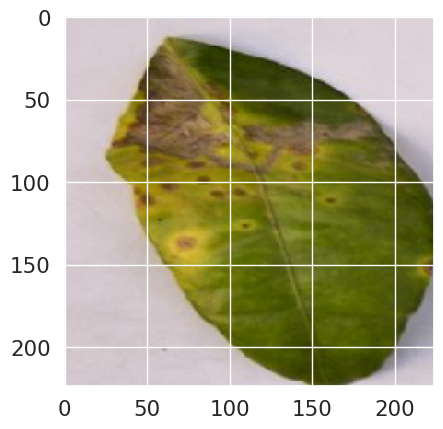

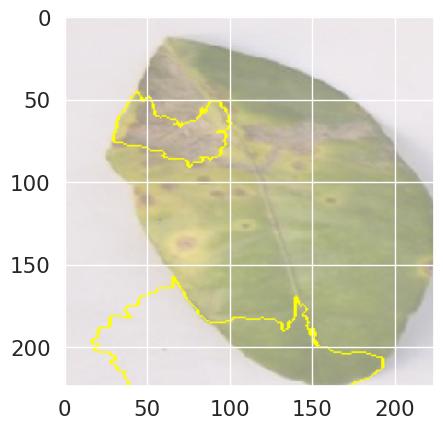

In [ ]:
import lime
from lime import lime_image
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np
from skimage.segmentation import mark_boundaries


# Load your CNN model
model = load_model(os.path.join(weights_path, 'New_Custom_cnn.h5'))  # Replace with the path to your model file

# img = image.load_img(os.path.join(temp_dir,os.listdir(temp_dir)[0]))

# Load an image for explanation
img_path = os.path.join(temp_dir,os.listdir(temp_dir)[0])  # Replace with the path to your image
img = image.load_img(img_path, target_size=(224, 224))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)

# Function to preprocess the input image for the model
def preprocess_input(img_array):
    img_array /= 255.
    # Add any additional preprocessing steps here
    return img_array

img_array = preprocess_input(img_array)

# Generate LIME explanation
explainer = lime_image.LimeImageExplainer()
explanation = explainer.explain_instance(img_array[0], model.predict, top_labels=5, hide_color=0, num_samples=1000)

# Display the original image and the LIME explanation
plt.imshow(img)
plt.show()

temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=True, num_features=5, hide_rest=False)
plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))
plt.show()


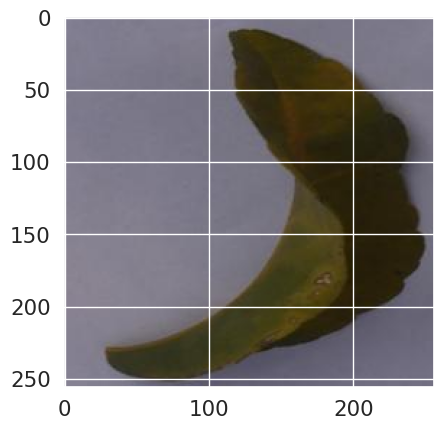

In [ ]:
temp_dir = os.path.join(root_path, 'split_aug', 'val', 'aug_greening')
img = image.load_img(os.path.join(temp_dir,os.listdir(temp_dir)[7]))
plt.imshow(img)

  0%|                                                                                                        | 0/1000 [00:00<?, ?it/s]

1/1 [==============================] - 0s 82ms/step


  1%|▉                                                                                              | 10/1000 [00:00<00:13, 72.63it/s]

1/1 [==============================] - 0s 25ms/step


  3%|██▊                                                                                           | 30/1000 [00:00<00:09, 104.55it/s]

1/1 [==============================] - 0s 27ms/step


  5%|████▋                                                                                         | 50/1000 [00:00<00:08, 108.83it/s]

1/1 [==============================] - 0s 24ms/step


  7%|██████▌                                                                                       | 70/1000 [00:00<00:08, 115.74it/s]

1/1 [==============================] - 0s 24ms/step


  9%|████████▍                                                                                     | 90/1000 [00:00<00:07, 119.29it/s]

1/1 [==============================] - 0s 24ms/step


 11%|█████████▊                                                                                   | 106/1000 [00:00<00:06, 129.08it/s]

1/1 [==============================] - 0s 24ms/step


 12%|███████████▏                                                                                 | 120/1000 [00:01<00:07, 116.91it/s]

1/1 [==============================] - 0s 25ms/step


 14%|█████████████                                                                                | 140/1000 [00:01<00:07, 119.42it/s]

1/1 [==============================] - 0s 24ms/step


 16%|██████████████▉                                                                              | 160/1000 [00:01<00:06, 122.66it/s]

1/1 [==============================] - 0s 25ms/step


 18%|████████████████▋                                                                            | 180/1000 [00:01<00:06, 125.61it/s]

1/1 [==============================] - 0s 23ms/step


 20%|██████████████████▌                                                                          | 200/1000 [00:01<00:06, 128.65it/s]

1/1 [==============================] - 0s 26ms/step


 22%|████████████████████▍                                                                        | 220/1000 [00:01<00:06, 127.54it/s]

1/1 [==============================] - 0s 26ms/step


 24%|██████████████████████▎                                                                      | 240/1000 [00:01<00:05, 127.18it/s]

1/1 [==============================] - 0s 30ms/step


 26%|████████████████████████▏                                                                    | 260/1000 [00:02<00:06, 120.35it/s]

1/1 [==============================] - 0s 26ms/step


 27%|█████████████████████████▋                                                                    | 273/1000 [00:02<00:07, 94.59it/s]

1/1 [==============================] - 0s 25ms/step


 29%|███████████████████████████▎                                                                  | 290/1000 [00:02<00:07, 95.17it/s]

1/1 [==============================] - 0s 25ms/step


 30%|████████████████████████████▏                                                                 | 300/1000 [00:02<00:07, 92.67it/s]

1/1 [==============================] - 0s 27ms/step


 31%|█████████████████████████████▏                                                                | 310/1000 [00:02<00:09, 73.86it/s]

1/1 [==============================] - 0s 26ms/step


 33%|██████████████████████████████▋                                                               | 326/1000 [00:03<00:07, 90.04it/s]

1/1 [==============================] - 0s 24ms/step


 34%|███████████████████████████████▉                                                              | 340/1000 [00:03<00:07, 90.80it/s]

1/1 [==============================] - 0s 23ms/step


 36%|█████████████████████████████████▍                                                           | 360/1000 [00:03<00:06, 103.27it/s]

1/1 [==============================] - 0s 24ms/step


 38%|███████████████████████████████████▎                                                         | 380/1000 [00:03<00:05, 111.06it/s]

1/1 [==============================] - 0s 26ms/step


 40%|█████████████████████████████████████▏                                                       | 400/1000 [00:03<00:05, 115.57it/s]

1/1 [==============================] - 0s 43ms/step


 41%|██████████████████████████████████████▎                                                      | 412/1000 [00:03<00:05, 110.58it/s]

1/1 [==============================] - 0s 24ms/step


 43%|███████████████████████████████████████▉                                                     | 430/1000 [00:03<00:05, 111.83it/s]

1/1 [==============================] - 0s 23ms/step


 45%|█████████████████████████████████████████▊                                                   | 450/1000 [00:04<00:04, 117.06it/s]

1/1 [==============================] - 0s 25ms/step


 47%|███████████████████████████████████████████▌                                                 | 468/1000 [00:04<00:04, 130.42it/s]

1/1 [==============================] - 0s 23ms/step


 48%|████████████████████████████████████████████▊                                                | 482/1000 [00:04<00:04, 120.89it/s]

1/1 [==============================] - 0s 26ms/step


 50%|██████████████████████████████████████████████▍                                              | 499/1000 [00:04<00:03, 132.49it/s]

1/1 [==============================] - 0s 25ms/step


 51%|███████████████████████████████████████████████▋                                             | 513/1000 [00:04<00:04, 120.62it/s]

1/1 [==============================] - 0s 23ms/step


 53%|█████████████████████████████████████████████████▎                                           | 530/1000 [00:04<00:03, 118.07it/s]

1/1 [==============================] - 0s 23ms/step


 55%|██████████████████████████████████████████████████▋                                          | 545/1000 [00:04<00:03, 125.35it/s]

1/1 [==============================] - 0s 24ms/step


 56%|███████████████████████████████████████████████████▉                                         | 558/1000 [00:04<00:03, 115.51it/s]

1/1 [==============================] - 0s 24ms/step


 57%|█████████████████████████████████████████████████████▌                                        | 570/1000 [00:05<00:05, 83.33it/s]

1/1 [==============================] - 0s 26ms/step


 58%|██████████████████████████████████████████████████████▌                                       | 580/1000 [00:05<00:05, 79.30it/s]

1/1 [==============================] - 0s 24ms/step


 60%|████████████████████████████████████████████████████████▍                                     | 600/1000 [00:05<00:04, 93.66it/s]

1/1 [==============================] - 0s 23ms/step


 62%|█████████████████████████████████████████████████████████▋                                   | 620/1000 [00:05<00:03, 105.08it/s]

1/1 [==============================] - 0s 24ms/step


 64%|███████████████████████████████████████████████████████████▌                                 | 640/1000 [00:05<00:03, 113.98it/s]

1/1 [==============================] - 0s 23ms/step


 66%|█████████████████████████████████████████████████████████████▍                               | 660/1000 [00:05<00:02, 120.64it/s]

1/1 [==============================] - 0s 25ms/step


 68%|███████████████████████████████████████████████████████████████▏                             | 680/1000 [00:06<00:02, 121.15it/s]

1/1 [==============================] - 0s 24ms/step


 70%|█████████████████████████████████████████████████████████████████                            | 700/1000 [00:06<00:02, 122.83it/s]

1/1 [==============================] - 0s 23ms/step


 72%|██████████████████████████████████████████████████████████████████▉                          | 720/1000 [00:06<00:02, 125.84it/s]

1/1 [==============================] - 0s 23ms/step


 74%|████████████████████████████████████████████████████████████████████▊                        | 740/1000 [00:06<00:02, 127.29it/s]

1/1 [==============================] - 0s 25ms/step


 76%|██████████████████████████████████████████████████████████████████████▋                      | 760/1000 [00:06<00:01, 126.54it/s]

1/1 [==============================] - 0s 23ms/step


 78%|████████████████████████████████████████████████████████████████████████▌                    | 780/1000 [00:06<00:01, 127.44it/s]

1/1 [==============================] - 0s 24ms/step


 80%|██████████████████████████████████████████████████████████████████████████▍                  | 800/1000 [00:07<00:01, 128.61it/s]

1/1 [==============================] - 0s 25ms/step


 82%|████████████████████████████████████████████████████████████████████████████▎                | 820/1000 [00:07<00:01, 123.32it/s]

1/1 [==============================] - 0s 23ms/step


 83%|█████████████████████████████████████████████████████████████████████████████▍               | 833/1000 [00:07<00:01, 123.83it/s]

1/1 [==============================] - 0s 24ms/step


 85%|██████████████████████████████████████████████████████████████████████████████▋              | 846/1000 [00:07<00:01, 121.52it/s]

1/1 [==============================] - 0s 26ms/step


 86%|███████████████████████████████████████████████████████████████████████████████▉             | 859/1000 [00:07<00:01, 117.90it/s]

1/1 [==============================] - 0s 25ms/step


 87%|█████████████████████████████████████████████████████████████████████████████████▊            | 871/1000 [00:07<00:01, 92.40it/s]

1/1 [==============================] - 0s 24ms/step


 88%|██████████████████████████████████████████████████████████████████████████████████▊           | 881/1000 [00:07<00:01, 83.44it/s]

1/1 [==============================] - 0s 24ms/step


 89%|███████████████████████████████████████████████████████████████████████████████████▋          | 890/1000 [00:08<00:01, 64.37it/s]

1/1 [==============================] - 0s 25ms/step


 91%|█████████████████████████████████████████████████████████████████████████████████████▌        | 910/1000 [00:08<00:01, 82.44it/s]

1/1 [==============================] - 0s 25ms/step


 93%|███████████████████████████████████████████████████████████████████████████████████████▍      | 930/1000 [00:08<00:00, 94.42it/s]

1/1 [==============================] - 0s 24ms/step


 95%|████████████████████████████████████████████████████████████████████████████████████████▎    | 950/1000 [00:08<00:00, 104.10it/s]

1/1 [==============================] - 0s 33ms/step


 97%|██████████████████████████████████████████████████████████████████████████████████████████▏  | 970/1000 [00:08<00:00, 110.27it/s]

1/1 [==============================] - 0s 23ms/step


 99%|████████████████████████████████████████████████████████████████████████████████████████████ | 990/1000 [00:08<00:00, 115.65it/s]

1/1 [==============================] - 0s 24ms/step


100%|████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:09<00:00, 110.52it/s]


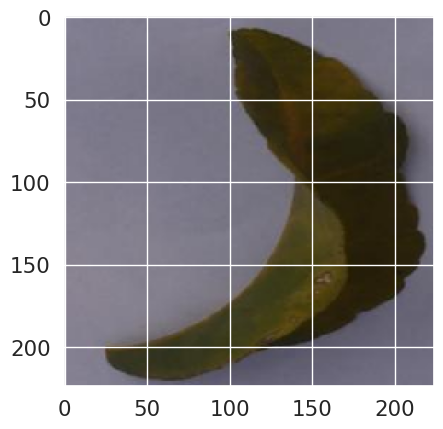

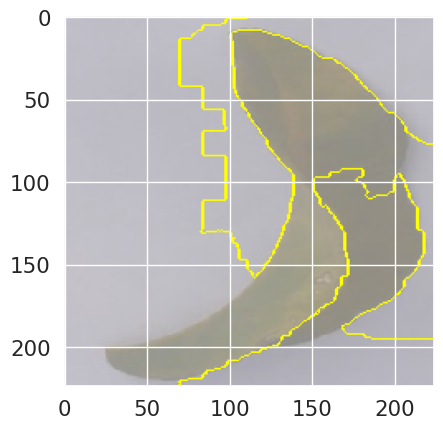

In [ ]:
import lime
from lime import lime_image
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np
from skimage.segmentation import mark_boundaries


# Load your CNN model
model = load_model(os.path.join(weights_path, 'New_Custom_cnn.h5'))

# img = image.load_img(os.path.join(temp_dir,os.listdir(temp_dir)[0]))

# Load an image for explanation
img_path = os.path.join(temp_dir,os.listdir(temp_dir)[7])  # Replace with the path to your image
img = image.load_img(img_path, target_size=(224, 224))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)

# Function to preprocess the input image for the model
def preprocess_input(img_array):
    img_array /= 255.
    # Add any additional preprocessing steps here
    return img_array

img_array = preprocess_input(img_array)

# Generate LIME explanation
explainer = lime_image.LimeImageExplainer()
explanation = explainer.explain_instance(img_array[0], model.predict, top_labels=5, hide_color=0, num_samples=1000)

# Display the original image and the LIME explanation
plt.imshow(img)
plt.show()

temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=True, num_features=5, hide_rest=False)
plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))
plt.show()


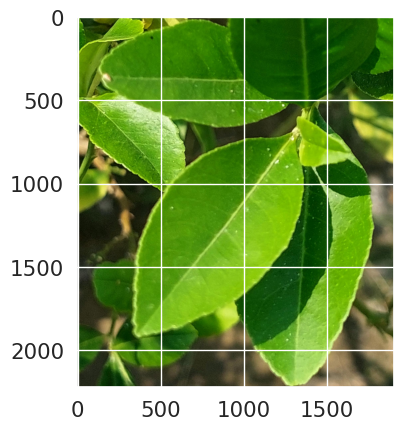

In [ ]:
temp_dir = os.path.join(root_path, 'split_aug', 'val', 'aug_new_healthy_citrus')
img = image.load_img(os.path.join(temp_dir,os.listdir(temp_dir)[12]))
plt.imshow(img)

  0%|                                                                                                        | 0/1000 [00:00<?, ?it/s]

1/1 [==============================] - 0s 71ms/step


  1%|▉                                                                                              | 10/1000 [00:00<00:12, 79.91it/s]

1/1 [==============================] - 0s 25ms/step


  3%|██▊                                                                                           | 30/1000 [00:00<00:08, 110.19it/s]

1/1 [==============================] - 0s 23ms/step


  5%|████▋                                                                                         | 50/1000 [00:00<00:07, 120.11it/s]

1/1 [==============================] - 0s 23ms/step


  7%|██████▌                                                                                       | 70/1000 [00:00<00:07, 125.48it/s]

1/1 [==============================] - 0s 23ms/step


  9%|████████▍                                                                                     | 90/1000 [00:00<00:07, 128.80it/s]

1/1 [==============================] - 0s 24ms/step


 11%|██████████▏                                                                                  | 109/1000 [00:00<00:06, 144.55it/s]

1/1 [==============================] - 0s 25ms/step


 12%|███████████▌                                                                                 | 124/1000 [00:01<00:07, 112.97it/s]

1/1 [==============================] - 0s 24ms/step


 14%|████████████▊                                                                                | 138/1000 [00:01<00:07, 118.84it/s]

1/1 [==============================] - 0s 24ms/step


 15%|██████████████▏                                                                               | 151/1000 [00:02<00:35, 24.13it/s]

1/1 [==============================] - 0s 23ms/step


 17%|███████████████▉                                                                              | 170/1000 [00:03<00:24, 33.66it/s]

1/1 [==============================] - 0s 24ms/step


 19%|█████████████████▊                                                                            | 190/1000 [00:03<00:17, 45.44it/s]

1/1 [==============================] - 0s 25ms/step


 21%|███████████████████▋                                                                          | 210/1000 [00:03<00:13, 57.36it/s]

1/1 [==============================] - 0s 24ms/step


 23%|█████████████████████▌                                                                        | 230/1000 [00:03<00:11, 69.99it/s]

1/1 [==============================] - 0s 23ms/step


 25%|███████████████████████▌                                                                      | 250/1000 [00:03<00:09, 82.23it/s]

1/1 [==============================] - 0s 24ms/step


 27%|█████████████████████████▍                                                                    | 270/1000 [00:03<00:07, 93.16it/s]

1/1 [==============================] - 0s 24ms/step


 29%|██████████████████████████▉                                                                  | 290/1000 [00:03<00:06, 101.47it/s]

1/1 [==============================] - 0s 24ms/step


 31%|████████████████████████████▊                                                                | 310/1000 [00:04<00:06, 107.60it/s]

1/1 [==============================] - 0s 24ms/step


 33%|██████████████████████████████▋                                                              | 330/1000 [00:04<00:05, 113.09it/s]

1/1 [==============================] - 0s 24ms/step


 35%|████████████████████████████████▌                                                            | 350/1000 [00:04<00:05, 118.30it/s]

1/1 [==============================] - 0s 24ms/step


 37%|██████████████████████████████████▍                                                          | 370/1000 [00:04<00:05, 121.29it/s]

1/1 [==============================] - 0s 27ms/step


 39%|████████████████████████████████████▎                                                        | 390/1000 [00:04<00:05, 111.24it/s]

1/1 [==============================] - 0s 26ms/step


 40%|█████████████████████████████████████▊                                                        | 402/1000 [00:05<00:06, 91.85it/s]

1/1 [==============================] - 0s 24ms/step


 42%|███████████████████████████████████████▍                                                      | 420/1000 [00:05<00:05, 96.90it/s]

1/1 [==============================] - 0s 23ms/step


 44%|████████████████████████████████████████▉                                                    | 440/1000 [00:05<00:05, 104.95it/s]

1/1 [==============================] - 0s 23ms/step


 46%|██████████████████████████████████████████▊                                                  | 460/1000 [00:05<00:04, 111.06it/s]

1/1 [==============================] - 0s 25ms/step


 48%|████████████████████████████████████████████▋                                                | 480/1000 [00:05<00:04, 115.31it/s]

1/1 [==============================] - 0s 24ms/step


 50%|██████████████████████████████████████████████▌                                              | 500/1000 [00:05<00:04, 118.62it/s]

1/1 [==============================] - 0s 23ms/step


 52%|████████████████████████████████████████████████▎                                            | 520/1000 [00:05<00:03, 122.53it/s]

1/1 [==============================] - 0s 24ms/step


 54%|██████████████████████████████████████████████████▏                                          | 540/1000 [00:06<00:03, 123.64it/s]

1/1 [==============================] - 0s 26ms/step


 56%|███████████████████████████████████████████████████▉                                         | 558/1000 [00:06<00:03, 135.27it/s]

1/1 [==============================] - 0s 27ms/step


 57%|█████████████████████████████████████████████████████▎                                       | 573/1000 [00:06<00:03, 121.23it/s]

1/1 [==============================] - 0s 26ms/step


 59%|██████████████████████████████████████████████████████▍                                      | 586/1000 [00:06<00:03, 110.18it/s]

1/1 [==============================] - 0s 23ms/step


 60%|███████████████████████████████████████████████████████▊                                     | 600/1000 [00:06<00:03, 106.22it/s]

1/1 [==============================] - 0s 25ms/step


 62%|█████████████████████████████████████████████████████████▋                                   | 620/1000 [00:06<00:03, 113.22it/s]

1/1 [==============================] - 0s 24ms/step


 64%|███████████████████████████████████████████████████████████▎                                 | 638/1000 [00:06<00:02, 127.78it/s]

1/1 [==============================] - 0s 26ms/step


 65%|████████████████████████████████████████████████████████████▋                                | 652/1000 [00:07<00:03, 115.21it/s]

1/1 [==============================] - 0s 24ms/step


 67%|██████████████████████████████████████████████████████████████▎                              | 670/1000 [00:07<00:02, 116.50it/s]

1/1 [==============================] - 0s 23ms/step


 69%|████████████████████████████████████████████████████████████████▏                            | 690/1000 [00:07<00:02, 119.26it/s]

1/1 [==============================] - 0s 23ms/step


 71%|██████████████████████████████████████████████████████████████████                           | 710/1000 [00:07<00:02, 121.91it/s]

1/1 [==============================] - 0s 23ms/step


 73%|███████████████████████████████████████████████████████████████████▉                         | 730/1000 [00:07<00:02, 124.65it/s]

1/1 [==============================] - 0s 25ms/step


 75%|█████████████████████████████████████████████████████████████████████▊                       | 750/1000 [00:07<00:02, 124.21it/s]

1/1 [==============================] - 0s 24ms/step


 77%|███████████████████████████████████████████████████████████████████████▌                     | 770/1000 [00:08<00:01, 122.92it/s]

1/1 [==============================] - 0s 23ms/step


 79%|█████████████████████████████████████████████████████████████████████████▍                   | 790/1000 [00:08<00:01, 125.73it/s]

1/1 [==============================] - 0s 23ms/step


 81%|███████████████████████████████████████████████████████████████████████████▎                 | 810/1000 [00:08<00:01, 125.60it/s]

1/1 [==============================] - 0s 24ms/step


 83%|█████████████████████████████████████████████████████████████████████████████▏               | 830/1000 [00:08<00:01, 124.89it/s]

1/1 [==============================] - 0s 26ms/step


 85%|███████████████████████████████████████████████████████████████████████████████              | 850/1000 [00:08<00:01, 125.27it/s]

1/1 [==============================] - 0s 23ms/step


 87%|████████████████████████████████████████████████████████████████████████████████▉            | 870/1000 [00:08<00:01, 119.13it/s]

1/1 [==============================] - 0s 24ms/step


 89%|██████████████████████████████████████████████████████████████████████████████████▌          | 888/1000 [00:08<00:00, 131.25it/s]

1/1 [==============================] - 0s 25ms/step


 90%|███████████████████████████████████████████████████████████████████████████████████▉         | 902/1000 [00:09<00:00, 114.31it/s]

1/1 [==============================] - 0s 27ms/step


 92%|██████████████████████████████████████████████████████████████████████████████████████        | 915/1000 [00:10<00:02, 42.48it/s]

1/1 [==============================] - 0s 24ms/step


 93%|███████████████████████████████████████████████████████████████████████████████████████▍      | 930/1000 [00:10<00:01, 50.59it/s]

1/1 [==============================] - 0s 27ms/step


 94%|████████████████████████████████████████████████████████████████████████████████████████▊     | 945/1000 [00:10<00:00, 62.42it/s]

1/1 [==============================] - 0s 37ms/step


 96%|█████████████████████████████████████████████████████████████████████████████████████████▊    | 956/1000 [00:10<00:00, 68.84it/s]

1/1 [==============================] - 0s 24ms/step


 97%|███████████████████████████████████████████████████████████████████████████████████████████▏  | 970/1000 [00:10<00:00, 74.66it/s]

1/1 [==============================] - 0s 23ms/step


 99%|█████████████████████████████████████████████████████████████████████████████████████████████ | 990/1000 [00:10<00:00, 89.36it/s]

1/1 [==============================] - 0s 24ms/step


100%|█████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:10<00:00, 92.57it/s]


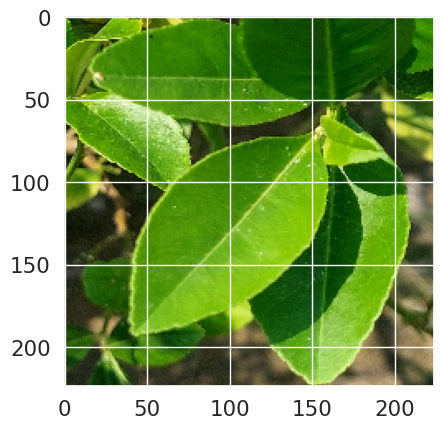

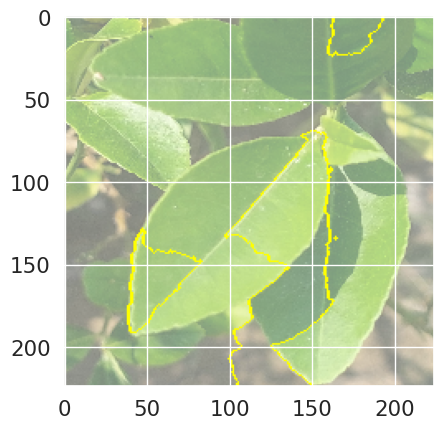

In [ ]:
import lime
from lime import lime_image
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np
from skimage.segmentation import mark_boundaries


# Load your CNN model
model = load_model(os.path.join(weights_path, 'New_Custom_cnn.h5'))  # Replace with the path to your model file

# img = image.load_img(os.path.join(temp_dir,os.listdir(temp_dir)[0]))

# Load an image for explanation
img_path = os.path.join(temp_dir,os.listdir(temp_dir)[12])  # Replace with the path to your image
img = image.load_img(img_path, target_size=(224, 224))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)

# Function to preprocess the input image for the model
def preprocess_input(img_array):
    img_array /= 255.
    # Add any additional preprocessing steps here
    return img_array

img_array = preprocess_input(img_array)

# Generate LIME explanation
explainer = lime_image.LimeImageExplainer()
explanation = explainer.explain_instance(img_array[0], model.predict, top_labels=5, hide_color=0, num_samples=1000)

# Display the original image and the LIME explanation
plt.imshow(img)
plt.show()

temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=True, num_features=5, hide_rest=False)
plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))
plt.show()


Lime_Canker

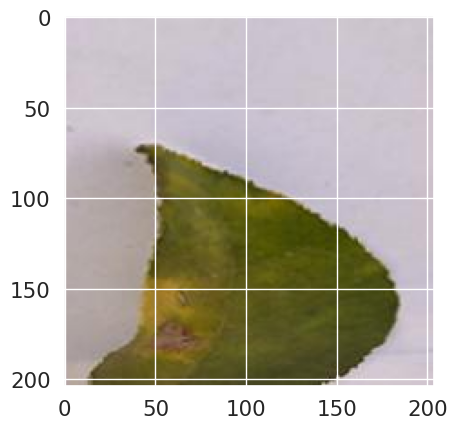

In [ ]:
temp_dir = os.path.join(root_path, 'split_aug', 'train', 'aug_canker')
img = image.load_img(os.path.join(temp_dir,os.listdir(temp_dir)[12]))
plt.imshow(img)

  0%|                                                                                                        | 0/1000 [00:00<?, ?it/s]

1/1 [==============================] - 0s 73ms/step


  1%|▉                                                                                              | 10/1000 [00:00<00:16, 59.28it/s]

1/1 [==============================] - 0s 23ms/step


  2%|█▉                                                                                             | 20/1000 [00:00<00:12, 76.95it/s]

1/1 [==============================] - 0s 24ms/step


  3%|██▊                                                                                            | 30/1000 [00:00<00:17, 56.76it/s]

1/1 [==============================] - 0s 24ms/step


  4%|███▊                                                                                           | 40/1000 [00:00<00:14, 67.04it/s]

1/1 [==============================] - 0s 24ms/step


  5%|████▊                                                                                          | 50/1000 [00:00<00:12, 74.05it/s]

1/1 [==============================] - 0s 25ms/step


  6%|█████▋                                                                                         | 60/1000 [00:00<00:11, 79.55it/s]

1/1 [==============================] - 0s 25ms/step


  7%|██████▋                                                                                        | 70/1000 [00:01<00:16, 55.37it/s]

1/1 [==============================] - 0s 25ms/step


  8%|███████▊                                                                                       | 82/1000 [00:01<00:13, 68.60it/s]

1/1 [==============================] - 0s 26ms/step


  9%|████████▋                                                                                      | 91/1000 [00:01<00:12, 70.19it/s]

1/1 [==============================] - 0s 33ms/step


 10%|█████████▍                                                                                    | 100/1000 [00:01<00:13, 64.37it/s]

1/1 [==============================] - 0s 27ms/step


 11%|██████████▎                                                                                   | 110/1000 [00:01<00:12, 70.87it/s]

1/1 [==============================] - 0s 24ms/step


 12%|███████████▎                                                                                  | 120/1000 [00:01<00:11, 77.80it/s]

1/1 [==============================] - 0s 23ms/step


 13%|████████████▏                                                                                 | 130/1000 [00:01<00:10, 82.37it/s]

1/1 [==============================] - 0s 23ms/step


 14%|█████████████▏                                                                                | 140/1000 [00:01<00:10, 84.97it/s]

1/1 [==============================] - 0s 24ms/step


 15%|██████████████                                                                                | 150/1000 [00:02<00:09, 85.14it/s]

1/1 [==============================] - 0s 23ms/step


 16%|███████████████                                                                               | 160/1000 [00:02<00:09, 88.83it/s]

1/1 [==============================] - 0s 26ms/step


 17%|███████████████▉                                                                              | 170/1000 [00:02<00:09, 87.70it/s]

1/1 [==============================] - 0s 26ms/step


 18%|████████████████▉                                                                             | 180/1000 [00:02<00:09, 89.76it/s]

1/1 [==============================] - 0s 24ms/step


 19%|█████████████████▊                                                                            | 190/1000 [00:02<00:08, 90.75it/s]

1/1 [==============================] - 0s 25ms/step


 20%|██████████████████▊                                                                           | 200/1000 [00:02<00:09, 81.54it/s]

1/1 [==============================] - 0s 24ms/step


 21%|███████████████████▋                                                                          | 210/1000 [00:02<00:09, 85.54it/s]

1/1 [==============================] - 0s 24ms/step


 22%|████████████████████▋                                                                         | 220/1000 [00:02<00:09, 86.03it/s]

1/1 [==============================] - 0s 26ms/step


 23%|█████████████████████▌                                                                        | 230/1000 [00:02<00:09, 79.95it/s]

1/1 [==============================] - 0s 25ms/step


 24%|██████████████████████▌                                                                       | 240/1000 [00:03<00:08, 84.45it/s]

1/1 [==============================] - 0s 26ms/step


 26%|███████████████████████▉                                                                     | 257/1000 [00:03<00:06, 106.81it/s]

1/1 [==============================] - 0s 25ms/step


 27%|█████████████████████████▎                                                                    | 269/1000 [00:03<00:08, 87.02it/s]

1/1 [==============================] - 0s 24ms/step


 28%|██████████████████████████▏                                                                   | 279/1000 [00:03<00:08, 89.50it/s]

1/1 [==============================] - 0s 24ms/step


 29%|███████████████████████████▏                                                                  | 289/1000 [00:03<00:07, 91.75it/s]

1/1 [==============================] - 0s 24ms/step


 30%|████████████████████████████▏                                                                 | 300/1000 [00:03<00:08, 79.23it/s]

1/1 [==============================] - 0s 24ms/step


 31%|█████████████████████████████▏                                                                | 311/1000 [00:03<00:07, 86.14it/s]

1/1 [==============================] - 0s 24ms/step


 32%|██████████████████████████████▏                                                               | 321/1000 [00:03<00:07, 88.39it/s]

1/1 [==============================] - 0s 25ms/step


 33%|███████████████████████████████                                                               | 331/1000 [00:04<00:07, 88.67it/s]

1/1 [==============================] - 0s 24ms/step


 35%|████████████████████████████████▏                                                            | 346/1000 [00:04<00:06, 104.79it/s]

1/1 [==============================] - 0s 27ms/step


 36%|█████████████████████████████████▌                                                            | 357/1000 [00:04<00:06, 99.29it/s]

1/1 [==============================] - 0s 26ms/step


 37%|██████████████████████████████████▏                                                          | 368/1000 [00:04<00:06, 100.72it/s]

1/1 [==============================] - 0s 24ms/step


 38%|███████████████████████████████████▏                                                         | 379/1000 [00:04<00:06, 102.02it/s]

1/1 [==============================] - 0s 23ms/step


 39%|████████████████████████████████████▋                                                         | 390/1000 [00:04<00:07, 84.22it/s]

1/1 [==============================] - 0s 24ms/step


 40%|█████████████████████████████████████▌                                                        | 400/1000 [00:04<00:06, 86.38it/s]

1/1 [==============================] - 0s 24ms/step


 41%|██████████████████████████████████████▌                                                       | 410/1000 [00:04<00:07, 80.80it/s]

1/1 [==============================] - 0s 25ms/step


 42%|███████████████████████████████████████▍                                                      | 420/1000 [00:05<00:06, 83.52it/s]

1/1 [==============================] - 0s 24ms/step


 43%|████████████████████████████████████████▌                                                     | 432/1000 [00:05<00:06, 92.78it/s]

1/1 [==============================] - 0s 27ms/step


 44%|█████████████████████████████████████████▌                                                    | 442/1000 [00:05<00:06, 90.40it/s]

1/1 [==============================] - 0s 24ms/step


 45%|██████████████████████████████████████████▍                                                   | 452/1000 [00:05<00:05, 91.70it/s]

1/1 [==============================] - 0s 24ms/step


 46%|███████████████████████████████████████████▌                                                  | 463/1000 [00:05<00:05, 96.61it/s]

1/1 [==============================] - 0s 24ms/step


 47%|████████████████████████████████████████████                                                 | 474/1000 [00:05<00:05, 100.07it/s]

1/1 [==============================] - 0s 25ms/step


 48%|█████████████████████████████████████████████                                                | 485/1000 [00:05<00:05, 101.92it/s]

1/1 [==============================] - 0s 24ms/step


 50%|██████████████████████████████████████████████▏                                              | 496/1000 [00:05<00:04, 103.30it/s]

1/1 [==============================] - 0s 24ms/step


 51%|███████████████████████████████████████████████▏                                             | 507/1000 [00:05<00:04, 103.91it/s]

1/1 [==============================] - 0s 24ms/step


 52%|████████████████████████████████████████████████▏                                            | 518/1000 [00:06<00:04, 103.46it/s]

1/1 [==============================] - 0s 24ms/step


 53%|█████████████████████████████████████████████████▏                                           | 529/1000 [00:06<00:04, 103.37it/s]

1/1 [==============================] - 0s 26ms/step


 54%|██████████████████████████████████████████████████▊                                           | 540/1000 [00:06<00:05, 78.22it/s]

1/1 [==============================] - 0s 24ms/step


 55%|███████████████████████████████████████████████████▋                                          | 550/1000 [00:06<00:05, 82.98it/s]

1/1 [==============================] - 0s 25ms/step


 56%|████████████████████████████████████████████████████▋                                         | 560/1000 [00:06<00:05, 85.09it/s]

1/1 [==============================] - 0s 24ms/step


 57%|█████████████████████████████████████████████████████▌                                        | 570/1000 [00:06<00:04, 86.42it/s]

1/1 [==============================] - 0s 23ms/step


 58%|██████████████████████████████████████████████████████▌                                       | 580/1000 [00:06<00:04, 88.83it/s]

1/1 [==============================] - 0s 23ms/step


 59%|███████████████████████████████████████████████████████▍                                      | 590/1000 [00:06<00:04, 88.87it/s]

1/1 [==============================] - 0s 24ms/step


 60%|████████████████████████████████████████████████████████▍                                     | 600/1000 [00:07<00:04, 82.73it/s]

1/1 [==============================] - 0s 24ms/step


 62%|█████████████████████████████████████████████████████████▍                                   | 617/1000 [00:07<00:03, 105.04it/s]

1/1 [==============================] - 0s 26ms/step


 63%|███████████████████████████████████████████████████████████                                   | 628/1000 [00:07<00:03, 96.87it/s]

1/1 [==============================] - 0s 24ms/step


 64%|████████████████████████████████████████████████████████████                                  | 639/1000 [00:07<00:04, 78.64it/s]

1/1 [==============================] - 0s 23ms/step


 65%|████████████████████████████████████████████████████████████▉                                 | 648/1000 [00:07<00:05, 66.94it/s]

1/1 [==============================] - 0s 23ms/step


 66%|█████████████████████████████████████████████████████████████▊                                | 658/1000 [00:07<00:04, 73.71it/s]

1/1 [==============================] - 0s 23ms/step


 67%|██████████████████████████████████████████████████████████████▋                               | 667/1000 [00:07<00:04, 74.36it/s]

1/1 [==============================] - 0s 25ms/step


 68%|███████████████████████████████████████████████████████████████▌                              | 676/1000 [00:08<00:04, 76.72it/s]

1/1 [==============================] - 0s 24ms/step


 68%|████████████████████████████████████████████████████████████████▍                             | 685/1000 [00:08<00:04, 78.48it/s]

1/1 [==============================] - 0s 24ms/step


 69%|█████████████████████████████████████████████████████████████████▏                            | 694/1000 [00:08<00:04, 73.01it/s]

1/1 [==============================] - 0s 28ms/step


 71%|██████████████████████████████████████████████████████████████████▎                           | 706/1000 [00:08<00:03, 84.56it/s]

1/1 [==============================] - 0s 26ms/step


 72%|███████████████████████████████████████████████████████████████████▏                          | 715/1000 [00:08<00:03, 81.90it/s]

1/1 [==============================] - 0s 31ms/step


 72%|████████████████████████████████████████████████████████████████████                          | 724/1000 [00:08<00:06, 42.36it/s]

1/1 [==============================] - 0s 30ms/step


 73%|████████████████████████████████████████████████████████████████████▋                         | 731/1000 [00:09<00:08, 32.11it/s]

1/1 [==============================] - 0s 30ms/step


 74%|█████████████████████████████████████████████████████████████████████▌                        | 740/1000 [00:09<00:07, 36.27it/s]

1/1 [==============================] - 0s 30ms/step


 75%|██████████████████████████████████████████████████████████████████████▌                       | 750/1000 [00:09<00:06, 38.68it/s]

1/1 [==============================] - 0s 31ms/step


 76%|███████████████████████████████████████████████████████████████████████▍                      | 760/1000 [00:09<00:05, 44.03it/s]

1/1 [==============================] - 0s 31ms/step


 77%|████████████████████████████████████████████████████████████████████████▍                     | 770/1000 [00:10<00:04, 46.35it/s]

1/1 [==============================] - 0s 31ms/step


 78%|█████████████████████████████████████████████████████████████████████████▎                    | 780/1000 [00:10<00:04, 49.82it/s]

1/1 [==============================] - 0s 31ms/step


 79%|██████████████████████████████████████████████████████████████████████████▎                   | 790/1000 [00:17<00:47,  4.43it/s]

1/1 [==============================] - 0s 33ms/step


 80%|███████████████████████████████████████████████████████████████████████████▏                  | 800/1000 [00:17<00:33,  6.04it/s]

1/1 [==============================] - 0s 32ms/step


 81%|████████████████████████████████████████████████████████████████████████████▏                 | 810/1000 [00:17<00:24,  7.88it/s]

1/1 [==============================] - 0s 31ms/step


 82%|█████████████████████████████████████████████████████████████████████████████                 | 820/1000 [00:17<00:16, 10.74it/s]

1/1 [==============================] - 0s 34ms/step


 83%|██████████████████████████████████████████████████████████████████████████████                | 830/1000 [00:18<00:12, 13.93it/s]

1/1 [==============================] - 0s 31ms/step


 84%|██████████████████████████████████████████████████████████████████████████████▉               | 840/1000 [00:18<00:08, 17.80it/s]

1/1 [==============================] - 0s 30ms/step


 85%|███████████████████████████████████████████████████████████████████████████████▉              | 850/1000 [00:18<00:06, 22.89it/s]

1/1 [==============================] - 0s 30ms/step


 86%|████████████████████████████████████████████████████████████████████████████████▊             | 860/1000 [00:18<00:04, 28.70it/s]

1/1 [==============================] - 0s 31ms/step


 87%|█████████████████████████████████████████████████████████████████████████████████▊            | 870/1000 [01:08<03:17,  1.52s/it]

1/1 [==============================] - 0s 30ms/step


 88%|██████████████████████████████████████████████████████████████████████████████████▋           | 880/1000 [01:08<02:08,  1.07s/it]

1/1 [==============================] - 0s 29ms/step


 89%|███████████████████████████████████████████████████████████████████████████████████▋          | 890/1000 [01:08<01:22,  1.33it/s]

1/1 [==============================] - 0s 30ms/step


 90%|████████████████████████████████████████████████████████████████████████████████████▌         | 900/1000 [01:15<01:12,  1.38it/s]

1/1 [==============================] - 0s 32ms/step


 91%|█████████████████████████████████████████████████████████████████████████████████████▌        | 910/1000 [01:15<00:46,  1.95it/s]

1/1 [==============================] - 0s 29ms/step


 92%|██████████████████████████████████████████████████████████████████████████████████████▍       | 920/1000 [01:15<00:29,  2.75it/s]

1/1 [==============================] - 0s 30ms/step


 93%|███████████████████████████████████████████████████████████████████████████████████████▍      | 930/1000 [01:15<00:18,  3.85it/s]

1/1 [==============================] - 0s 29ms/step


 94%|████████████████████████████████████████████████████████████████████████████████████████▎     | 940/1000 [01:16<00:11,  5.32it/s]

1/1 [==============================] - 0s 28ms/step


 95%|█████████████████████████████████████████████████████████████████████████████████████████▎    | 950/1000 [01:16<00:06,  7.29it/s]

1/1 [==============================] - 0s 29ms/step


 96%|██████████████████████████████████████████████████████████████████████████████████████████▏   | 960/1000 [01:16<00:03, 10.04it/s]

1/1 [==============================] - 0s 30ms/step


 97%|███████████████████████████████████████████████████████████████████████████████████████████▏  | 970/1000 [01:16<00:02, 13.44it/s]

1/1 [==============================] - 0s 29ms/step


 98%|████████████████████████████████████████████████████████████████████████████████████████████  | 980/1000 [01:16<00:01, 17.74it/s]

1/1 [==============================] - 0s 30ms/step


 99%|█████████████████████████████████████████████████████████████████████████████████████████████ | 990/1000 [01:16<00:00, 22.40it/s]

1/1 [==============================] - 0s 28ms/step


100%|█████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [01:17<00:00, 12.97it/s]


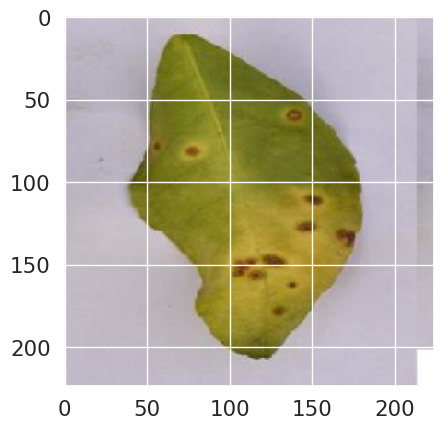

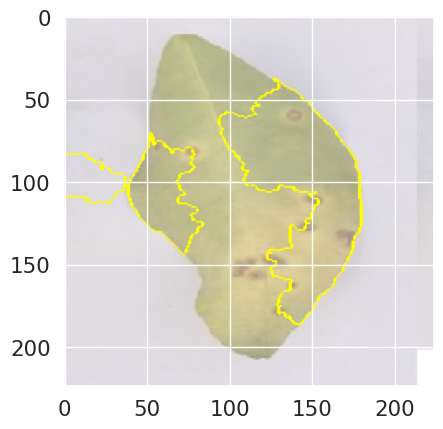

In [ ]:
import lime
from lime import lime_image
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np
from skimage.segmentation import mark_boundaries


# Load your CNN model
model = load_model(os.path.join(weights_path, 'New_Custom_cnn.h5'))

# img = image.load_img(os.path.join(temp_dir,os.listdir(temp_dir)[0]))

# Load an image for explanation
img_path = os.path.join(temp_dir,os.listdir(temp_dir)[7])  # Replace with the path to your image
img = image.load_img(img_path, target_size=(224, 224))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)

# Function to preprocess the input image for the model
def preprocess_input(img_array):
    img_array /= 255.
    # Add any additional preprocessing steps here
    return img_array

img_array = preprocess_input(img_array)

# Generate LIME explanation
explainer = lime_image.LimeImageExplainer()
explanation = explainer.explain_instance(img_array[0], model.predict, top_labels=5, hide_color=0, num_samples=1000)

# Display the original image and the LIME explanation
plt.imshow(img)
plt.show()

temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=True, num_features=5, hide_rest=False)
plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))
plt.show()

  0%|                                                                                                        | 0/1000 [00:00<?, ?it/s]

1/1 [==============================] - 0s 76ms/step


  1%|▉                                                                                              | 10/1000 [00:00<00:41, 24.02it/s]

1/1 [==============================] - 0s 24ms/step


  2%|█▉                                                                                             | 20/1000 [00:01<00:55, 17.73it/s]

1/1 [==============================] - 0s 23ms/step


  3%|██▊                                                                                            | 30/1000 [00:01<00:56, 17.22it/s]

1/1 [==============================] - 0s 25ms/step


  4%|███▊                                                                                           | 40/1000 [00:01<00:43, 21.95it/s]

1/1 [==============================] - 0s 23ms/step


  5%|████▊                                                                                          | 50/1000 [00:02<00:35, 26.57it/s]

1/1 [==============================] - 0s 24ms/step


  6%|█████▋                                                                                         | 60/1000 [00:02<00:36, 25.63it/s]

1/1 [==============================] - 0s 24ms/step


  7%|██████▋                                                                                        | 70/1000 [00:03<00:42, 21.78it/s]

1/1 [==============================] - 0s 24ms/step


  8%|███████▌                                                                                       | 80/1000 [00:03<00:35, 26.19it/s]

1/1 [==============================] - 0s 23ms/step


  9%|████████▌                                                                                      | 90/1000 [00:03<00:30, 29.37it/s]

1/1 [==============================] - 0s 24ms/step


 10%|█████████▍                                                                                    | 100/1000 [00:03<00:25, 35.21it/s]

1/1 [==============================] - 0s 23ms/step


 11%|██████████▎                                                                                   | 110/1000 [00:03<00:21, 41.73it/s]

1/1 [==============================] - 0s 23ms/step


 12%|███████████▎                                                                                  | 120/1000 [00:04<00:18, 47.04it/s]

1/1 [==============================] - 0s 25ms/step


 13%|████████████▏                                                                                 | 130/1000 [00:04<00:18, 46.55it/s]

1/1 [==============================] - 0s 24ms/step


 14%|█████████████▏                                                                                | 140/1000 [00:14<04:29,  3.19it/s]

1/1 [==============================] - 0s 23ms/step


 15%|██████████████                                                                                | 150/1000 [00:14<03:10,  4.45it/s]

1/1 [==============================] - 0s 26ms/step


 16%|███████████████                                                                               | 160/1000 [00:38<12:22,  1.13it/s]

1/1 [==============================] - 0s 23ms/step


 17%|███████████████▉                                                                              | 170/1000 [00:38<08:38,  1.60it/s]

1/1 [==============================] - 0s 23ms/step


 18%|████████████████▉                                                                             | 180/1000 [00:39<06:04,  2.25it/s]

1/1 [==============================] - 0s 24ms/step


 19%|█████████████████▊                                                                            | 190/1000 [00:39<04:18,  3.13it/s]

1/1 [==============================] - 0s 24ms/step


 20%|██████████████████▊                                                                           | 200/1000 [00:39<03:10,  4.20it/s]

1/1 [==============================] - 0s 22ms/step


 21%|███████████████████▋                                                                          | 210/1000 [00:39<02:14,  5.86it/s]

1/1 [==============================] - 0s 24ms/step


 22%|████████████████████▋                                                                         | 220/1000 [00:40<01:40,  7.74it/s]

1/1 [==============================] - 0s 23ms/step


 23%|█████████████████████▌                                                                        | 230/1000 [00:40<01:15, 10.24it/s]

1/1 [==============================] - 0s 23ms/step


 24%|██████████████████████▌                                                                       | 240/1000 [00:40<00:56, 13.52it/s]

1/1 [==============================] - 0s 25ms/step


 25%|███████████████████████▌                                                                      | 250/1000 [00:40<00:45, 16.33it/s]

1/1 [==============================] - 0s 23ms/step


 26%|████████████████████████▍                                                                     | 260/1000 [00:41<00:37, 19.74it/s]

1/1 [==============================] - 0s 23ms/step


 27%|█████████████████████████▍                                                                    | 270/1000 [00:41<00:30, 23.60it/s]

1/1 [==============================] - 0s 23ms/step


 28%|██████████████████████████▎                                                                   | 280/1000 [00:41<00:26, 27.20it/s]

1/1 [==============================] - 0s 24ms/step


 29%|███████████████████████████▎                                                                  | 290/1000 [00:41<00:22, 32.03it/s]

1/1 [==============================] - 0s 22ms/step


 30%|████████████████████████████▏                                                                 | 300/1000 [00:42<00:18, 37.62it/s]

1/1 [==============================] - 0s 24ms/step


 31%|█████████████████████████████▏                                                                | 310/1000 [00:42<00:16, 42.14it/s]

1/1 [==============================] - 0s 23ms/step


 32%|██████████████████████████████                                                                | 320/1000 [00:42<00:15, 44.47it/s]

1/1 [==============================] - 0s 24ms/step


 33%|███████████████████████████████                                                               | 330/1000 [00:42<00:14, 46.81it/s]

1/1 [==============================] - 0s 23ms/step


 34%|███████████████████████████████▉                                                              | 340/1000 [00:42<00:13, 48.95it/s]

1/1 [==============================] - 0s 24ms/step


 35%|████████████████████████████████▉                                                             | 350/1000 [00:43<00:13, 47.10it/s]

1/1 [==============================] - 0s 24ms/step


 36%|█████████████████████████████████▊                                                            | 360/1000 [00:43<00:13, 47.79it/s]

1/1 [==============================] - 0s 23ms/step


 37%|██████████████████████████████████▊                                                           | 370/1000 [00:43<00:13, 48.08it/s]

1/1 [==============================] - 0s 23ms/step


 38%|███████████████████████████████████▋                                                          | 380/1000 [00:43<00:13, 46.89it/s]

1/1 [==============================] - 0s 22ms/step


 39%|████████████████████████████████████▋                                                         | 390/1000 [00:43<00:11, 51.17it/s]

1/1 [==============================] - 0s 24ms/step


 40%|█████████████████████████████████████▌                                                        | 400/1000 [00:43<00:11, 53.46it/s]

1/1 [==============================] - 0s 23ms/step


 41%|██████████████████████████████████████▌                                                       | 410/1000 [00:44<00:14, 39.88it/s]

1/1 [==============================] - 0s 24ms/step


 42%|███████████████████████████████████████▍                                                      | 420/1000 [00:45<00:24, 24.07it/s]

1/1 [==============================] - 0s 23ms/step


 43%|████████████████████████████████████████▍                                                     | 430/1000 [00:45<00:20, 27.70it/s]

1/1 [==============================] - 0s 26ms/step


 44%|█████████████████████████████████████████▎                                                    | 440/1000 [00:45<00:20, 26.70it/s]

1/1 [==============================] - 0s 24ms/step


 45%|██████████████████████████████████████████▎                                                   | 450/1000 [00:46<00:17, 31.62it/s]

1/1 [==============================] - 0s 23ms/step


 46%|███████████████████████████████████████████▏                                                  | 460/1000 [00:46<00:16, 33.09it/s]

1/1 [==============================] - 0s 24ms/step


 47%|████████████████████████████████████████████▏                                                 | 470/1000 [00:46<00:15, 33.47it/s]

1/1 [==============================] - 0s 23ms/step


 48%|█████████████████████████████████████████████                                                 | 480/1000 [00:46<00:13, 38.50it/s]

1/1 [==============================] - 0s 25ms/step


 49%|██████████████████████████████████████████████                                                | 490/1000 [00:47<00:16, 30.87it/s]

1/1 [==============================] - 0s 24ms/step


 50%|███████████████████████████████████████████████                                               | 500/1000 [00:55<02:11,  3.79it/s]

1/1 [==============================] - 0s 23ms/step


 51%|███████████████████████████████████████████████▉                                              | 510/1000 [00:55<01:33,  5.26it/s]

1/1 [==============================] - 0s 24ms/step


 52%|████████████████████████████████████████████████▉                                             | 520/1000 [00:55<01:10,  6.85it/s]

1/1 [==============================] - 0s 23ms/step


 53%|█████████████████████████████████████████████████▊                                            | 530/1000 [00:56<00:51,  9.14it/s]

1/1 [==============================] - 0s 23ms/step


 54%|██████████████████████████████████████████████████▊                                           | 540/1000 [00:56<00:38, 12.10it/s]

1/1 [==============================] - 0s 23ms/step


 55%|███████████████████████████████████████████████████▋                                          | 550/1000 [00:56<00:28, 15.60it/s]

1/1 [==============================] - 0s 25ms/step


 56%|████████████████████████████████████████████████████▋                                         | 560/1000 [00:56<00:25, 17.14it/s]

1/1 [==============================] - 0s 22ms/step


 57%|█████████████████████████████████████████████████████▌                                        | 570/1000 [00:57<00:20, 20.49it/s]

1/1 [==============================] - 0s 28ms/step


 58%|██████████████████████████████████████████████████████▌                                       | 580/1000 [00:57<00:20, 20.89it/s]

1/1 [==============================] - 0s 24ms/step


 59%|███████████████████████████████████████████████████████▍                                      | 590/1000 [00:58<00:18, 21.99it/s]

1/1 [==============================] - 0s 23ms/step


 60%|████████████████████████████████████████████████████████▍                                     | 600/1000 [01:10<02:43,  2.44it/s]

1/1 [==============================] - 0s 24ms/step


 61%|█████████████████████████████████████████████████████████▎                                    | 610/1000 [01:10<01:54,  3.40it/s]

1/1 [==============================] - 0s 23ms/step


 62%|██████████████████████████████████████████████████████████▎                                   | 620/1000 [01:11<01:21,  4.64it/s]

1/1 [==============================] - 0s 23ms/step


 63%|███████████████████████████████████████████████████████████▏                                  | 630/1000 [01:11<00:58,  6.31it/s]

1/1 [==============================] - 0s 25ms/step


 64%|████████████████████████████████████████████████████████████▏                                 | 640/1000 [01:11<00:43,  8.35it/s]

1/1 [==============================] - 0s 22ms/step


 65%|█████████████████████████████████████████████████████████████                                 | 650/1000 [01:12<00:32, 10.83it/s]

1/1 [==============================] - 0s 24ms/step


 66%|██████████████████████████████████████████████████████████████                                | 660/1000 [01:12<00:24, 13.89it/s]

1/1 [==============================] - 0s 24ms/step


 67%|██████████████████████████████████████████████████████████████▉                               | 670/1000 [01:13<00:24, 13.63it/s]

1/1 [==============================] - 0s 24ms/step


 68%|███████████████████████████████████████████████████████████████▉                              | 680/1000 [01:13<00:18, 17.26it/s]

1/1 [==============================] - 0s 24ms/step


 69%|████████████████████████████████████████████████████████████████▊                             | 690/1000 [01:13<00:15, 20.35it/s]

1/1 [==============================] - 0s 24ms/step


 70%|█████████████████████████████████████████████████████████████████▊                            | 700/1000 [01:13<00:12, 24.57it/s]

1/1 [==============================] - 0s 24ms/step


 71%|██████████████████████████████████████████████████████████████████▋                           | 710/1000 [01:13<00:09, 29.35it/s]

1/1 [==============================] - 0s 27ms/step


 72%|███████████████████████████████████████████████████████████████████▋                          | 720/1000 [01:14<00:08, 31.86it/s]

1/1 [==============================] - 0s 25ms/step


 73%|████████████████████████████████████████████████████████████████████▌                         | 730/1000 [01:14<00:07, 35.96it/s]

1/1 [==============================] - 0s 23ms/step


 74%|█████████████████████████████████████████████████████████████████████▌                        | 740/1000 [01:14<00:06, 40.82it/s]

1/1 [==============================] - 0s 26ms/step


 75%|██████████████████████████████████████████████████████████████████████▌                       | 750/1000 [01:14<00:06, 39.85it/s]

1/1 [==============================] - 0s 24ms/step


 76%|███████████████████████████████████████████████████████████████████████▍                      | 760/1000 [01:15<00:05, 44.33it/s]

1/1 [==============================] - 0s 24ms/step


 77%|████████████████████████████████████████████████████████████████████████▍                     | 770/1000 [01:15<00:04, 49.09it/s]

1/1 [==============================] - 0s 23ms/step


 78%|█████████████████████████████████████████████████████████████████████████▎                    | 780/1000 [01:15<00:04, 47.53it/s]

1/1 [==============================] - 0s 23ms/step


 79%|██████████████████████████████████████████████████████████████████████████▎                   | 790/1000 [01:15<00:04, 48.90it/s]

1/1 [==============================] - 0s 23ms/step


 80%|███████████████████████████████████████████████████████████████████████████▏                  | 800/1000 [01:15<00:03, 50.46it/s]

1/1 [==============================] - 0s 23ms/step


 81%|████████████████████████████████████████████████████████████████████████████▏                 | 810/1000 [01:15<00:03, 50.60it/s]

1/1 [==============================] - 0s 23ms/step


 82%|█████████████████████████████████████████████████████████████████████████████                 | 820/1000 [01:16<00:03, 46.35it/s]

1/1 [==============================] - 0s 24ms/step


 83%|██████████████████████████████████████████████████████████████████████████████                | 830/1000 [01:16<00:03, 44.60it/s]

1/1 [==============================] - 0s 24ms/step


 84%|██████████████████████████████████████████████████████████████████████████████▉               | 840/1000 [01:16<00:03, 49.79it/s]

1/1 [==============================] - 0s 25ms/step


 85%|███████████████████████████████████████████████████████████████████████████████▉              | 850/1000 [01:16<00:02, 53.37it/s]

1/1 [==============================] - 0s 23ms/step


 86%|████████████████████████████████████████████████████████████████████████████████▊             | 860/1000 [01:16<00:02, 53.67it/s]

1/1 [==============================] - 0s 23ms/step


 87%|█████████████████████████████████████████████████████████████████████████████████▊            | 870/1000 [01:17<00:02, 51.96it/s]

1/1 [==============================] - 0s 24ms/step


 88%|██████████████████████████████████████████████████████████████████████████████████▋           | 880/1000 [01:17<00:02, 48.10it/s]

1/1 [==============================] - 0s 25ms/step


 89%|███████████████████████████████████████████████████████████████████████████████████▋          | 890/1000 [01:17<00:02, 38.96it/s]

1/1 [==============================] - 0s 24ms/step


 90%|████████████████████████████████████████████████████████████████████████████████████▌         | 900/1000 [01:18<00:02, 38.38it/s]

1/1 [==============================] - 0s 23ms/step


 91%|█████████████████████████████████████████████████████████████████████████████████████▌        | 910/1000 [01:18<00:02, 42.92it/s]

1/1 [==============================] - 0s 23ms/step


 92%|██████████████████████████████████████████████████████████████████████████████████████▍       | 920/1000 [01:18<00:01, 43.36it/s]

1/1 [==============================] - 0s 24ms/step


 93%|███████████████████████████████████████████████████████████████████████████████████████▍      | 930/1000 [01:18<00:01, 48.50it/s]

1/1 [==============================] - 0s 26ms/step


 94%|████████████████████████████████████████████████████████████████████████████████████████▎     | 940/1000 [01:18<00:01, 50.14it/s]

1/1 [==============================] - 0s 23ms/step


 95%|█████████████████████████████████████████████████████████████████████████████████████████▎    | 950/1000 [01:18<00:00, 53.62it/s]

1/1 [==============================] - 0s 24ms/step


 96%|██████████████████████████████████████████████████████████████████████████████████████████▏   | 960/1000 [01:19<00:00, 54.32it/s]

1/1 [==============================] - 0s 24ms/step


 97%|███████████████████████████████████████████████████████████████████████████████████████████▏  | 970/1000 [01:19<00:00, 52.70it/s]

1/1 [==============================] - 0s 24ms/step


 98%|████████████████████████████████████████████████████████████████████████████████████████████  | 980/1000 [01:19<00:00, 40.44it/s]

1/1 [==============================] - 0s 23ms/step


 99%|█████████████████████████████████████████████████████████████████████████████████████████████ | 990/1000 [01:19<00:00, 38.75it/s]

1/1 [==============================] - 0s 23ms/step


100%|█████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [01:20<00:00, 12.47it/s]


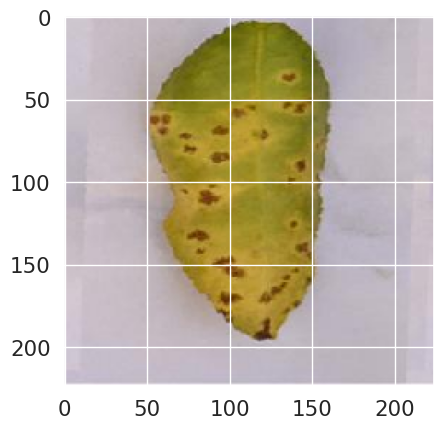

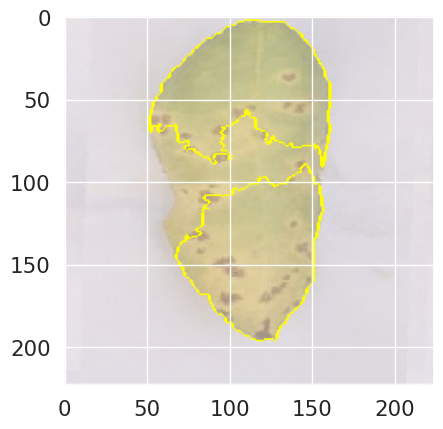

In [ ]:
import lime
from lime import lime_image
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np
from skimage.segmentation import mark_boundaries


# Load your CNN model
model = load_model(os.path.join(weights_path, 'New_Custom_cnn.h5'))

# img = image.load_img(os.path.join(temp_dir,os.listdir(temp_dir)[0]))

# Load an image for explanation
img_path = os.path.join(temp_dir,os.listdir(temp_dir)[15])  # Replace with the path to your image
img = image.load_img(img_path, target_size=(224, 224))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)

# Function to preprocess the input image for the model
def preprocess_input(img_array):
    img_array /= 255.
    # Add any additional preprocessing steps here
    return img_array

img_array = preprocess_input(img_array)

# Generate LIME explanation
explainer = lime_image.LimeImageExplainer()
explanation = explainer.explain_instance(img_array[0], model.predict, top_labels=5, hide_color=0, num_samples=1000)

# Display the original image and the LIME explanation
plt.imshow(img)
plt.show()

temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=True, num_features=5, hide_rest=False)
plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))
plt.show()

Lime Black Spot

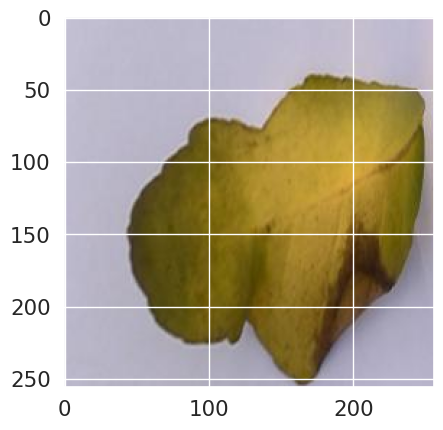

In [ ]:
temp_dir = os.path.join(root_path, 'split_aug', 'val', 'aug_Black spot')
img = image.load_img(os.path.join(temp_dir,os.listdir(temp_dir)[22]))
plt.imshow(img)

  0%|                                                                                                        | 0/1000 [00:00<?, ?it/s]

1/1 [==============================] - 0s 70ms/step


  1%|▉                                                                                              | 10/1000 [00:00<00:12, 81.53it/s]

1/1 [==============================] - 0s 23ms/step


  3%|██▊                                                                                           | 30/1000 [00:00<00:08, 108.94it/s]

1/1 [==============================] - 0s 23ms/step


  5%|████▋                                                                                         | 50/1000 [00:00<00:08, 118.29it/s]

1/1 [==============================] - 0s 23ms/step


  7%|██████▌                                                                                       | 70/1000 [00:00<00:07, 123.39it/s]

1/1 [==============================] - 0s 23ms/step


  9%|████████▍                                                                                     | 90/1000 [00:00<00:07, 125.93it/s]

1/1 [==============================] - 0s 24ms/step


 11%|██████████▏                                                                                  | 110/1000 [00:00<00:06, 128.31it/s]

1/1 [==============================] - 0s 35ms/step


 13%|████████████                                                                                 | 130/1000 [00:01<00:07, 122.48it/s]

1/1 [==============================] - 0s 23ms/step


 15%|█████████████▉                                                                               | 150/1000 [00:01<00:06, 125.51it/s]

1/1 [==============================] - 0s 24ms/step


 17%|███████████████▋                                                                             | 169/1000 [00:01<00:05, 139.95it/s]

1/1 [==============================] - 0s 24ms/step


 18%|█████████████████                                                                            | 184/1000 [00:01<00:06, 127.41it/s]

1/1 [==============================] - 0s 25ms/step


 20%|██████████████████▌                                                                          | 200/1000 [00:01<00:06, 121.73it/s]

1/1 [==============================] - 0s 26ms/step


 22%|████████████████████▍                                                                        | 220/1000 [00:01<00:06, 121.33it/s]

1/1 [==============================] - 0s 25ms/step


 24%|██████████████████████                                                                       | 237/1000 [00:01<00:05, 132.11it/s]

1/1 [==============================] - 0s 24ms/step


 25%|███████████████████████▎                                                                     | 251/1000 [00:02<00:07, 100.69it/s]

1/1 [==============================] - 0s 25ms/step


 27%|████████████████████████▋                                                                    | 266/1000 [00:02<00:06, 110.83it/s]

1/1 [==============================] - 0s 27ms/step


 28%|█████████████████████████▉                                                                   | 279/1000 [00:02<00:06, 107.84it/s]

1/1 [==============================] - 0s 23ms/step


 29%|███████████████████████████▎                                                                  | 291/1000 [00:02<00:07, 92.40it/s]

1/1 [==============================] - 0s 25ms/step


 30%|████████████████████████████▎                                                                | 305/1000 [00:02<00:06, 102.64it/s]

1/1 [==============================] - 0s 24ms/step


 32%|█████████████████████████████▍                                                               | 317/1000 [00:02<00:06, 104.63it/s]

1/1 [==============================] - 0s 24ms/step


 33%|██████████████████████████████▉                                                               | 329/1000 [00:02<00:07, 94.67it/s]

1/1 [==============================] - 0s 24ms/step


 34%|███████████████████████████████▉                                                              | 340/1000 [00:03<00:08, 78.93it/s]

1/1 [==============================] - 0s 23ms/step


 35%|████████████████████████████████▉                                                             | 350/1000 [00:07<01:25,  7.57it/s]

1/1 [==============================] - 0s 22ms/step


 37%|██████████████████████████████████▊                                                           | 370/1000 [00:08<00:50, 12.59it/s]

1/1 [==============================] - 0s 26ms/step


 39%|████████████████████████████████████▋                                                         | 390/1000 [00:08<00:32, 19.05it/s]

1/1 [==============================] - 0s 24ms/step


 41%|██████████████████████████████████████▌                                                       | 410/1000 [00:08<00:21, 27.18it/s]

1/1 [==============================] - 0s 23ms/step


 43%|████████████████████████████████████████▍                                                     | 430/1000 [00:08<00:15, 36.96it/s]

1/1 [==============================] - 0s 24ms/step


 45%|██████████████████████████████████████████▎                                                   | 450/1000 [00:08<00:11, 47.73it/s]

1/1 [==============================] - 0s 23ms/step


 47%|████████████████████████████████████████████▏                                                 | 470/1000 [00:08<00:08, 59.80it/s]

1/1 [==============================] - 0s 26ms/step


 49%|█████████████████████████████████████████████▉                                                | 489/1000 [00:08<00:06, 75.23it/s]

1/1 [==============================] - 0s 23ms/step


 50%|███████████████████████████████████████████████▍                                              | 504/1000 [00:09<00:06, 80.74it/s]

1/1 [==============================] - 0s 24ms/step


 52%|████████████████████████████████████████████████▊                                             | 519/1000 [00:09<00:05, 91.93it/s]

1/1 [==============================] - 0s 23ms/step


 53%|██████████████████████████████████████████████████                                            | 533/1000 [00:09<00:04, 94.19it/s]

1/1 [==============================] - 0s 24ms/step


 55%|███████████████████████████████████████████████████▋                                          | 550/1000 [00:09<00:04, 99.03it/s]

1/1 [==============================] - 0s 26ms/step


 57%|█████████████████████████████████████████████████████                                        | 570/1000 [00:09<00:04, 106.19it/s]

1/1 [==============================] - 0s 26ms/step


 59%|██████████████████████████████████████████████████████▊                                      | 590/1000 [00:09<00:03, 108.73it/s]

1/1 [==============================] - 0s 24ms/step


 61%|████████████████████████████████████████████████████████▌                                    | 608/1000 [00:09<00:03, 123.23it/s]

1/1 [==============================] - 0s 25ms/step


 62%|██████████████████████████████████████████████████████████▍                                   | 622/1000 [00:12<00:22, 17.14it/s]

1/1 [==============================] - 0s 23ms/step


 64%|████████████████████████████████████████████████████████████▏                                 | 640/1000 [00:12<00:15, 23.47it/s]

1/1 [==============================] - 0s 25ms/step


 66%|██████████████████████████████████████████████████████████████                                | 660/1000 [00:13<00:10, 32.17it/s]

1/1 [==============================] - 0s 25ms/step


 68%|███████████████████████████████████████████████████████████████▋                              | 677/1000 [00:13<00:07, 41.90it/s]

1/1 [==============================] - 0s 24ms/step


 69%|████████████████████████████████████████████████████████████████▊                             | 690/1000 [00:13<00:06, 47.86it/s]

1/1 [==============================] - 0s 22ms/step


 71%|██████████████████████████████████████████████████████████████████▋                           | 710/1000 [00:13<00:04, 61.11it/s]

1/1 [==============================] - 0s 22ms/step


 73%|████████████████████████████████████████████████████████████████████▌                         | 730/1000 [00:13<00:03, 74.68it/s]

1/1 [==============================] - 0s 25ms/step


 75%|██████████████████████████████████████████████████████████████████████▌                       | 750/1000 [00:13<00:02, 85.49it/s]

1/1 [==============================] - 0s 23ms/step


 77%|████████████████████████████████████████████████████████████████████████▍                     | 770/1000 [00:14<00:02, 96.20it/s]

1/1 [==============================] - 0s 22ms/step


 79%|█████████████████████████████████████████████████████████████████████████▍                   | 790/1000 [00:14<00:01, 105.57it/s]

1/1 [==============================] - 0s 22ms/step


 81%|███████████████████████████████████████████████████████████████████████████▎                 | 810/1000 [00:14<00:01, 113.82it/s]

1/1 [==============================] - 0s 23ms/step


 83%|█████████████████████████████████████████████████████████████████████████████▏               | 830/1000 [00:14<00:01, 118.81it/s]

1/1 [==============================] - 0s 23ms/step


 85%|███████████████████████████████████████████████████████████████████████████████              | 850/1000 [00:14<00:01, 121.68it/s]

1/1 [==============================] - 0s 25ms/step


 87%|████████████████████████████████████████████████████████████████████████████████▉            | 870/1000 [00:14<00:01, 121.63it/s]

1/1 [==============================] - 0s 23ms/step


 88%|██████████████████████████████████████████████████████████████████████████████████           | 883/1000 [00:14<00:00, 121.05it/s]

1/1 [==============================] - 0s 23ms/step


 90%|███████████████████████████████████████████████████████████████████████████████████▌         | 899/1000 [00:14<00:00, 129.43it/s]

1/1 [==============================] - 0s 23ms/step


 91%|████████████████████████████████████████████████████████████████████████████████████▉        | 913/1000 [00:15<00:00, 113.71it/s]

1/1 [==============================] - 0s 24ms/step


 92%|██████████████████████████████████████████████████████████████████████████████████████       | 925/1000 [00:15<00:00, 112.78it/s]

1/1 [==============================] - 0s 25ms/step


 94%|███████████████████████████████████████████████████████████████████████████████████████▏     | 938/1000 [00:15<00:00, 116.93it/s]

1/1 [==============================] - 0s 24ms/step


 95%|█████████████████████████████████████████████████████████████████████████████████████████▍    | 951/1000 [00:15<00:00, 92.04it/s]

1/1 [==============================] - 0s 24ms/step


 96%|██████████████████████████████████████████████████████████████████████████████████████████▍   | 962/1000 [00:15<00:00, 92.23it/s]

1/1 [==============================] - 0s 24ms/step


 97%|███████████████████████████████████████████████████████████████████████████████████████████▎  | 972/1000 [00:15<00:00, 89.37it/s]

1/1 [==============================] - 0s 25ms/step


 98%|████████████████████████████████████████████████████████████████████████████████████████████▎ | 982/1000 [00:17<00:00, 18.96it/s]

1/1 [==============================] - 0s 24ms/step


100%|█████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:17<00:00, 56.58it/s]


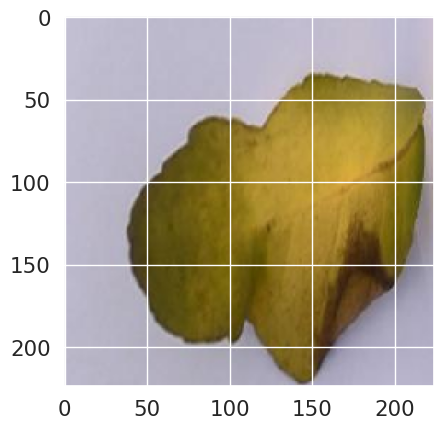

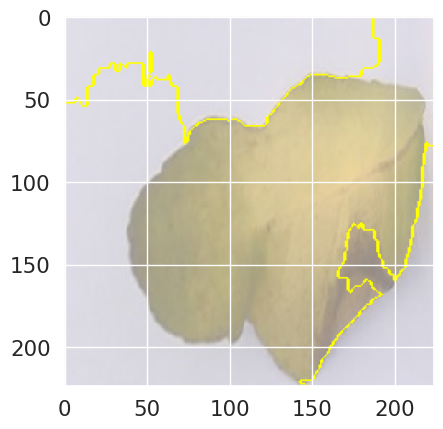

In [ ]:
import lime
from lime import lime_image
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np
from skimage.segmentation import mark_boundaries


# Load your CNN model
model = load_model(os.path.join(weights_path, 'New_Custom_cnn.h5'))

# img = image.load_img(os.path.join(temp_dir,os.listdir(temp_dir)[0]))

# Load an image for explanation
img_path = os.path.join(temp_dir,os.listdir(temp_dir)[22])  # Replace with the path to your image
img = image.load_img(img_path, target_size=(224, 224))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)

# Function to preprocess the input image for the model
def preprocess_input(img_array):
    img_array /= 255.
    # Add any additional preprocessing steps here
    return img_array

img_array = preprocess_input(img_array)

# Generate LIME explanation
explainer = lime_image.LimeImageExplainer()
explanation = explainer.explain_instance(img_array[0], model.predict, top_labels=5, hide_color=0, num_samples=1000)

# Display the original image and the LIME explanation
plt.imshow(img)
plt.show()

temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=True, num_features=5, hide_rest=False)
plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))
plt.show()

  0%|                                                                                                        | 0/1000 [00:00<?, ?it/s]

1/1 [==============================] - 0s 70ms/step


  1%|▉                                                                                              | 10/1000 [00:00<00:12, 80.84it/s]

1/1 [==============================] - 0s 24ms/step


  3%|██▊                                                                                           | 30/1000 [00:00<00:09, 106.27it/s]

1/1 [==============================] - 0s 23ms/step


  5%|████▋                                                                                         | 50/1000 [00:00<00:08, 116.52it/s]

1/1 [==============================] - 0s 23ms/step


  7%|██████▌                                                                                       | 70/1000 [00:00<00:07, 121.10it/s]

1/1 [==============================] - 0s 24ms/step


  9%|████████▍                                                                                     | 90/1000 [00:00<00:07, 122.99it/s]

1/1 [==============================] - 0s 23ms/step


 11%|██████████                                                                                   | 108/1000 [00:00<00:06, 136.69it/s]

1/1 [==============================] - 0s 29ms/step


 12%|███████████▍                                                                                 | 123/1000 [00:01<00:07, 115.74it/s]

1/1 [==============================] - 0s 24ms/step


 14%|█████████████                                                                                | 140/1000 [00:01<00:07, 113.80it/s]

1/1 [==============================] - 0s 26ms/step


 16%|██████████████▊                                                                              | 159/1000 [00:01<00:06, 131.08it/s]

1/1 [==============================] - 0s 29ms/step


 17%|████████████████▏                                                                            | 174/1000 [00:01<00:07, 115.96it/s]

1/1 [==============================] - 0s 25ms/step


 19%|█████████████████▋                                                                           | 190/1000 [00:01<00:07, 109.40it/s]

1/1 [==============================] - 0s 25ms/step


 20%|██████████████████▊                                                                          | 202/1000 [00:01<00:07, 110.53it/s]

1/1 [==============================] - 0s 26ms/step


 21%|███████████████████▉                                                                         | 214/1000 [00:01<00:07, 112.18it/s]

1/1 [==============================] - 0s 27ms/step


 23%|█████████████████████                                                                        | 226/1000 [00:01<00:06, 112.64it/s]

1/1 [==============================] - 0s 26ms/step


 24%|██████████████████████▏                                                                      | 238/1000 [00:02<00:06, 112.79it/s]

1/1 [==============================] - 0s 28ms/step


 25%|███████████████████████▌                                                                      | 250/1000 [00:03<00:27, 27.01it/s]

1/1 [==============================] - 0s 23ms/step


 27%|█████████████████████████▍                                                                    | 270/1000 [00:03<00:18, 39.17it/s]

1/1 [==============================] - 0s 23ms/step


 29%|███████████████████████████▎                                                                  | 290/1000 [00:03<00:13, 52.46it/s]

1/1 [==============================] - 0s 25ms/step


 31%|█████████████████████████████                                                                 | 309/1000 [00:03<00:10, 68.98it/s]

1/1 [==============================] - 0s 24ms/step


 32%|██████████████████████████████▎                                                               | 322/1000 [00:03<00:09, 73.48it/s]

1/1 [==============================] - 0s 26ms/step


 34%|███████████████████████████████▉                                                              | 340/1000 [00:04<00:07, 82.83it/s]

1/1 [==============================] - 0s 26ms/step


 36%|█████████████████████████████████▊                                                            | 360/1000 [00:04<00:06, 91.44it/s]

1/1 [==============================] - 0s 25ms/step


 38%|███████████████████████████████████▋                                                          | 380/1000 [00:04<00:06, 99.79it/s]

1/1 [==============================] - 0s 29ms/step


 40%|█████████████████████████████████████▏                                                       | 400/1000 [00:04<00:05, 106.63it/s]

1/1 [==============================] - 0s 30ms/step


 42%|██████████████████████████████████████▊                                                      | 418/1000 [00:04<00:04, 120.65it/s]

1/1 [==============================] - 0s 27ms/step


 43%|████████████████████████████████████████▏                                                    | 432/1000 [00:04<00:05, 107.43it/s]

1/1 [==============================] - 0s 33ms/step


 44%|█████████████████████████████████████████▊                                                    | 445/1000 [00:05<00:07, 74.34it/s]

1/1 [==============================] - 0s 31ms/step


 46%|██████████████████████████████████████████▊                                                   | 455/1000 [00:05<00:07, 74.89it/s]

1/1 [==============================] - 0s 31ms/step


 46%|███████████████████████████████████████████▌                                                  | 464/1000 [00:05<00:06, 76.69it/s]

1/1 [==============================] - 0s 31ms/step


 48%|████████████████████████████████████████████▋                                                 | 476/1000 [00:05<00:06, 85.42it/s]

1/1 [==============================] - 0s 30ms/step


 49%|█████████████████████████████████████████████▋                                                | 486/1000 [00:05<00:05, 86.14it/s]

1/1 [==============================] - 0s 30ms/step


 50%|██████████████████████████████████████████████▌                                               | 496/1000 [00:08<00:38, 13.23it/s]

1/1 [==============================] - 0s 31ms/step


 51%|███████████████████████████████████████████████▉                                              | 510/1000 [00:08<00:26, 18.72it/s]

1/1 [==============================] - 0s 30ms/step


 52%|█████████████████████████████████████████████████                                             | 522/1000 [00:08<00:19, 25.05it/s]

1/1 [==============================] - 0s 57ms/step


 54%|██████████████████████████████████████████████████▊                                           | 540/1000 [00:08<00:13, 34.36it/s]

1/1 [==============================] - 0s 31ms/step


 55%|███████████████████████████████████████████████████▉                                          | 552/1000 [00:08<00:10, 42.53it/s]

1/1 [==============================] - 0s 37ms/step


 57%|█████████████████████████████████████████████████████▌                                        | 570/1000 [00:08<00:08, 53.60it/s]

1/1 [==============================] - 0s 32ms/step


 58%|██████████████████████████████████████████████████████▋                                       | 582/1000 [00:09<00:06, 62.47it/s]

1/1 [==============================] - 0s 31ms/step


 60%|████████████████████████████████████████████████████████▎                                     | 599/1000 [00:09<00:05, 79.73it/s]

1/1 [==============================] - 0s 31ms/step


 61%|█████████████████████████████████████████████████████████▌                                    | 612/1000 [00:09<00:04, 78.23it/s]

1/1 [==============================] - 0s 34ms/step


 62%|██████████████████████████████████████████████████████████▋                                   | 624/1000 [00:09<00:04, 86.11it/s]

1/1 [==============================] - 0s 37ms/step


 64%|████████████████████████████████████████████████████████████▏                                 | 640/1000 [00:09<00:04, 88.45it/s]

1/1 [==============================] - 0s 31ms/step


 66%|█████████████████████████████████████████████████████████████                                | 656/1000 [00:09<00:03, 103.23it/s]

1/1 [==============================] - 0s 29ms/step


 67%|██████████████████████████████████████████████████████████████▉                               | 670/1000 [00:09<00:03, 97.91it/s]

1/1 [==============================] - 0s 29ms/step


 69%|███████████████████████████████████████████████████████████████▊                             | 686/1000 [00:09<00:02, 111.75it/s]

1/1 [==============================] - 0s 30ms/step


 70%|█████████████████████████████████████████████████████████████████                            | 699/1000 [00:10<00:02, 115.63it/s]

1/1 [==============================] - 0s 31ms/step


 71%|██████████████████████████████████████████████████████████████████▉                           | 712/1000 [00:10<00:03, 82.44it/s]

1/1 [==============================] - 0s 30ms/step


 72%|███████████████████████████████████████████████████████████████████▉                          | 723/1000 [00:11<00:10, 26.70it/s]

1/1 [==============================] - 0s 28ms/step


 74%|█████████████████████████████████████████████████████████████████████▌                        | 740/1000 [00:11<00:07, 36.18it/s]

1/1 [==============================] - 0s 29ms/step


 76%|███████████████████████████████████████████████████████████████████████▎                      | 758/1000 [00:11<00:04, 50.24it/s]

1/1 [==============================] - 0s 28ms/step


 77%|████████████████████████████████████████████████████████████████████████▍                     | 770/1000 [00:11<00:04, 54.09it/s]

1/1 [==============================] - 0s 31ms/step


 78%|█████████████████████████████████████████████████████████████████████████▎                    | 780/1000 [00:12<00:03, 60.45it/s]

1/1 [==============================] - 0s 30ms/step


 79%|██████████████████████████████████████████████████████████████████████████▌                   | 793/1000 [00:12<00:02, 71.82it/s]

1/1 [==============================] - 0s 29ms/step


 81%|████████████████████████████████████████████████████████████████████████████▏                 | 810/1000 [00:12<00:02, 80.48it/s]

1/1 [==============================] - 0s 29ms/step


 83%|█████████████████████████████████████████████████████████████████████████████▋                | 826/1000 [00:12<00:01, 95.82it/s]

1/1 [==============================] - 0s 30ms/step


 84%|██████████████████████████████████████████████████████████████████████████████▉               | 840/1000 [00:12<00:01, 92.88it/s]

1/1 [==============================] - 0s 28ms/step


 86%|███████████████████████████████████████████████████████████████████████████████▊             | 858/1000 [00:12<00:01, 111.58it/s]

1/1 [==============================] - 0s 30ms/step


 87%|█████████████████████████████████████████████████████████████████████████████████            | 872/1000 [00:12<00:01, 101.15it/s]

1/1 [==============================] - 0s 27ms/step


 89%|██████████████████████████████████████████████████████████████████████████████████▊          | 890/1000 [00:13<00:01, 103.43it/s]

1/1 [==============================] - 0s 28ms/step


 91%|████████████████████████████████████████████████████████████████████████████████████▌        | 909/1000 [00:13<00:00, 122.20it/s]

1/1 [==============================] - 0s 26ms/step


 92%|█████████████████████████████████████████████████████████████████████████████████████▊       | 923/1000 [00:13<00:00, 112.72it/s]

1/1 [==============================] - 0s 26ms/step


 94%|███████████████████████████████████████████████████████████████████████████████████████▍     | 940/1000 [00:13<00:00, 109.03it/s]

1/1 [==============================] - 0s 28ms/step


 95%|████████████████████████████████████████████████████████████████████████████████████████▌    | 952/1000 [00:13<00:00, 110.15it/s]

1/1 [==============================] - 0s 27ms/step


 96%|█████████████████████████████████████████████████████████████████████████████████████████▋   | 964/1000 [00:13<00:00, 100.87it/s]

1/1 [==============================] - 0s 26ms/step


 98%|██████████████████████████████████████████████████████████████████████████████████████████▊  | 977/1000 [00:13<00:00, 107.66it/s]

1/1 [==============================] - 0s 27ms/step


 99%|█████████████████████████████████████████████████████████████████████████████████████████████ | 990/1000 [00:14<00:00, 92.73it/s]

1/1 [==============================] - 0s 27ms/step


100%|█████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:14<00:00, 70.84it/s]


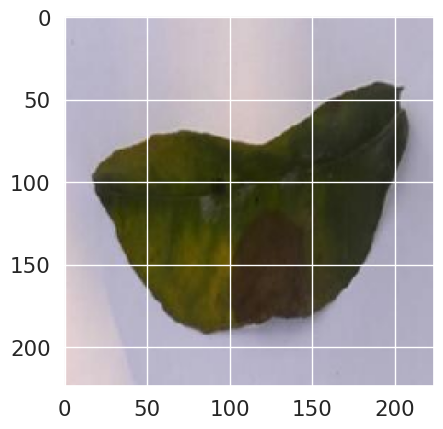

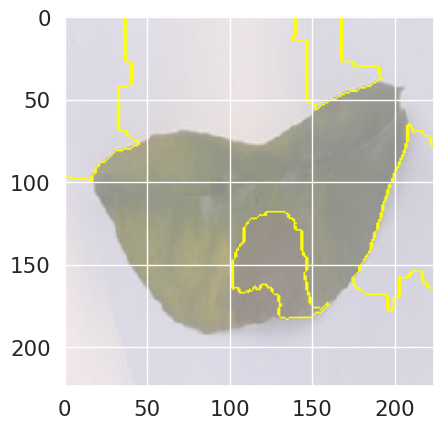

In [ ]:
import lime
from lime import lime_image
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np
from skimage.segmentation import mark_boundaries


# Load your CNN model
model = load_model(os.path.join(weights_path, 'New_Custom_cnn.h5'))

# img = image.load_img(os.path.join(temp_dir,os.listdir(temp_dir)[0]))

# Load an image for explanation
img_path = os.path.join(temp_dir,os.listdir(temp_dir)[25])  # Replace with the path to your image
img = image.load_img(img_path, target_size=(224, 224))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)

# Function to preprocess the input image for the model
def preprocess_input(img_array):
    img_array /= 255.
    # Add any additional preprocessing steps here
    return img_array

img_array = preprocess_input(img_array)

# Generate LIME explanation
explainer = lime_image.LimeImageExplainer()
explanation = explainer.explain_instance(img_array[0], model.predict, top_labels=5, hide_color=0, num_samples=1000)

# Display the original image and the LIME explanation
plt.imshow(img)
plt.show()

temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=True, num_features=5, hide_rest=False)
plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))
plt.show()

  0%|                                                                                                        | 0/1000 [00:00<?, ?it/s]

1/1 [==============================] - 0s 70ms/step


  1%|▉                                                                                              | 10/1000 [00:00<00:18, 53.58it/s]

1/1 [==============================] - 0s 23ms/step


  2%|█▉                                                                                             | 20/1000 [00:00<00:17, 57.21it/s]

1/1 [==============================] - 0s 26ms/step


  3%|██▊                                                                                            | 30/1000 [00:00<00:16, 60.29it/s]

1/1 [==============================] - 0s 24ms/step


  4%|███▊                                                                                           | 40/1000 [00:00<00:14, 64.49it/s]

1/1 [==============================] - 0s 23ms/step


  5%|████▊                                                                                          | 50/1000 [00:00<00:14, 67.79it/s]

1/1 [==============================] - 0s 22ms/step


  6%|█████▋                                                                                         | 60/1000 [00:01<00:16, 57.60it/s]

1/1 [==============================] - 0s 24ms/step


  7%|██████▋                                                                                        | 70/1000 [00:01<00:17, 51.80it/s]

1/1 [==============================] - 0s 23ms/step


  8%|███████▌                                                                                       | 80/1000 [00:01<00:16, 55.77it/s]

1/1 [==============================] - 0s 25ms/step


  9%|████████▌                                                                                      | 90/1000 [00:03<01:01, 14.85it/s]

1/1 [==============================] - 0s 24ms/step


 10%|█████████▍                                                                                    | 100/1000 [00:03<00:47, 19.00it/s]

1/1 [==============================] - 0s 25ms/step


 11%|██████████▎                                                                                   | 110/1000 [00:03<00:36, 24.67it/s]

1/1 [==============================] - 0s 26ms/step


 12%|███████████▎                                                                                  | 120/1000 [00:03<00:28, 31.29it/s]

1/1 [==============================] - 0s 24ms/step


 13%|████████████▏                                                                                 | 130/1000 [00:03<00:25, 34.03it/s]

1/1 [==============================] - 0s 23ms/step


 14%|█████████████▏                                                                                | 140/1000 [00:03<00:20, 41.81it/s]

1/1 [==============================] - 0s 23ms/step


 15%|██████████████                                                                                | 150/1000 [00:04<00:16, 50.05it/s]

1/1 [==============================] - 0s 25ms/step


 16%|███████████████                                                                               | 160/1000 [00:04<00:16, 51.14it/s]

1/1 [==============================] - 0s 24ms/step


 17%|███████████████▉                                                                              | 170/1000 [00:05<00:33, 24.55it/s]

1/1 [==============================] - 0s 25ms/step


 18%|████████████████▉                                                                             | 180/1000 [00:05<00:26, 30.70it/s]

1/1 [==============================] - 0s 24ms/step


 19%|█████████████████▊                                                                            | 190/1000 [00:05<00:21, 37.28it/s]

1/1 [==============================] - 0s 24ms/step


 20%|██████████████████▊                                                                           | 200/1000 [00:05<00:28, 28.21it/s]

1/1 [==============================] - 0s 27ms/step


 21%|███████████████████▋                                                                          | 210/1000 [00:06<00:22, 35.01it/s]

1/1 [==============================] - 0s 25ms/step


 22%|████████████████████▋                                                                         | 220/1000 [00:06<00:18, 42.67it/s]

1/1 [==============================] - 0s 23ms/step


 23%|█████████████████████▌                                                                        | 230/1000 [00:06<00:18, 41.11it/s]

1/1 [==============================] - 0s 23ms/step


 24%|██████████████████████▌                                                                       | 240/1000 [00:06<00:15, 48.88it/s]

1/1 [==============================] - 0s 23ms/step


 25%|███████████████████████▌                                                                      | 250/1000 [00:06<00:14, 52.60it/s]

1/1 [==============================] - 0s 23ms/step


 26%|████████████████████████▍                                                                     | 260/1000 [00:06<00:12, 58.60it/s]

1/1 [==============================] - 0s 23ms/step


 27%|█████████████████████████▍                                                                    | 270/1000 [00:08<00:34, 21.18it/s]

1/1 [==============================] - 0s 24ms/step


 28%|██████████████████████████▎                                                                   | 280/1000 [00:08<00:26, 26.89it/s]

1/1 [==============================] - 0s 24ms/step


 29%|███████████████████████████▎                                                                  | 290/1000 [00:08<00:27, 25.61it/s]

1/1 [==============================] - 0s 24ms/step


 30%|████████████████████████████▏                                                                 | 300/1000 [00:08<00:21, 32.26it/s]

1/1 [==============================] - 0s 24ms/step


 31%|█████████████████████████████▏                                                                | 310/1000 [00:08<00:17, 39.66it/s]

1/1 [==============================] - 0s 23ms/step


 32%|██████████████████████████████                                                                | 320/1000 [00:08<00:14, 47.39it/s]

1/1 [==============================] - 0s 23ms/step


 33%|███████████████████████████████                                                               | 330/1000 [00:09<00:12, 54.65it/s]

1/1 [==============================] - 0s 24ms/step


 34%|███████████████████████████████▉                                                              | 340/1000 [00:09<00:10, 62.16it/s]

1/1 [==============================] - 0s 23ms/step


 35%|████████████████████████████████▉                                                             | 350/1000 [00:09<00:09, 66.69it/s]

1/1 [==============================] - 0s 24ms/step


 36%|█████████████████████████████████▊                                                            | 360/1000 [00:09<00:09, 69.65it/s]

1/1 [==============================] - 0s 25ms/step


 37%|██████████████████████████████████▊                                                           | 370/1000 [00:09<00:09, 64.30it/s]

1/1 [==============================] - 0s 24ms/step


 38%|███████████████████████████████████▋                                                          | 380/1000 [00:09<00:08, 69.81it/s]

1/1 [==============================] - 0s 26ms/step


 40%|█████████████████████████████████████▏                                                        | 395/1000 [00:09<00:06, 88.17it/s]

1/1 [==============================] - 0s 23ms/step


 41%|██████████████████████████████████████▌                                                       | 410/1000 [00:10<00:06, 91.11it/s]

1/1 [==============================] - 0s 28ms/step


 43%|███████████████████████████████████████▊                                                     | 428/1000 [00:10<00:05, 111.83it/s]

1/1 [==============================] - 0s 24ms/step


 44%|█████████████████████████████████████████                                                    | 441/1000 [00:10<00:05, 100.19it/s]

1/1 [==============================] - 0s 24ms/step


 46%|██████████████████████████████████████████▊                                                  | 460/1000 [00:10<00:05, 100.62it/s]

1/1 [==============================] - 0s 30ms/step


 47%|███████████████████████████████████████████▉                                                 | 472/1000 [00:10<00:05, 104.80it/s]

1/1 [==============================] - 0s 25ms/step


 48%|█████████████████████████████████████████████                                                | 484/1000 [00:10<00:04, 108.22it/s]

1/1 [==============================] - 0s 25ms/step


 50%|██████████████████████████████████████████████▌                                              | 500/1000 [00:10<00:04, 104.83it/s]

1/1 [==============================] - 0s 24ms/step


 52%|████████████████████████████████████████████████▎                                            | 520/1000 [00:10<00:04, 110.56it/s]

1/1 [==============================] - 0s 23ms/step


 53%|█████████████████████████████████████████████████▍                                           | 532/1000 [00:11<00:04, 110.53it/s]

1/1 [==============================] - 0s 24ms/step


 55%|██████████████████████████████████████████████████▋                                          | 545/1000 [00:11<00:03, 115.11it/s]

1/1 [==============================] - 0s 23ms/step


 56%|████████████████████████████████████████████████████                                         | 560/1000 [00:11<00:04, 108.20it/s]

1/1 [==============================] - 0s 24ms/step


 57%|█████████████████████████████████████████████████████▏                                       | 572/1000 [00:11<00:03, 110.59it/s]

1/1 [==============================] - 0s 25ms/step


 58%|██████████████████████████████████████████████████████▎                                      | 584/1000 [00:11<00:03, 111.37it/s]

1/1 [==============================] - 0s 23ms/step


 60%|███████████████████████████████████████████████████████▊                                     | 600/1000 [00:11<00:03, 107.62it/s]

1/1 [==============================] - 0s 25ms/step


 62%|█████████████████████████████████████████████████████████▋                                   | 620/1000 [00:11<00:03, 110.14it/s]

1/1 [==============================] - 0s 24ms/step


 63%|██████████████████████████████████████████████████████████▊                                  | 632/1000 [00:11<00:03, 111.70it/s]

1/1 [==============================] - 0s 23ms/step


 65%|████████████████████████████████████████████████████████████▏                                | 647/1000 [00:12<00:02, 120.35it/s]

1/1 [==============================] - 0s 26ms/step


 66%|█████████████████████████████████████████████████████████████▍                               | 660/1000 [00:12<00:03, 103.45it/s]

1/1 [==============================] - 0s 26ms/step


 68%|██████████████████████████████████████████████████████████████▉                              | 677/1000 [00:12<00:02, 119.02it/s]

1/1 [==============================] - 0s 24ms/step


 69%|████████████████████████████████████████████████████████████████▏                            | 690/1000 [00:12<00:02, 107.72it/s]

1/1 [==============================] - 0s 24ms/step


 71%|██████████████████████████████████████████████████████████████████                           | 710/1000 [00:12<00:02, 101.39it/s]

1/1 [==============================] - 0s 24ms/step


 72%|███████████████████████████████████████████████████████████████████▊                          | 721/1000 [00:12<00:02, 96.56it/s]

1/1 [==============================] - 0s 25ms/step


 73%|████████████████████████████████████████████████████████████████████▊                         | 732/1000 [00:12<00:02, 99.05it/s]

1/1 [==============================] - 0s 25ms/step


 75%|█████████████████████████████████████████████████████████████████████▊                       | 750/1000 [00:13<00:02, 101.10it/s]

1/1 [==============================] - 0s 24ms/step


 76%|███████████████████████████████████████████████████████████████████████▏                     | 765/1000 [00:13<00:02, 111.84it/s]

1/1 [==============================] - 0s 23ms/step


 78%|████████████████████████████████████████████████████████████████████████▌                    | 780/1000 [00:13<00:02, 106.15it/s]

1/1 [==============================] - 0s 24ms/step


 80%|██████████████████████████████████████████████████████████████████████████▍                  | 800/1000 [00:13<00:01, 109.28it/s]

1/1 [==============================] - 0s 23ms/step


 82%|███████████████████████████████████████████████████████████████████████████▊                 | 815/1000 [00:13<00:01, 118.01it/s]

1/1 [==============================] - 0s 26ms/step


 83%|█████████████████████████████████████████████████████████████████████████████▏               | 830/1000 [00:13<00:01, 108.47it/s]

1/1 [==============================] - 0s 25ms/step


 85%|██████████████████████████████████████████████████████████████████████████████▋              | 846/1000 [00:13<00:01, 119.97it/s]

1/1 [==============================] - 0s 25ms/step


 86%|███████████████████████████████████████████████████████████████████████████████▉             | 860/1000 [00:14<00:01, 109.48it/s]

1/1 [==============================] - 0s 24ms/step


 88%|█████████████████████████████████████████████████████████████████████████████████▊           | 880/1000 [00:14<00:01, 112.07it/s]

1/1 [==============================] - 0s 24ms/step


 89%|███████████████████████████████████████████████████████████████████████████████████▏         | 894/1000 [00:14<00:00, 117.89it/s]

1/1 [==============================] - 0s 23ms/step


 91%|████████████████████████████████████████████████████████████████████████████████████▋        | 910/1000 [00:14<00:00, 112.02it/s]

1/1 [==============================] - 0s 25ms/step


 92%|█████████████████████████████████████████████████████████████████████████████████████▋       | 922/1000 [00:14<00:00, 113.23it/s]

1/1 [==============================] - 0s 25ms/step


 93%|██████████████████████████████████████████████████████████████████████████████████████▊      | 934/1000 [00:14<00:00, 111.44it/s]

1/1 [==============================] - 0s 23ms/step


 95%|███████████████████████████████████████████████████████████████████████████████████████▉     | 946/1000 [00:14<00:00, 112.66it/s]

1/1 [==============================] - 0s 23ms/step


 96%|█████████████████████████████████████████████████████████████████████████████████████████    | 958/1000 [00:14<00:00, 114.10it/s]

1/1 [==============================] - 0s 24ms/step


 97%|███████████████████████████████████████████████████████████████████████████████████████████▏  | 970/1000 [00:15<00:00, 93.52it/s]

1/1 [==============================] - 0s 24ms/step


 98%|████████████████████████████████████████████████████████████████████████████████████████████▏ | 981/1000 [00:15<00:00, 97.06it/s]

1/1 [==============================] - 0s 24ms/step


 99%|█████████████████████████████████████████████████████████████████████████████████████████████▏| 992/1000 [00:15<00:00, 94.37it/s]

1/1 [==============================] - 0s 23ms/step


100%|█████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:15<00:00, 64.64it/s]


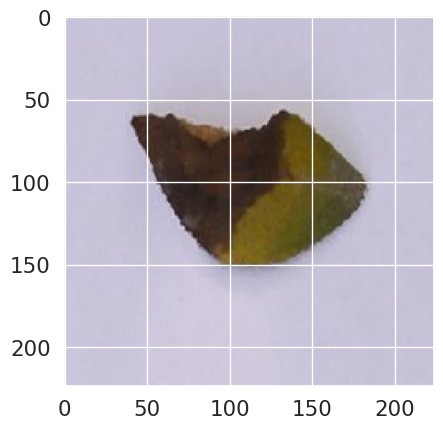

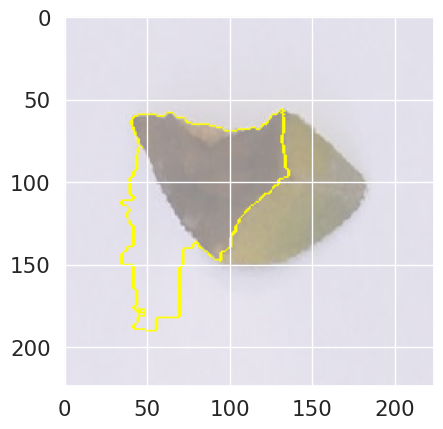

In [ ]:
import lime
from lime import lime_image
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np
from skimage.segmentation import mark_boundaries


# Load your CNN model
model = load_model(os.path.join(weights_path, 'New_Custom_cnn.h5'))

# img = image.load_img(os.path.join(temp_dir,os.listdir(temp_dir)[0]))

# Load an image for explanation
img_path = os.path.join(temp_dir,os.listdir(temp_dir)[31])  # Replace with the path to your image
img = image.load_img(img_path, target_size=(224, 224))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)

# Function to preprocess the input image for the model
def preprocess_input(img_array):
    img_array /= 255.
    # Add any additional preprocessing steps here
    return img_array

img_array = preprocess_input(img_array)

# Generate LIME explanation
explainer = lime_image.LimeImageExplainer()
explanation = explainer.explain_instance(img_array[0], model.predict, top_labels=5, hide_color=0, num_samples=1000)

# Display the original image and the LIME explanation
plt.imshow(img)
plt.show()

temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=True, num_features=5, hide_rest=False)
plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))
plt.show()

Lime Greening

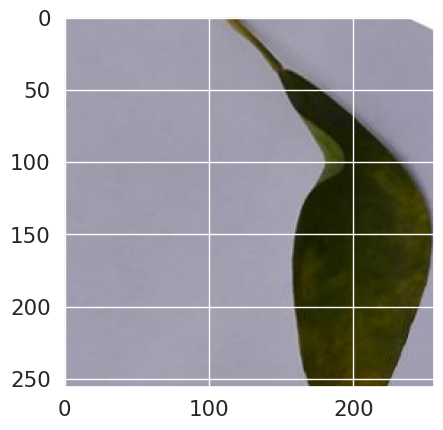

In [ ]:
temp_dir = os.path.join(root_path, 'split_aug', 'val', 'aug_greening')
img = image.load_img(os.path.join(temp_dir,os.listdir(temp_dir)[12]))
plt.imshow(img)

  0%|                                                                                                        | 0/1000 [00:00<?, ?it/s]

1/1 [==============================] - 0s 72ms/step


  1%|▉                                                                                              | 10/1000 [00:00<00:12, 78.49it/s]

1/1 [==============================] - 0s 25ms/step


  3%|██▊                                                                                           | 30/1000 [00:00<00:09, 102.37it/s]

1/1 [==============================] - 0s 23ms/step


  5%|████▋                                                                                         | 50/1000 [00:00<00:09, 103.28it/s]

1/1 [==============================] - 0s 25ms/step


  6%|█████▉                                                                                        | 63/1000 [00:00<00:08, 110.26it/s]

1/1 [==============================] - 0s 29ms/step


  8%|███████                                                                                       | 75/1000 [00:00<00:08, 108.44it/s]

1/1 [==============================] - 0s 24ms/step


  9%|████████                                                                                      | 86/1000 [00:00<00:08, 106.86it/s]

1/1 [==============================] - 0s 24ms/step


 10%|█████████                                                                                     | 97/1000 [00:00<00:08, 101.27it/s]

1/1 [==============================] - 0s 46ms/step


 11%|██████████▏                                                                                   | 108/1000 [00:01<00:09, 95.86it/s]

1/1 [==============================] - 0s 24ms/step


 12%|███████████                                                                                   | 118/1000 [00:01<00:09, 95.31it/s]

1/1 [==============================] - 0s 25ms/step


 13%|████████████                                                                                  | 128/1000 [00:01<00:10, 82.47it/s]

1/1 [==============================] - 0s 23ms/step


 14%|█████████████▏                                                                                | 140/1000 [00:01<00:10, 80.74it/s]

1/1 [==============================] - 0s 23ms/step


 16%|███████████████                                                                               | 160/1000 [00:01<00:08, 96.20it/s]

1/1 [==============================] - 0s 23ms/step


 18%|████████████████▋                                                                            | 180/1000 [00:01<00:07, 106.24it/s]

1/1 [==============================] - 0s 25ms/step


 19%|█████████████████▊                                                                           | 191/1000 [00:01<00:07, 106.31it/s]

1/1 [==============================] - 0s 26ms/step


 21%|███████████████████▌                                                                         | 210/1000 [00:02<00:07, 108.50it/s]

1/1 [==============================] - 0s 28ms/step


 22%|████████████████████▊                                                                        | 224/1000 [00:02<00:06, 115.53it/s]

1/1 [==============================] - 0s 25ms/step


 24%|██████████████████████▎                                                                      | 240/1000 [00:02<00:06, 110.47it/s]

1/1 [==============================] - 0s 24ms/step


 26%|████████████████████████▏                                                                    | 260/1000 [00:02<00:06, 115.45it/s]

1/1 [==============================] - 0s 25ms/step


 28%|█████████████████████████▊                                                                   | 278/1000 [00:02<00:05, 130.07it/s]

1/1 [==============================] - 0s 26ms/step


 29%|███████████████████████████▏                                                                 | 292/1000 [00:02<00:06, 108.19it/s]

1/1 [==============================] - 0s 25ms/step


 31%|████████████████████████████▋                                                                | 308/1000 [00:02<00:05, 119.35it/s]

1/1 [==============================] - 0s 24ms/step


 32%|█████████████████████████████▊                                                               | 321/1000 [00:03<00:06, 110.83it/s]

1/1 [==============================] - 0s 25ms/step


 34%|███████████████████████████████▌                                                             | 340/1000 [00:03<00:05, 113.80it/s]

1/1 [==============================] - 0s 24ms/step


 35%|████████████████████████████████▋                                                            | 352/1000 [00:03<00:05, 114.49it/s]

1/1 [==============================] - 0s 23ms/step


 36%|█████████████████████████████████▊                                                           | 364/1000 [00:03<00:05, 110.02it/s]

1/1 [==============================] - 0s 24ms/step


 38%|██████████████████████████████████▉                                                          | 376/1000 [00:03<00:05, 112.00it/s]

1/1 [==============================] - 0s 25ms/step


 39%|████████████████████████████████████▍                                                         | 388/1000 [00:09<01:31,  6.65it/s]

1/1 [==============================] - 0s 24ms/step


 40%|█████████████████████████████████████▌                                                        | 400/1000 [00:09<01:06,  9.00it/s]

1/1 [==============================] - 0s 23ms/step


 42%|███████████████████████████████████████▍                                                      | 420/1000 [00:10<00:40, 14.39it/s]

1/1 [==============================] - 0s 23ms/step


 44%|█████████████████████████████████████████▎                                                    | 440/1000 [00:10<00:26, 21.29it/s]

1/1 [==============================] - 0s 23ms/step


 46%|███████████████████████████████████████████▏                                                  | 460/1000 [00:10<00:18, 29.84it/s]

1/1 [==============================] - 0s 26ms/step


 48%|████████████████████████████████████████████▊                                                 | 477/1000 [00:10<00:13, 39.35it/s]

1/1 [==============================] - 0s 24ms/step


 49%|██████████████████████████████████████████████                                                | 490/1000 [00:10<00:11, 45.33it/s]

1/1 [==============================] - 0s 23ms/step


 51%|███████████████████████████████████████████████▉                                              | 510/1000 [00:10<00:08, 58.64it/s]

1/1 [==============================] - 0s 23ms/step


 53%|█████████████████████████████████████████████████▊                                            | 530/1000 [00:10<00:06, 71.91it/s]

1/1 [==============================] - 0s 23ms/step


 55%|███████████████████████████████████████████████████▋                                          | 550/1000 [00:11<00:05, 83.93it/s]

1/1 [==============================] - 0s 26ms/step


 56%|█████████████████████████████████████████████████████                                         | 565/1000 [00:11<00:04, 94.55it/s]

1/1 [==============================] - 0s 24ms/step


 58%|██████████████████████████████████████████████████████▌                                       | 580/1000 [00:11<00:04, 95.47it/s]

1/1 [==============================] - 0s 23ms/step


 60%|███████████████████████████████████████████████████████▊                                     | 600/1000 [00:11<00:03, 105.25it/s]

1/1 [==============================] - 0s 22ms/step


 62%|█████████████████████████████████████████████████████████▋                                   | 620/1000 [00:11<00:03, 112.61it/s]

1/1 [==============================] - 0s 24ms/step


 63%|███████████████████████████████████████████████████████████▌                                  | 633/1000 [00:13<00:12, 28.28it/s]

1/1 [==============================] - 0s 26ms/step


 65%|█████████████████████████████████████████████████████████████                                 | 650/1000 [00:13<00:09, 36.38it/s]

1/1 [==============================] - 0s 24ms/step


 67%|██████████████████████████████████████████████████████████████▉                               | 670/1000 [00:13<00:06, 47.87it/s]

1/1 [==============================] - 0s 23ms/step


 69%|████████████████████████████████████████████████████████████████▊                             | 690/1000 [00:13<00:05, 60.32it/s]

1/1 [==============================] - 0s 23ms/step


 71%|██████████████████████████████████████████████████████████████████▋                           | 710/1000 [00:13<00:03, 72.86it/s]

1/1 [==============================] - 0s 24ms/step


 73%|████████████████████████████████████████████████████████████████████▌                         | 730/1000 [00:14<00:03, 84.44it/s]

1/1 [==============================] - 0s 26ms/step


 75%|██████████████████████████████████████████████████████████████████████                        | 746/1000 [00:14<00:02, 96.39it/s]

1/1 [==============================] - 0s 23ms/step


 76%|███████████████████████████████████████████████████████████████████████▍                      | 760/1000 [00:14<00:02, 95.68it/s]

1/1 [==============================] - 0s 23ms/step


 78%|████████████████████████████████████████████████████████████████████████▌                    | 780/1000 [00:14<00:02, 105.19it/s]

1/1 [==============================] - 0s 23ms/step


 80%|██████████████████████████████████████████████████████████████████████████▍                  | 800/1000 [00:14<00:01, 112.00it/s]

1/1 [==============================] - 0s 27ms/step


 82%|████████████████████████████████████████████████████████████████████████████▎                | 820/1000 [00:14<00:01, 113.39it/s]

1/1 [==============================] - 0s 25ms/step


 84%|█████████████████████████████████████████████████████████████████████████████▋               | 836/1000 [00:14<00:01, 122.51it/s]

1/1 [==============================] - 0s 23ms/step


 85%|███████████████████████████████████████████████████████████████████████████████              | 850/1000 [00:14<00:01, 114.17it/s]

1/1 [==============================] - 0s 23ms/step


 87%|████████████████████████████████████████████████████████████████████████████████▉            | 870/1000 [00:15<00:01, 118.70it/s]

1/1 [==============================] - 0s 27ms/step


 89%|██████████████████████████████████████████████████████████████████████████████████▊          | 890/1000 [00:15<00:00, 119.43it/s]

1/1 [==============================] - 0s 25ms/step


 91%|████████████████████████████████████████████████████████████████████████████████████▋        | 910/1000 [00:15<00:00, 120.18it/s]

1/1 [==============================] - 0s 25ms/step


 92%|██████████████████████████████████████████████████████████████████████████████████████       | 925/1000 [00:15<00:00, 126.35it/s]

1/1 [==============================] - 0s 25ms/step


 94%|███████████████████████████████████████████████████████████████████████████████████████▍     | 940/1000 [00:15<00:00, 115.48it/s]

1/1 [==============================] - 0s 24ms/step


 96%|█████████████████████████████████████████████████████████████████████████████████████████▎   | 960/1000 [00:15<00:00, 116.99it/s]

1/1 [==============================] - 0s 25ms/step


 97%|██████████████████████████████████████████████████████████████████████████████████████████▍  | 972/1000 [00:16<00:00, 114.40it/s]

1/1 [==============================] - 0s 24ms/step


 99%|███████████████████████████████████████████████████████████████████████████████████████████▉ | 989/1000 [00:16<00:00, 127.16it/s]

1/1 [==============================] - 0s 24ms/step


100%|█████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:16<00:00, 61.39it/s]


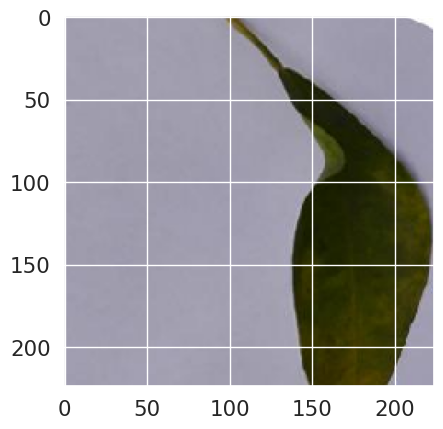

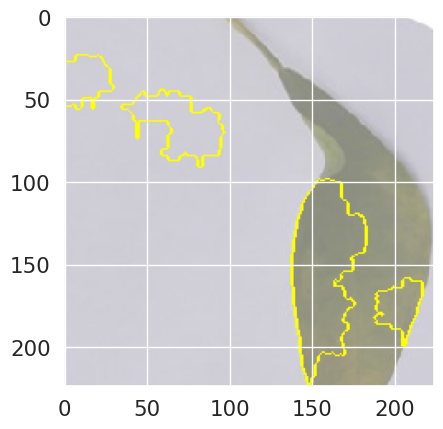

In [ ]:
import lime
from lime import lime_image
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np
from skimage.segmentation import mark_boundaries


# Load your CNN model
model = load_model(os.path.join(weights_path, 'New_Custom_cnn.h5'))

# img = image.load_img(os.path.join(temp_dir,os.listdir(temp_dir)[0]))

# Load an image for explanation
img_path = os.path.join(temp_dir,os.listdir(temp_dir)[12])  # Replace with the path to your image
img = image.load_img(img_path, target_size=(224, 224))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)

# Function to preprocess the input image for the model
def preprocess_input(img_array):
    img_array /= 255.
    # Add any additional preprocessing steps here
    return img_array

img_array = preprocess_input(img_array)

# Generate LIME explanation
explainer = lime_image.LimeImageExplainer()
explanation = explainer.explain_instance(img_array[0], model.predict, top_labels=5, hide_color=0, num_samples=1000)

# Display the original image and the LIME explanation
plt.imshow(img)
plt.show()

temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=True, num_features=5, hide_rest=False)
plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))
plt.show()

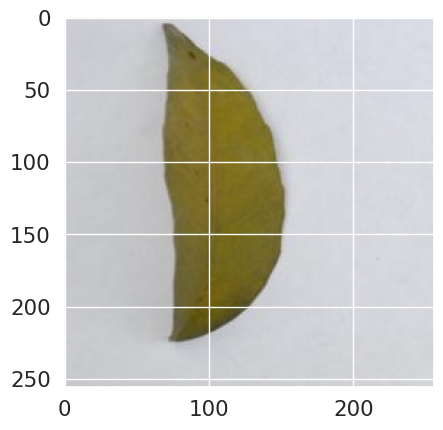

In [ ]:
temp_dir = os.path.join(root_path, 'split_aug', 'train', 'aug_greening')
img = image.load_img(os.path.join(temp_dir,os.listdir(temp_dir)[22]))
plt.imshow(img)

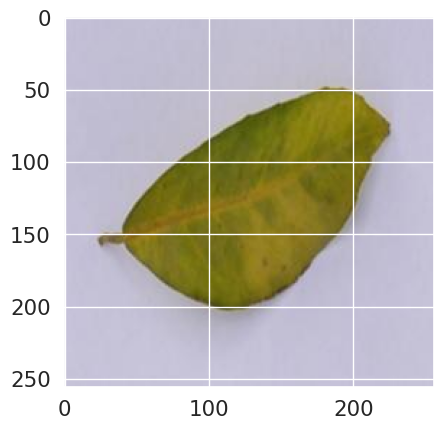

In [ ]:
temp_dir = os.path.join(root_path, 'split_aug', 'val', 'aug_greening')
img = image.load_img(os.path.join(temp_dir,os.listdir(temp_dir)[37]))
plt.imshow(img)

  0%|                                                                                          | 0/1000 [00:00<?, ?it/s]

1/1 [==============================] - 0s 74ms/step


  1%|▊                                                                                | 10/1000 [00:00<00:25, 38.23it/s]

1/1 [==============================] - 0s 25ms/step


  3%|██▍                                                                              | 30/1000 [00:00<00:12, 79.54it/s]

1/1 [==============================] - 0s 23ms/step


  5%|████                                                                             | 50/1000 [00:00<00:09, 99.81it/s]

1/1 [==============================] - 0s 24ms/step


  7%|█████▌                                                                          | 70/1000 [00:00<00:08, 111.11it/s]

1/1 [==============================] - 0s 24ms/step


  9%|███████▏                                                                        | 90/1000 [00:00<00:07, 117.03it/s]

1/1 [==============================] - 0s 37ms/step


 10%|████████▏                                                                      | 103/1000 [00:00<00:07, 119.61it/s]

1/1 [==============================] - 0s 23ms/step


 12%|█████████▍                                                                     | 120/1000 [00:01<00:07, 119.59it/s]

1/1 [==============================] - 0s 25ms/step


 14%|███████████                                                                    | 140/1000 [00:01<00:07, 120.12it/s]

1/1 [==============================] - 0s 24ms/step


 16%|████████████▋                                                                  | 160/1000 [00:01<00:06, 122.30it/s]

1/1 [==============================] - 0s 61ms/step


 17%|█████████████▋                                                                 | 173/1000 [00:01<00:07, 112.51it/s]

1/1 [==============================] - 0s 24ms/step


 19%|███████████████                                                                | 190/1000 [00:01<00:07, 112.21it/s]

1/1 [==============================] - 0s 22ms/step


 21%|████████████████▌                                                              | 210/1000 [00:01<00:06, 118.89it/s]

1/1 [==============================] - 0s 22ms/step


 23%|██████████████████▏                                                            | 230/1000 [00:02<00:06, 124.33it/s]

1/1 [==============================] - 0s 22ms/step


 25%|███████████████████▊                                                           | 250/1000 [00:02<00:05, 128.15it/s]

1/1 [==============================] - 0s 23ms/step


 27%|█████████████████████▎                                                         | 270/1000 [00:02<00:05, 129.38it/s]

1/1 [==============================] - 0s 23ms/step


 29%|██████████████████████▉                                                        | 290/1000 [00:02<00:05, 131.68it/s]

1/1 [==============================] - 0s 22ms/step


 31%|████████████████████████▍                                                      | 310/1000 [00:02<00:05, 132.65it/s]

1/1 [==============================] - 0s 23ms/step


 33%|██████████████████████████                                                     | 330/1000 [00:02<00:04, 134.12it/s]

1/1 [==============================] - 0s 23ms/step


 35%|███████████████████████████▋                                                   | 350/1000 [00:02<00:04, 134.59it/s]

1/1 [==============================] - 0s 26ms/step


 36%|█████████████████████████████                                                   | 364/1000 [00:03<00:06, 95.39it/s]

1/1 [==============================] - 0s 26ms/step


 38%|██████████████████████████████▍                                                 | 380/1000 [00:03<00:06, 98.18it/s]

1/1 [==============================] - 0s 27ms/step


 40%|███████████████████████████████▌                                               | 400/1000 [00:03<00:05, 105.54it/s]

1/1 [==============================] - 0s 26ms/step


 42%|█████████████████████████████████▏                                             | 420/1000 [00:03<00:05, 108.23it/s]

1/1 [==============================] - 0s 28ms/step


 43%|██████████████████████████████████▏                                            | 432/1000 [00:03<00:05, 107.29it/s]

1/1 [==============================] - 0s 29ms/step


 44%|███████████████████████████████████                                            | 444/1000 [00:03<00:05, 107.83it/s]

1/1 [==============================] - 0s 27ms/step


 46%|████████████████████████████████████                                           | 456/1000 [00:04<00:04, 110.59it/s]

1/1 [==============================] - 0s 28ms/step


 47%|████████████████████████████████████▉                                          | 468/1000 [00:04<00:04, 112.16it/s]

1/1 [==============================] - 0s 27ms/step


 48%|██████████████████████████████████████▍                                         | 480/1000 [00:04<00:05, 93.97it/s]

1/1 [==============================] - 0s 30ms/step


 49%|███████████████████████████████████████▏                                        | 490/1000 [00:04<00:05, 95.13it/s]

1/1 [==============================] - 0s 28ms/step


 50%|████████████████████████████████████████                                        | 500/1000 [00:04<00:05, 95.80it/s]

1/1 [==============================] - 0s 27ms/step


 51%|████████████████████████████████████████▌                                      | 513/1000 [00:04<00:04, 104.56it/s]

1/1 [==============================] - 0s 27ms/step


 52%|█████████████████████████████████████████▍                                     | 524/1000 [00:04<00:04, 105.56it/s]

1/1 [==============================] - 0s 27ms/step


 54%|██████████████████████████████████████████▎                                    | 535/1000 [00:04<00:04, 104.34it/s]

1/1 [==============================] - 0s 29ms/step


 55%|███████████████████████████████████████████▏                                   | 546/1000 [00:04<00:04, 105.38it/s]

1/1 [==============================] - 0s 29ms/step


 56%|████████████████████████████████████████████                                   | 557/1000 [00:05<00:04, 105.22it/s]

1/1 [==============================] - 0s 30ms/step


 57%|█████████████████████████████████████████████▌                                  | 570/1000 [00:05<00:04, 90.75it/s]

1/1 [==============================] - 0s 28ms/step


 58%|██████████████████████████████████████████████▍                                 | 580/1000 [00:05<00:04, 92.77it/s]

1/1 [==============================] - 0s 27ms/step


 59%|███████████████████████████████████████████████▎                                | 592/1000 [00:05<00:04, 99.66it/s]

1/1 [==============================] - 0s 27ms/step


 60%|███████████████████████████████████████████████▋                               | 604/1000 [00:05<00:03, 104.83it/s]

1/1 [==============================] - 0s 27ms/step


 62%|████████████████████████████████████████████████▋                              | 616/1000 [00:05<00:03, 108.69it/s]

1/1 [==============================] - 0s 28ms/step


 63%|█████████████████████████████████████████████████▌                             | 628/1000 [00:05<00:03, 107.26it/s]

1/1 [==============================] - 0s 28ms/step


 64%|██████████████████████████████████████████████████▍                            | 639/1000 [00:05<00:03, 106.61it/s]

1/1 [==============================] - 0s 29ms/step


 65%|████████████████████████████████████████████████████                            | 650/1000 [00:06<00:04, 86.50it/s]

1/1 [==============================] - 0s 26ms/step


 66%|████████████████████████████████████████████████████▊                           | 660/1000 [00:06<00:03, 89.59it/s]

1/1 [==============================] - 0s 26ms/step


 67%|█████████████████████████████████████████████████████▊                          | 672/1000 [00:06<00:03, 97.38it/s]

1/1 [==============================] - 0s 25ms/step


 68%|█████████████████████████████████████████████████████▉                         | 683/1000 [00:06<00:03, 100.30it/s]

1/1 [==============================] - 0s 26ms/step


 69%|██████████████████████████████████████████████████████▊                        | 694/1000 [00:06<00:02, 102.51it/s]

1/1 [==============================] - 0s 27ms/step


 70%|████████████████████████████████████████████████████████▍                       | 705/1000 [00:06<00:04, 70.05it/s]

1/1 [==============================] - 0s 26ms/step


 72%|█████████████████████████████████████████████████████████▌                      | 719/1000 [00:06<00:03, 84.65it/s]

1/1 [==============================] - 0s 26ms/step


 73%|██████████████████████████████████████████████████████████▍                     | 730/1000 [00:06<00:03, 77.02it/s]

1/1 [==============================] - 0s 25ms/step


 74%|███████████████████████████████████████████████████████████▍                    | 743/1000 [00:07<00:02, 88.63it/s]

1/1 [==============================] - 0s 28ms/step


 76%|███████████████████████████████████████████████████████████▊                   | 757/1000 [00:07<00:02, 100.67it/s]

1/1 [==============================] - 0s 26ms/step


 77%|█████████████████████████████████████████████████████████████▌                  | 770/1000 [00:07<00:02, 91.03it/s]

1/1 [==============================] - 0s 25ms/step


 78%|█████████████████████████████████████████████████████████████▉                 | 784/1000 [00:07<00:02, 102.36it/s]

1/1 [==============================] - 0s 28ms/step


 80%|██████████████████████████████████████████████████████████████▉                | 796/1000 [00:07<00:01, 104.37it/s]

1/1 [==============================] - 0s 26ms/step


 81%|███████████████████████████████████████████████████████████████▉               | 809/1000 [00:07<00:01, 110.53it/s]

1/1 [==============================] - 0s 25ms/step


 82%|█████████████████████████████████████████████████████████████████▋              | 821/1000 [00:07<00:01, 95.45it/s]

1/1 [==============================] - 0s 25ms/step


 84%|██████████████████████████████████████████████████████████████████             | 837/1000 [00:07<00:01, 110.91it/s]

1/1 [==============================] - 0s 25ms/step


 85%|████████████████████████████████████████████████████████████████████            | 850/1000 [00:08<00:01, 96.77it/s]

1/1 [==============================] - 0s 24ms/step


 86%|████████████████████████████████████████████████████████████████████▎          | 865/1000 [00:08<00:01, 109.27it/s]

1/1 [==============================] - 0s 24ms/step


 88%|█████████████████████████████████████████████████████████████████████▍         | 879/1000 [00:08<00:01, 116.95it/s]

1/1 [==============================] - 0s 25ms/step


 89%|███████████████████████████████████████████████████████████████████████▎        | 892/1000 [00:08<00:01, 98.93it/s]

1/1 [==============================] - 0s 25ms/step


 90%|███████████████████████████████████████████████████████████████████████▎       | 903/1000 [00:08<00:00, 101.01it/s]

1/1 [==============================] - 0s 25ms/step


 92%|████████████████████████████████████████████████████████████████████████▎      | 916/1000 [00:08<00:00, 107.88it/s]

1/1 [==============================] - 0s 24ms/step


 93%|█████████████████████████████████████████████████████████████████████████▎     | 928/1000 [00:08<00:00, 109.12it/s]

1/1 [==============================] - 0s 25ms/step


 94%|███████████████████████████████████████████████████████████████████████████▏    | 940/1000 [00:08<00:00, 91.98it/s]

1/1 [==============================] - 0s 24ms/step


 96%|███████████████████████████████████████████████████████████████████████████▌   | 956/1000 [00:09<00:00, 108.35it/s]

1/1 [==============================] - 0s 26ms/step


 97%|█████████████████████████████████████████████████████████████████████████████▌  | 970/1000 [00:09<00:00, 95.00it/s]

1/1 [==============================] - 0s 26ms/step


 98%|█████████████████████████████████████████████████████████████████████████████▌ | 982/1000 [00:09<00:00, 100.36it/s]

1/1 [==============================] - 0s 25ms/step


100%|██████████████████████████████████████████████████████████████████████████████▊| 997/1000 [00:09<00:00, 112.16it/s]

1/1 [==============================] - 0s 24ms/step


100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:09<00:00, 104.67it/s]


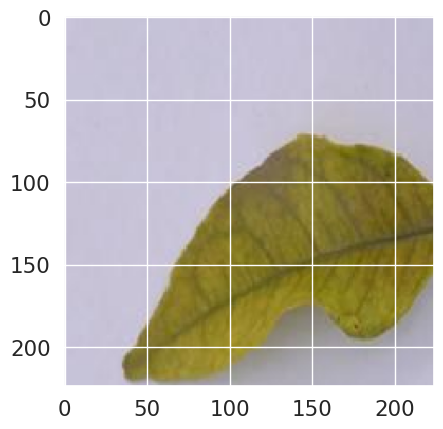

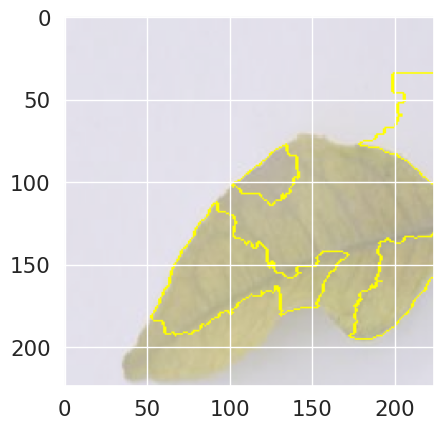

In [ ]:
import lime
from lime import lime_image
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np
from skimage.segmentation import mark_boundaries


# Load your CNN model
model = load_model(os.path.join(weights_path, 'New_Custom_cnn.h5'))

# img = image.load_img(os.path.join(temp_dir,os.listdir(temp_dir)[0]))

# Load an image for explanation
img_path = os.path.join(temp_dir,os.listdir(temp_dir)[29])  # Replace with the path to your image
img = image.load_img(img_path, target_size=(224, 224))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)

# Function to preprocess the input image for the model
def preprocess_input(img_array):
    img_array /= 255.
    # Add any additional preprocessing steps here
    return img_array

img_array = preprocess_input(img_array)

# Generate LIME explanation
explainer = lime_image.LimeImageExplainer()
explanation = explainer.explain_instance(img_array[0], model.predict, top_labels=5, hide_color=0, num_samples=1000)

# Display the original image and the LIME explanation
plt.imshow(img)
plt.show()

temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=True, num_features=5, hide_rest=False)
plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))
plt.show()

  0%|                                                                                                        | 0/1000 [00:00<?, ?it/s]

1/1 [==============================] - 0s 80ms/step


  1%|▉                                                                                              | 10/1000 [00:00<00:50, 19.55it/s]

1/1 [==============================] - 0s 25ms/step


  2%|██▍                                                                                            | 25/1000 [00:00<00:20, 48.01it/s]

1/1 [==============================] - 0s 25ms/step


  4%|███▎                                                                                           | 35/1000 [00:01<00:38, 24.75it/s]

1/1 [==============================] - 0s 64ms/step


  5%|████▊                                                                                          | 50/1000 [00:01<00:26, 35.19it/s]

1/1 [==============================] - 0s 27ms/step


  6%|█████▉                                                                                         | 62/1000 [00:01<00:20, 46.39it/s]

1/1 [==============================] - 0s 25ms/step


  8%|███████▍                                                                                       | 78/1000 [00:01<00:14, 64.49it/s]

1/1 [==============================] - 0s 26ms/step


  9%|████████▍                                                                                      | 89/1000 [00:01<00:13, 65.44it/s]

1/1 [==============================] - 0s 25ms/step


 10%|█████████▍                                                                                    | 100/1000 [00:02<00:15, 58.74it/s]

1/1 [==============================] - 0s 24ms/step


 11%|██████████▎                                                                                   | 110/1000 [00:02<00:17, 51.15it/s]

1/1 [==============================] - 0s 23ms/step


 12%|███████████▎                                                                                  | 120/1000 [00:02<00:18, 46.44it/s]

1/1 [==============================] - 0s 23ms/step


 13%|████████████▏                                                                                 | 130/1000 [00:02<00:18, 45.84it/s]

1/1 [==============================] - 0s 26ms/step


 14%|█████████████▏                                                                                | 140/1000 [00:03<00:18, 45.94it/s]

1/1 [==============================] - 0s 25ms/step


 15%|██████████████                                                                                | 150/1000 [00:03<00:16, 52.00it/s]

1/1 [==============================] - 0s 26ms/step


 16%|███████████████                                                                               | 160/1000 [00:04<00:32, 25.83it/s]

1/1 [==============================] - 0s 25ms/step


 17%|███████████████▉                                                                              | 170/1000 [00:04<00:36, 22.60it/s]

1/1 [==============================] - 0s 25ms/step


 18%|████████████████▉                                                                             | 180/1000 [00:04<00:33, 24.54it/s]

1/1 [==============================] - 0s 25ms/step


 19%|█████████████████▊                                                                            | 190/1000 [00:05<00:27, 29.42it/s]

1/1 [==============================] - 0s 24ms/step


 20%|██████████████████▊                                                                           | 200/1000 [00:05<00:24, 33.09it/s]

1/1 [==============================] - 0s 24ms/step


 21%|███████████████████▋                                                                          | 210/1000 [00:05<00:20, 38.25it/s]

1/1 [==============================] - 0s 25ms/step


 22%|████████████████████▋                                                                         | 220/1000 [00:05<00:17, 45.29it/s]

1/1 [==============================] - 0s 25ms/step


 23%|█████████████████████▌                                                                        | 230/1000 [00:05<00:18, 42.59it/s]

1/1 [==============================] - 0s 24ms/step


 24%|██████████████████████▌                                                                       | 240/1000 [00:06<00:18, 41.83it/s]

1/1 [==============================] - 0s 23ms/step


 25%|███████████████████████▌                                                                      | 250/1000 [00:06<00:17, 43.58it/s]

1/1 [==============================] - 0s 23ms/step


 26%|████████████████████████▍                                                                     | 260/1000 [00:06<00:14, 50.64it/s]

1/1 [==============================] - 0s 23ms/step


 27%|█████████████████████████▍                                                                    | 270/1000 [00:06<00:14, 50.60it/s]

1/1 [==============================] - 0s 24ms/step


 28%|██████████████████████████▎                                                                   | 280/1000 [00:06<00:12, 55.72it/s]

1/1 [==============================] - 0s 24ms/step


 29%|███████████████████████████▎                                                                  | 290/1000 [00:06<00:11, 61.88it/s]

1/1 [==============================] - 0s 25ms/step


 30%|████████████████████████████▏                                                                 | 300/1000 [00:07<00:16, 41.23it/s]

1/1 [==============================] - 0s 26ms/step


 31%|█████████████████████████████▏                                                                | 310/1000 [00:07<00:15, 45.65it/s]

1/1 [==============================] - 0s 24ms/step


 32%|██████████████████████████████                                                                | 320/1000 [00:07<00:14, 47.69it/s]

1/1 [==============================] - 0s 24ms/step


 33%|███████████████████████████████                                                               | 330/1000 [00:08<00:14, 44.75it/s]

1/1 [==============================] - 0s 23ms/step


 34%|███████████████████████████████▉                                                              | 340/1000 [00:08<00:13, 47.72it/s]

1/1 [==============================] - 0s 23ms/step


 35%|████████████████████████████████▉                                                             | 350/1000 [00:08<00:13, 47.18it/s]

1/1 [==============================] - 0s 23ms/step


 36%|█████████████████████████████████▊                                                            | 360/1000 [00:08<00:14, 45.06it/s]

1/1 [==============================] - 0s 23ms/step


 37%|██████████████████████████████████▊                                                           | 370/1000 [00:08<00:12, 49.17it/s]

1/1 [==============================] - 0s 24ms/step


 38%|███████████████████████████████████▋                                                          | 380/1000 [00:09<00:12, 48.65it/s]

1/1 [==============================] - 0s 24ms/step


 39%|████████████████████████████████████▋                                                         | 390/1000 [00:09<00:15, 39.24it/s]

1/1 [==============================] - 0s 26ms/step


 40%|█████████████████████████████████████▌                                                        | 400/1000 [00:09<00:13, 43.75it/s]

1/1 [==============================] - 0s 27ms/step


 41%|██████████████████████████████████████▌                                                       | 410/1000 [00:09<00:12, 45.61it/s]

1/1 [==============================] - 0s 26ms/step


 42%|███████████████████████████████████████▍                                                      | 420/1000 [00:10<00:21, 27.41it/s]

1/1 [==============================] - 0s 24ms/step


 43%|████████████████████████████████████████▍                                                     | 430/1000 [00:10<00:17, 33.35it/s]

1/1 [==============================] - 0s 25ms/step


 44%|█████████████████████████████████████████▎                                                    | 440/1000 [00:11<00:18, 30.16it/s]

1/1 [==============================] - 0s 25ms/step


 45%|██████████████████████████████████████████▎                                                   | 450/1000 [00:12<00:38, 14.29it/s]

1/1 [==============================] - 0s 24ms/step


 46%|███████████████████████████████████████████▏                                                  | 460/1000 [00:12<00:29, 18.61it/s]

1/1 [==============================] - 0s 25ms/step


 47%|████████████████████████████████████████████▏                                                 | 470/1000 [00:12<00:23, 22.75it/s]

1/1 [==============================] - 0s 25ms/step


 48%|█████████████████████████████████████████████                                                 | 480/1000 [00:13<00:21, 23.95it/s]

1/1 [==============================] - 0s 29ms/step


 49%|██████████████████████████████████████████████                                                | 490/1000 [00:13<00:18, 27.38it/s]

1/1 [==============================] - 0s 27ms/step


 50%|███████████████████████████████████████████████                                               | 500/1000 [00:13<00:15, 32.52it/s]

1/1 [==============================] - 0s 26ms/step


 51%|███████████████████████████████████████████████▉                                              | 510/1000 [00:13<00:12, 37.83it/s]

1/1 [==============================] - 0s 24ms/step


 52%|████████████████████████████████████████████████▉                                             | 520/1000 [00:14<00:10, 43.67it/s]

1/1 [==============================] - 0s 25ms/step


 53%|█████████████████████████████████████████████████▊                                            | 530/1000 [00:14<00:10, 45.12it/s]

1/1 [==============================] - 0s 24ms/step


 54%|██████████████████████████████████████████████████▊                                           | 540/1000 [00:14<00:10, 44.19it/s]

1/1 [==============================] - 0s 25ms/step


 55%|███████████████████████████████████████████████████▋                                          | 550/1000 [00:14<00:10, 44.11it/s]

1/1 [==============================] - 0s 25ms/step


 56%|████████████████████████████████████████████████████▋                                         | 560/1000 [00:14<00:09, 46.98it/s]

1/1 [==============================] - 0s 26ms/step


 57%|█████████████████████████████████████████████████████▌                                        | 570/1000 [00:15<00:11, 38.91it/s]

1/1 [==============================] - 0s 27ms/step


 58%|██████████████████████████████████████████████████████▌                                       | 580/1000 [00:15<00:09, 43.57it/s]

1/1 [==============================] - 0s 28ms/step


 59%|███████████████████████████████████████████████████████▍                                      | 590/1000 [00:15<00:09, 43.60it/s]

1/1 [==============================] - 0s 26ms/step


 60%|████████████████████████████████████████████████████████▍                                     | 600/1000 [00:15<00:08, 47.09it/s]

1/1 [==============================] - 0s 24ms/step


 61%|█████████████████████████████████████████████████████████▎                                    | 610/1000 [00:16<00:08, 47.25it/s]

1/1 [==============================] - 0s 24ms/step


 62%|██████████████████████████████████████████████████████████▎                                   | 620/1000 [00:17<00:25, 15.03it/s]

1/1 [==============================] - 0s 25ms/step


 63%|███████████████████████████████████████████████████████████▏                                  | 630/1000 [00:18<00:20, 18.16it/s]

1/1 [==============================] - 0s 27ms/step


 64%|████████████████████████████████████████████████████████████▏                                 | 640/1000 [00:18<00:16, 22.22it/s]

1/1 [==============================] - 0s 25ms/step


 65%|█████████████████████████████████████████████████████████████                                 | 650/1000 [00:18<00:12, 27.56it/s]

1/1 [==============================] - 0s 26ms/step


 66%|██████████████████████████████████████████████████████████████                                | 660/1000 [00:18<00:13, 25.84it/s]

1/1 [==============================] - 0s 28ms/step


 67%|██████████████████████████████████████████████████████████████▉                               | 670/1000 [00:19<00:10, 30.81it/s]

1/1 [==============================] - 0s 26ms/step


 68%|███████████████████████████████████████████████████████████████▉                              | 680/1000 [00:19<00:09, 34.96it/s]

1/1 [==============================] - 0s 26ms/step


 69%|████████████████████████████████████████████████████████████████▊                             | 690/1000 [00:22<00:36,  8.61it/s]

1/1 [==============================] - 0s 25ms/step


 70%|█████████████████████████████████████████████████████████████████▊                            | 700/1000 [00:22<00:26, 11.43it/s]

1/1 [==============================] - 0s 25ms/step


 71%|██████████████████████████████████████████████████████████████████▋                           | 710/1000 [00:22<00:19, 14.78it/s]

1/1 [==============================] - 0s 24ms/step


 72%|███████████████████████████████████████████████████████████████████▋                          | 720/1000 [00:23<00:14, 19.18it/s]

1/1 [==============================] - 0s 26ms/step


 73%|████████████████████████████████████████████████████████████████████▌                         | 730/1000 [00:23<00:11, 23.49it/s]

1/1 [==============================] - 0s 25ms/step


 74%|█████████████████████████████████████████████████████████████████████▌                        | 740/1000 [00:23<00:09, 26.67it/s]

1/1 [==============================] - 0s 25ms/step


 75%|██████████████████████████████████████████████████████████████████████▌                       | 750/1000 [00:23<00:07, 31.48it/s]

1/1 [==============================] - 0s 27ms/step


 76%|███████████████████████████████████████████████████████████████████████▍                      | 760/1000 [00:23<00:06, 36.74it/s]

1/1 [==============================] - 0s 26ms/step


 77%|████████████████████████████████████████████████████████████████████████▍                     | 770/1000 [00:24<00:06, 34.90it/s]

1/1 [==============================] - 0s 25ms/step


 78%|█████████████████████████████████████████████████████████████████████████▎                    | 780/1000 [00:24<00:05, 37.10it/s]

1/1 [==============================] - 0s 24ms/step


 79%|██████████████████████████████████████████████████████████████████████████▎                   | 790/1000 [00:27<00:23,  8.96it/s]

1/1 [==============================] - 0s 25ms/step


 80%|███████████████████████████████████████████████████████████████████████████▏                  | 800/1000 [00:27<00:16, 11.77it/s]

1/1 [==============================] - 0s 24ms/step


 81%|████████████████████████████████████████████████████████████████████████████▏                 | 810/1000 [00:28<00:13, 14.37it/s]

1/1 [==============================] - 0s 24ms/step


 82%|█████████████████████████████████████████████████████████████████████████████                 | 820/1000 [00:29<00:16, 11.11it/s]

1/1 [==============================] - 0s 25ms/step


 83%|██████████████████████████████████████████████████████████████████████████████                | 830/1000 [00:29<00:11, 14.27it/s]

1/1 [==============================] - 0s 24ms/step


 84%|██████████████████████████████████████████████████████████████████████████████▉               | 840/1000 [00:29<00:08, 18.30it/s]

1/1 [==============================] - 0s 27ms/step


 85%|███████████████████████████████████████████████████████████████████████████████▉              | 850/1000 [00:30<00:06, 22.17it/s]

1/1 [==============================] - 0s 25ms/step


 86%|████████████████████████████████████████████████████████████████████████████████▊             | 860/1000 [00:30<00:05, 26.18it/s]

1/1 [==============================] - 0s 25ms/step


 87%|█████████████████████████████████████████████████████████████████████████████████▊            | 870/1000 [00:42<00:51,  2.55it/s]

1/1 [==============================] - 0s 24ms/step


 88%|██████████████████████████████████████████████████████████████████████████████████▋           | 880/1000 [00:42<00:33,  3.53it/s]

1/1 [==============================] - 0s 24ms/step


 89%|███████████████████████████████████████████████████████████████████████████████████▋          | 890/1000 [00:42<00:22,  4.86it/s]

1/1 [==============================] - 0s 24ms/step


 90%|████████████████████████████████████████████████████████████████████████████████████▌         | 900/1000 [00:43<00:14,  6.72it/s]

1/1 [==============================] - 0s 24ms/step


 91%|█████████████████████████████████████████████████████████████████████████████████████▌        | 910/1000 [00:43<00:10,  8.90it/s]

1/1 [==============================] - 0s 25ms/step


 92%|██████████████████████████████████████████████████████████████████████████████████████▍       | 920/1000 [00:43<00:06, 11.72it/s]

1/1 [==============================] - 0s 25ms/step


 93%|███████████████████████████████████████████████████████████████████████████████████████▍      | 930/1000 [00:44<00:05, 13.39it/s]

1/1 [==============================] - 0s 27ms/step


 94%|████████████████████████████████████████████████████████████████████████████████████████▎     | 940/1000 [00:44<00:03, 16.67it/s]

1/1 [==============================] - 0s 29ms/step


 95%|█████████████████████████████████████████████████████████████████████████████████████████▎    | 950/1000 [00:44<00:02, 20.45it/s]

1/1 [==============================] - 0s 24ms/step


 96%|██████████████████████████████████████████████████████████████████████████████████████████▏   | 960/1000 [00:47<00:04,  8.38it/s]

1/1 [==============================] - 0s 24ms/step


 97%|███████████████████████████████████████████████████████████████████████████████████████████▏  | 970/1000 [00:47<00:02, 10.98it/s]

1/1 [==============================] - 0s 24ms/step


 98%|████████████████████████████████████████████████████████████████████████████████████████████  | 980/1000 [00:54<00:05,  3.88it/s]

1/1 [==============================] - 0s 24ms/step


 99%|█████████████████████████████████████████████████████████████████████████████████████████████ | 990/1000 [00:54<00:01,  5.33it/s]

1/1 [==============================] - 0s 24ms/step


100%|█████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [01:01<00:00, 16.23it/s]


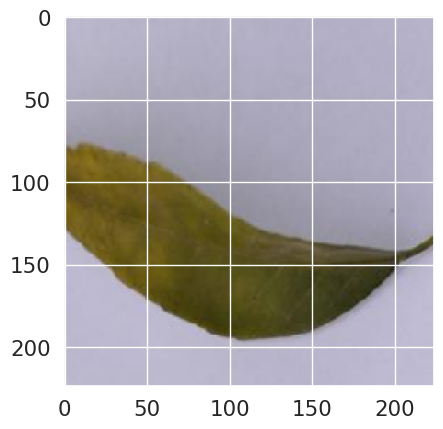

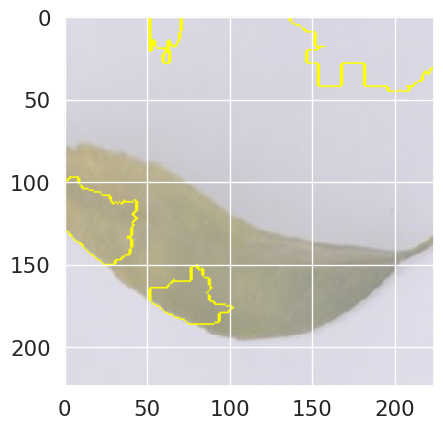

In [ ]:
import lime
from lime import lime_image
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np
from skimage.segmentation import mark_boundaries


# Load your CNN model
model = load_model(os.path.join(weights_path, 'New_Custom_cnn.h5'))

# img = image.load_img(os.path.join(temp_dir,os.listdir(temp_dir)[0]))

# Load an image for explanation
img_path = os.path.join(temp_dir,os.listdir(temp_dir)[31])  # Replace with the path to your image
img = image.load_img(img_path, target_size=(224, 224))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)

# Function to preprocess the input image for the model
def preprocess_input(img_array):
    img_array /= 255.
    # Add any additional preprocessing steps here
    return img_array

img_array = preprocess_input(img_array)

# Generate LIME explanation
explainer = lime_image.LimeImageExplainer()
explanation = explainer.explain_instance(img_array[0], model.predict, top_labels=5, hide_color=0, num_samples=1000)

# Display the original image and the LIME explanation
plt.imshow(img)
plt.show()

temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=True, num_features=5, hide_rest=False)
plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))
plt.show()

Lime Healthy Leaves

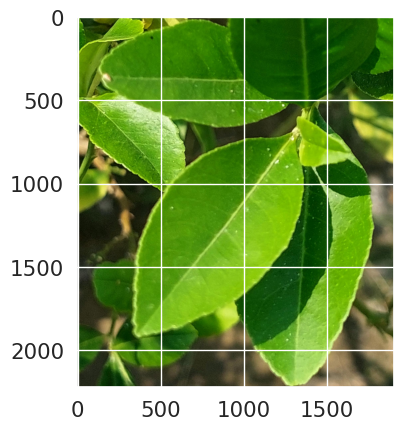

In [ ]:
temp_dir = os.path.join(root_path, 'split_aug', 'val', 'aug_new_healthy_citrus')
img = image.load_img(os.path.join(temp_dir,os.listdir(temp_dir)[12]))
plt.imshow(img)

  0%|                                                                                                        | 0/1000 [00:00<?, ?it/s]

1/1 [==============================] - 0s 75ms/step


  1%|▉                                                                                              | 10/1000 [00:00<00:33, 29.62it/s]

1/1 [==============================] - 0s 25ms/step


  2%|█▉                                                                                             | 20/1000 [00:01<01:25, 11.52it/s]

1/1 [==============================] - 0s 25ms/step


  3%|██▊                                                                                            | 30/1000 [00:01<00:50, 19.25it/s]

1/1 [==============================] - 0s 25ms/step


  4%|███▊                                                                                           | 40/1000 [00:04<02:31,  6.34it/s]

1/1 [==============================] - 0s 27ms/step


  5%|████▊                                                                                          | 50/1000 [00:05<01:46,  8.95it/s]

1/1 [==============================] - 0s 26ms/step


  6%|█████▋                                                                                         | 60/1000 [00:05<01:12, 12.96it/s]

1/1 [==============================] - 0s 24ms/step


  7%|██████▋                                                                                        | 70/1000 [00:05<00:52, 17.80it/s]

1/1 [==============================] - 0s 26ms/step


  8%|███████▌                                                                                       | 80/1000 [00:05<00:38, 23.83it/s]

1/1 [==============================] - 0s 25ms/step


  9%|████████▌                                                                                      | 90/1000 [00:05<00:29, 30.69it/s]

1/1 [==============================] - 0s 24ms/step


 10%|█████████▍                                                                                    | 100/1000 [00:05<00:23, 38.89it/s]

1/1 [==============================] - 0s 24ms/step


 11%|██████████▍                                                                                   | 111/1000 [00:05<00:18, 49.24it/s]

1/1 [==============================] - 0s 24ms/step


 12%|███████████▎                                                                                  | 121/1000 [00:05<00:15, 57.89it/s]

1/1 [==============================] - 0s 26ms/step


 13%|████████████▎                                                                                 | 131/1000 [00:06<00:13, 65.42it/s]

1/1 [==============================] - 0s 24ms/step


 14%|█████████████▎                                                                                | 141/1000 [00:06<00:13, 65.60it/s]

1/1 [==============================] - 0s 27ms/step


 15%|██████████████                                                                                | 150/1000 [00:06<00:17, 47.86it/s]

1/1 [==============================] - 0s 26ms/step


 16%|███████████████                                                                               | 160/1000 [00:06<00:14, 56.52it/s]

1/1 [==============================] - 0s 27ms/step


 17%|███████████████▉                                                                              | 170/1000 [00:06<00:13, 59.79it/s]

1/1 [==============================] - 0s 26ms/step


 18%|████████████████▉                                                                             | 180/1000 [00:06<00:12, 66.62it/s]

1/1 [==============================] - 0s 26ms/step


 19%|█████████████████▊                                                                            | 190/1000 [00:07<00:16, 50.41it/s]

1/1 [==============================] - 0s 23ms/step


 20%|██████████████████▊                                                                           | 200/1000 [00:07<00:13, 59.20it/s]

1/1 [==============================] - 0s 24ms/step


 21%|███████████████████▋                                                                          | 210/1000 [00:07<00:11, 67.47it/s]

1/1 [==============================] - 0s 24ms/step


 22%|████████████████████▊                                                                         | 221/1000 [00:07<00:10, 76.68it/s]

1/1 [==============================] - 0s 25ms/step


 23%|█████████████████████▋                                                                        | 231/1000 [00:07<00:10, 72.34it/s]

1/1 [==============================] - 0s 25ms/step


 24%|██████████████████████▌                                                                       | 240/1000 [00:07<00:12, 62.87it/s]

1/1 [==============================] - 0s 25ms/step


 25%|███████████████████████▌                                                                      | 251/1000 [00:07<00:10, 72.91it/s]

1/1 [==============================] - 0s 26ms/step


 26%|████████████████████████▍                                                                     | 260/1000 [00:08<00:27, 26.63it/s]

1/1 [==============================] - 0s 24ms/step


 27%|█████████████████████████▍                                                                    | 270/1000 [00:08<00:21, 33.94it/s]

1/1 [==============================] - 0s 29ms/step


 28%|██████████████████████████▎                                                                   | 280/1000 [00:09<00:23, 31.29it/s]

1/1 [==============================] - 0s 24ms/step


 29%|███████████████████████████▎                                                                  | 290/1000 [00:09<00:20, 35.10it/s]

1/1 [==============================] - 0s 24ms/step


 30%|████████████████████████████▏                                                                 | 300/1000 [00:09<00:18, 38.79it/s]

1/1 [==============================] - 0s 24ms/step


 31%|█████████████████████████████▏                                                                | 310/1000 [00:09<00:14, 47.20it/s]

1/1 [==============================] - 0s 23ms/step


 32%|██████████████████████████████                                                                | 320/1000 [00:10<00:17, 39.66it/s]

1/1 [==============================] - 0s 26ms/step


 33%|███████████████████████████████                                                               | 330/1000 [00:10<00:24, 27.38it/s]

1/1 [==============================] - 0s 24ms/step


 35%|████████████████████████████████▌                                                             | 347/1000 [00:10<00:15, 42.35it/s]

1/1 [==============================] - 0s 25ms/step


 36%|█████████████████████████████████▍                                                            | 356/1000 [00:11<00:14, 44.16it/s]

1/1 [==============================] - 0s 24ms/step


 36%|██████████████████████████████████▏                                                           | 364/1000 [00:11<00:13, 48.72it/s]

1/1 [==============================] - 0s 25ms/step


 37%|███████████████████████████████████                                                           | 373/1000 [00:11<00:11, 55.64it/s]

1/1 [==============================] - 0s 24ms/step


 38%|████████████████████████████████████                                                          | 384/1000 [00:11<00:09, 65.98it/s]

1/1 [==============================] - 0s 25ms/step


 40%|█████████████████████████████████████▏                                                        | 396/1000 [00:11<00:07, 77.60it/s]

1/1 [==============================] - 0s 23ms/step


 41%|██████████████████████████████████████▏                                                       | 406/1000 [00:11<00:12, 45.79it/s]

1/1 [==============================] - 0s 24ms/step


 41%|██████████████████████████████████████▉                                                       | 414/1000 [00:12<00:11, 50.92it/s]

1/1 [==============================] - 0s 24ms/step


 42%|███████████████████████████████████████▋                                                      | 422/1000 [00:12<00:12, 47.81it/s]

1/1 [==============================] - 0s 24ms/step


 43%|████████████████████████████████████████▍                                                     | 430/1000 [00:12<00:12, 45.10it/s]

1/1 [==============================] - 0s 25ms/step


 44%|█████████████████████████████████████████▎                                                    | 440/1000 [00:13<00:20, 27.33it/s]

1/1 [==============================] - 0s 25ms/step


 45%|██████████████████████████████████████████▎                                                   | 450/1000 [00:13<00:16, 32.82it/s]

1/1 [==============================] - 0s 24ms/step


 46%|███████████████████████████████████████████▏                                                  | 460/1000 [00:13<00:13, 41.18it/s]

1/1 [==============================] - 0s 25ms/step


 47%|████████████████████████████████████████████▏                                                 | 470/1000 [00:14<00:26, 19.78it/s]

1/1 [==============================] - 0s 23ms/step


 48%|█████████████████████████████████████████████                                                 | 480/1000 [00:14<00:19, 26.20it/s]

1/1 [==============================] - 0s 24ms/step


 49%|██████████████████████████████████████████████▏                                               | 491/1000 [00:14<00:14, 34.76it/s]

1/1 [==============================] - 0s 23ms/step


 50%|███████████████████████████████████████████████                                               | 500/1000 [00:14<00:13, 37.50it/s]

1/1 [==============================] - 0s 25ms/step


 51%|███████████████████████████████████████████████▉                                              | 510/1000 [00:15<00:11, 44.18it/s]

1/1 [==============================] - 0s 25ms/step


 52%|████████████████████████████████████████████████▉                                             | 520/1000 [00:15<00:09, 51.34it/s]

1/1 [==============================] - 0s 25ms/step


 53%|█████████████████████████████████████████████████▊                                            | 530/1000 [00:15<00:10, 44.54it/s]

1/1 [==============================] - 0s 25ms/step


 54%|██████████████████████████████████████████████████▊                                           | 540/1000 [00:15<00:09, 47.08it/s]

1/1 [==============================] - 0s 25ms/step


 55%|███████████████████████████████████████████████████▋                                          | 550/1000 [00:15<00:08, 52.84it/s]

1/1 [==============================] - 0s 23ms/step


 56%|████████████████████████████████████████████████████▋                                         | 560/1000 [00:16<00:13, 32.06it/s]

1/1 [==============================] - 0s 23ms/step


 57%|█████████████████████████████████████████████████████▌                                        | 570/1000 [00:16<00:16, 26.03it/s]

1/1 [==============================] - 0s 23ms/step


 58%|██████████████████████████████████████████████████████▌                                       | 580/1000 [00:17<00:16, 25.60it/s]

1/1 [==============================] - 0s 24ms/step


 59%|███████████████████████████████████████████████████████▍                                      | 590/1000 [00:17<00:13, 31.11it/s]

1/1 [==============================] - 0s 27ms/step


 60%|████████████████████████████████████████████████████████▍                                     | 600/1000 [00:17<00:12, 31.72it/s]

1/1 [==============================] - 0s 25ms/step


 61%|█████████████████████████████████████████████████████████▎                                    | 610/1000 [00:17<00:10, 37.38it/s]

1/1 [==============================] - 0s 26ms/step


 62%|██████████████████████████████████████████████████████████▎                                   | 620/1000 [00:18<00:08, 44.28it/s]

1/1 [==============================] - 0s 25ms/step


 63%|███████████████████████████████████████████████████████████▏                                  | 630/1000 [00:18<00:07, 48.72it/s]

1/1 [==============================] - 0s 23ms/step


 64%|████████████████████████████████████████████████████████████▏                                 | 640/1000 [00:18<00:06, 54.83it/s]

1/1 [==============================] - 0s 24ms/step


 65%|█████████████████████████████████████████████████████████████                                 | 650/1000 [00:18<00:05, 61.68it/s]

1/1 [==============================] - 0s 23ms/step


 66%|██████████████████████████████████████████████████████████████                                | 660/1000 [00:18<00:05, 67.34it/s]

1/1 [==============================] - 0s 24ms/step


 67%|██████████████████████████████████████████████████████████████▉                               | 670/1000 [00:18<00:06, 54.70it/s]

1/1 [==============================] - 0s 24ms/step


 68%|███████████████████████████████████████████████████████████████▉                              | 680/1000 [00:19<00:05, 56.82it/s]

1/1 [==============================] - 0s 24ms/step


 69%|████████████████████████████████████████████████████████████████▊                             | 690/1000 [00:19<00:05, 55.08it/s]

1/1 [==============================] - 0s 25ms/step


 70%|█████████████████████████████████████████████████████████████████▊                            | 700/1000 [00:19<00:05, 59.65it/s]

1/1 [==============================] - 0s 25ms/step


 71%|██████████████████████████████████████████████████████████████████▋                           | 710/1000 [00:19<00:05, 53.09it/s]

1/1 [==============================] - 0s 24ms/step


 72%|███████████████████████████████████████████████████████████████████▋                          | 720/1000 [00:19<00:05, 50.96it/s]

1/1 [==============================] - 0s 23ms/step


 73%|████████████████████████████████████████████████████████████████████▌                         | 730/1000 [00:19<00:04, 58.21it/s]

1/1 [==============================] - 0s 23ms/step


 74%|█████████████████████████████████████████████████████████████████████▌                        | 740/1000 [00:20<00:04, 62.07it/s]

1/1 [==============================] - 0s 23ms/step


 75%|██████████████████████████████████████████████████████████████████████▌                       | 750/1000 [00:20<00:03, 66.64it/s]

1/1 [==============================] - 0s 23ms/step


 76%|███████████████████████████████████████████████████████████████████████▍                      | 760/1000 [00:20<00:03, 65.27it/s]

1/1 [==============================] - 0s 23ms/step


 77%|████████████████████████████████████████████████████████████████████████▍                     | 770/1000 [00:20<00:03, 69.05it/s]

1/1 [==============================] - 0s 24ms/step


 78%|█████████████████████████████████████████████████████████████████████████▎                    | 780/1000 [00:20<00:03, 66.97it/s]

1/1 [==============================] - 0s 27ms/step


 79%|██████████████████████████████████████████████████████████████████████████▎                   | 790/1000 [00:21<00:04, 43.54it/s]

1/1 [==============================] - 0s 27ms/step


 80%|███████████████████████████████████████████████████████████████████████████▏                  | 800/1000 [00:21<00:04, 48.19it/s]

1/1 [==============================] - 0s 25ms/step


 81%|████████████████████████████████████████████████████████████████████████████▏                 | 810/1000 [00:21<00:04, 45.50it/s]

1/1 [==============================] - 0s 24ms/step


 82%|█████████████████████████████████████████████████████████████████████████████                 | 820/1000 [00:21<00:04, 39.20it/s]

1/1 [==============================] - 0s 24ms/step


 83%|██████████████████████████████████████████████████████████████████████████████                | 830/1000 [00:21<00:03, 42.96it/s]

1/1 [==============================] - 0s 24ms/step


 84%|██████████████████████████████████████████████████████████████████████████████▉               | 840/1000 [00:22<00:03, 47.80it/s]

1/1 [==============================] - 0s 24ms/step


 85%|███████████████████████████████████████████████████████████████████████████████▉              | 850/1000 [00:22<00:02, 51.60it/s]

1/1 [==============================] - 0s 24ms/step


 86%|████████████████████████████████████████████████████████████████████████████████▊             | 860/1000 [00:22<00:03, 44.10it/s]

1/1 [==============================] - 0s 24ms/step


 87%|█████████████████████████████████████████████████████████████████████████████████▊            | 870/1000 [00:23<00:04, 31.23it/s]

1/1 [==============================] - 0s 27ms/step


 88%|██████████████████████████████████████████████████████████████████████████████████▋           | 880/1000 [00:23<00:03, 36.27it/s]

1/1 [==============================] - 0s 25ms/step


 89%|███████████████████████████████████████████████████████████████████████████████████▋          | 890/1000 [00:23<00:03, 35.06it/s]

1/1 [==============================] - 0s 25ms/step


 90%|████████████████████████████████████████████████████████████████████████████████████▌         | 900/1000 [00:23<00:03, 32.72it/s]

1/1 [==============================] - 0s 24ms/step


 91%|█████████████████████████████████████████████████████████████████████████████████████▌        | 910/1000 [00:24<00:02, 31.99it/s]

1/1 [==============================] - 0s 23ms/step


 92%|██████████████████████████████████████████████████████████████████████████████████████▍       | 920/1000 [00:24<00:02, 36.20it/s]

1/1 [==============================] - 0s 32ms/step


 93%|███████████████████████████████████████████████████████████████████████████████████████▍      | 930/1000 [00:24<00:01, 39.94it/s]

1/1 [==============================] - 0s 26ms/step


 94%|████████████████████████████████████████████████████████████████████████████████████████▎     | 940/1000 [00:24<00:01, 44.82it/s]

1/1 [==============================] - 0s 23ms/step


 95%|█████████████████████████████████████████████████████████████████████████████████████████▎    | 950/1000 [00:24<00:01, 49.66it/s]

1/1 [==============================] - 0s 26ms/step


 96%|██████████████████████████████████████████████████████████████████████████████████████████▏   | 960/1000 [00:25<00:00, 43.58it/s]

1/1 [==============================] - 0s 25ms/step


 97%|███████████████████████████████████████████████████████████████████████████████████████████▏  | 970/1000 [00:25<00:00, 45.59it/s]

1/1 [==============================] - 0s 25ms/step


 98%|████████████████████████████████████████████████████████████████████████████████████████████  | 980/1000 [00:25<00:00, 45.83it/s]

1/1 [==============================] - 0s 24ms/step


 99%|█████████████████████████████████████████████████████████████████████████████████████████████ | 990/1000 [00:25<00:00, 44.28it/s]

1/1 [==============================] - 0s 23ms/step


100%|█████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:26<00:00, 38.38it/s]


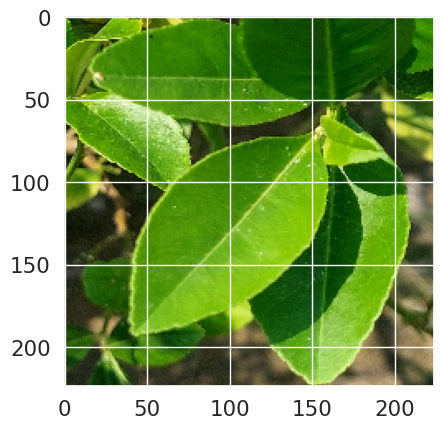

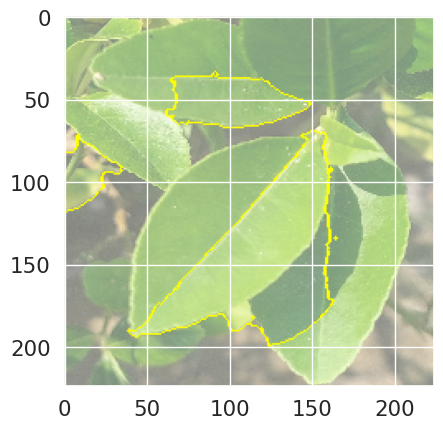

In [ ]:
import lime
from lime import lime_image
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np
from skimage.segmentation import mark_boundaries


# Load your CNN model
model = load_model(os.path.join(weights_path, 'New_Custom_cnn.h5'))

# img = image.load_img(os.path.join(temp_dir,os.listdir(temp_dir)[0]))

# Load an image for explanation
img_path = os.path.join(temp_dir,os.listdir(temp_dir)[12])  # Replace with the path to your image
img = image.load_img(img_path, target_size=(224, 224))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)

# Function to preprocess the input image for the model
def preprocess_input(img_array):
    img_array /= 255.
    # Add any additional preprocessing steps here
    return img_array

img_array = preprocess_input(img_array)

# Generate LIME explanation
explainer = lime_image.LimeImageExplainer()
explanation = explainer.explain_instance(img_array[0], model.predict, top_labels=5, hide_color=0, num_samples=1000)

# Display the original image and the LIME explanation
plt.imshow(img)
plt.show()

temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=True, num_features=5, hide_rest=False)
plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))
plt.show()

  0%|                                                                                                        | 0/1000 [00:00<?, ?it/s]

1/1 [==============================] - 0s 75ms/step


  1%|▉                                                                                              | 10/1000 [00:00<00:15, 63.24it/s]

1/1 [==============================] - 0s 27ms/step


  2%|█▉                                                                                             | 20/1000 [00:00<00:13, 71.15it/s]

1/1 [==============================] - 0s 26ms/step


  3%|██▊                                                                                            | 30/1000 [00:00<00:12, 79.60it/s]

1/1 [==============================] - 0s 25ms/step


  4%|███▊                                                                                           | 40/1000 [00:00<00:11, 86.49it/s]

1/1 [==============================] - 0s 24ms/step


  5%|█████                                                                                         | 54/1000 [00:00<00:09, 103.77it/s]

1/1 [==============================] - 0s 24ms/step


  6%|██████                                                                                        | 65/1000 [00:00<00:08, 105.44it/s]

1/1 [==============================] - 0s 24ms/step


  8%|███████▏                                                                                      | 76/1000 [00:00<00:08, 106.12it/s]

1/1 [==============================] - 0s 24ms/step


  9%|████████▏                                                                                     | 87/1000 [00:00<00:08, 106.91it/s]

1/1 [==============================] - 0s 31ms/step


 10%|█████████▎                                                                                     | 98/1000 [00:01<00:09, 99.30it/s]

1/1 [==============================] - 0s 25ms/step


 11%|██████████▏                                                                                  | 109/1000 [00:01<00:08, 100.90it/s]

1/1 [==============================] - 0s 25ms/step


 12%|███████████▎                                                                                  | 120/1000 [00:01<00:11, 74.07it/s]

1/1 [==============================] - 0s 24ms/step


 13%|████████████▏                                                                                 | 130/1000 [00:01<00:11, 77.61it/s]

1/1 [==============================] - 0s 24ms/step


 14%|█████████████▏                                                                                | 140/1000 [00:01<00:10, 82.69it/s]

1/1 [==============================] - 0s 24ms/step


 15%|██████████████                                                                                | 150/1000 [00:01<00:09, 87.04it/s]

1/1 [==============================] - 0s 24ms/step


 16%|███████████████                                                                               | 160/1000 [00:01<00:09, 90.29it/s]

1/1 [==============================] - 0s 23ms/step


 17%|████████████████                                                                              | 171/1000 [00:01<00:08, 95.13it/s]

1/1 [==============================] - 0s 25ms/step


 18%|█████████████████                                                                             | 181/1000 [00:01<00:08, 94.35it/s]

1/1 [==============================] - 0s 25ms/step


 19%|█████████████████▉                                                                            | 191/1000 [00:02<00:08, 95.07it/s]

1/1 [==============================] - 0s 26ms/step


 20%|██████████████████▉                                                                           | 201/1000 [00:02<00:09, 87.02it/s]

1/1 [==============================] - 0s 26ms/step


 21%|███████████████████▋                                                                          | 210/1000 [00:02<00:09, 84.74it/s]

1/1 [==============================] - 0s 25ms/step


 22%|████████████████████▋                                                                         | 220/1000 [00:02<00:09, 86.62it/s]

1/1 [==============================] - 0s 29ms/step


 23%|█████████████████████▌                                                                        | 230/1000 [00:02<00:08, 88.01it/s]

1/1 [==============================] - 0s 30ms/step


 24%|██████████████████████▌                                                                       | 240/1000 [00:02<00:08, 88.28it/s]

1/1 [==============================] - 0s 28ms/step


 25%|███████████████████████▌                                                                      | 250/1000 [00:02<00:08, 90.57it/s]

1/1 [==============================] - 0s 25ms/step


 26%|████████████████████████▍                                                                     | 260/1000 [00:02<00:08, 91.01it/s]

1/1 [==============================] - 0s 27ms/step


 27%|█████████████████████████▍                                                                    | 270/1000 [00:03<00:08, 89.70it/s]

1/1 [==============================] - 0s 29ms/step


 28%|██████████████████████████▎                                                                   | 280/1000 [00:03<00:08, 84.76it/s]

1/1 [==============================] - 0s 27ms/step


 29%|███████████████████████████▎                                                                  | 290/1000 [00:03<00:08, 83.83it/s]

1/1 [==============================] - 0s 25ms/step


 30%|████████████████████████████▏                                                                 | 300/1000 [00:03<00:08, 87.00it/s]

1/1 [==============================] - 0s 23ms/step


 31%|█████████████████████████████▏                                                                | 311/1000 [00:03<00:07, 93.02it/s]

1/1 [==============================] - 0s 23ms/step


 32%|██████████████████████████████▎                                                               | 323/1000 [00:03<00:06, 99.95it/s]

1/1 [==============================] - 0s 23ms/step


 33%|███████████████████████████████                                                              | 334/1000 [00:03<00:06, 102.71it/s]

1/1 [==============================] - 0s 24ms/step


 34%|████████████████████████████████                                                             | 345/1000 [00:03<00:06, 103.66it/s]

1/1 [==============================] - 0s 25ms/step


 36%|█████████████████████████████████▍                                                            | 356/1000 [00:03<00:06, 94.26it/s]

1/1 [==============================] - 0s 25ms/step


 37%|██████████████████████████████████▍                                                           | 366/1000 [00:04<00:07, 85.24it/s]

1/1 [==============================] - 0s 27ms/step


 38%|███████████████████████████████████▎                                                          | 375/1000 [00:04<00:07, 83.85it/s]

1/1 [==============================] - 0s 25ms/step


 38%|████████████████████████████████████                                                          | 384/1000 [00:04<00:07, 84.98it/s]

1/1 [==============================] - 0s 25ms/step


 39%|████████████████████████████████████▉                                                         | 393/1000 [00:04<00:07, 84.59it/s]

1/1 [==============================] - 0s 24ms/step


 40%|██████████████████████████████████████                                                        | 405/1000 [00:04<00:06, 93.76it/s]

1/1 [==============================] - 0s 25ms/step


 42%|██████████████████████████████████████▊                                                      | 418/1000 [00:04<00:05, 103.37it/s]

1/1 [==============================] - 0s 25ms/step


 43%|████████████████████████████████████████▍                                                     | 430/1000 [00:04<00:06, 88.78it/s]

1/1 [==============================] - 0s 23ms/step


 44%|█████████████████████████████████████████▌                                                    | 442/1000 [00:04<00:05, 96.58it/s]

1/1 [==============================] - 0s 24ms/step


 45%|██████████████████████████████████████████▌                                                   | 453/1000 [00:04<00:05, 99.30it/s]

1/1 [==============================] - 0s 27ms/step


 46%|███████████████████████████████████████████▌                                                  | 464/1000 [00:05<00:05, 96.75it/s]

1/1 [==============================] - 0s 25ms/step


 47%|████████████████████████████████████████████▌                                                 | 474/1000 [00:05<00:05, 96.07it/s]

1/1 [==============================] - 0s 26ms/step


 48%|█████████████████████████████████████████████▍                                                | 484/1000 [00:05<00:05, 94.63it/s]

1/1 [==============================] - 0s 25ms/step


 49%|██████████████████████████████████████████████▍                                               | 494/1000 [00:05<00:05, 95.69it/s]

1/1 [==============================] - 0s 25ms/step


 50%|███████████████████████████████████████████████▍                                              | 504/1000 [00:05<00:05, 96.53it/s]

1/1 [==============================] - 0s 24ms/step


 51%|████████████████████████████████████████████████▎                                             | 514/1000 [00:05<00:05, 97.18it/s]

1/1 [==============================] - 0s 25ms/step


 52%|█████████████████████████████████████████████████▎                                            | 524/1000 [00:05<00:04, 97.74it/s]

1/1 [==============================] - 0s 37ms/step


 53%|██████████████████████████████████████████████████▏                                           | 534/1000 [00:05<00:04, 94.71it/s]

1/1 [==============================] - 0s 25ms/step


 54%|███████████████████████████████████████████████████▏                                          | 544/1000 [00:05<00:05, 84.72it/s]

1/1 [==============================] - 0s 27ms/step


 55%|███████████████████████████████████████████████████▉                                          | 553/1000 [00:06<00:06, 73.33it/s]

1/1 [==============================] - 0s 26ms/step


 56%|████████████████████████████████████████████████████▋                                         | 561/1000 [00:06<00:07, 60.79it/s]

1/1 [==============================] - 0s 27ms/step


 57%|█████████████████████████████████████████████████████▌                                        | 570/1000 [00:06<00:06, 64.83it/s]

1/1 [==============================] - 0s 24ms/step


 58%|██████████████████████████████████████████████████████▌                                       | 580/1000 [00:06<00:05, 72.62it/s]

1/1 [==============================] - 0s 25ms/step


 59%|███████████████████████████████████████████████████████▌                                      | 591/1000 [00:06<00:05, 81.66it/s]

1/1 [==============================] - 0s 24ms/step


 60%|████████████████████████████████████████████████████████▌                                     | 602/1000 [00:06<00:04, 88.77it/s]

1/1 [==============================] - 0s 25ms/step


 61%|█████████████████████████████████████████████████████████▌                                    | 612/1000 [00:06<00:04, 91.11it/s]

1/1 [==============================] - 0s 24ms/step


 62%|██████████████████████████████████████████████████████████▌                                   | 623/1000 [00:06<00:03, 96.13it/s]

1/1 [==============================] - 0s 23ms/step


 63%|███████████████████████████████████████████████████████████▌                                  | 634/1000 [00:07<00:03, 99.85it/s]

1/1 [==============================] - 0s 27ms/step


 64%|████████████████████████████████████████████████████████████▋                                 | 645/1000 [00:07<00:03, 97.11it/s]

1/1 [==============================] - 0s 28ms/step


 66%|█████████████████████████████████████████████████████████████▌                                | 655/1000 [00:07<00:03, 95.92it/s]

1/1 [==============================] - 0s 26ms/step


 66%|██████████████████████████████████████████████████████████████▌                               | 665/1000 [00:07<00:03, 95.69it/s]

1/1 [==============================] - 0s 25ms/step


 68%|███████████████████████████████████████████████████████████████▍                              | 675/1000 [00:07<00:03, 96.12it/s]

1/1 [==============================] - 0s 25ms/step


 68%|████████████████████████████████████████████████████████████████▍                             | 685/1000 [00:07<00:03, 96.73it/s]

1/1 [==============================] - 0s 24ms/step


 70%|█████████████████████████████████████████████████████████████████▎                            | 695/1000 [00:07<00:03, 97.25it/s]

1/1 [==============================] - 0s 25ms/step


 70%|██████████████████████████████████████████████████████████████████▎                           | 705/1000 [00:07<00:03, 97.75it/s]

1/1 [==============================] - 0s 24ms/step


 72%|██████████████████████████████████████████████████████████████████▌                          | 716/1000 [00:07<00:02, 100.86it/s]

1/1 [==============================] - 0s 25ms/step


 73%|███████████████████████████████████████████████████████████████████▌                         | 727/1000 [00:08<00:02, 102.68it/s]

1/1 [==============================] - 0s 27ms/step


 74%|█████████████████████████████████████████████████████████████████████▎                        | 738/1000 [00:08<00:02, 99.12it/s]

1/1 [==============================] - 0s 26ms/step


 75%|██████████████████████████████████████████████████████████████████████▎                       | 748/1000 [00:08<00:02, 92.02it/s]

1/1 [==============================] - 0s 25ms/step


 76%|███████████████████████████████████████████████████████████████████████▎                      | 758/1000 [00:08<00:02, 93.11it/s]

1/1 [==============================] - 0s 24ms/step


 77%|████████████████████████████████████████████████████████████████████████▎                     | 769/1000 [00:08<00:02, 97.44it/s]

1/1 [==============================] - 0s 24ms/step


 78%|█████████████████████████████████████████████████████████████████████████▏                    | 779/1000 [00:08<00:02, 97.94it/s]

1/1 [==============================] - 0s 24ms/step


 79%|██████████████████████████████████████████████████████████████████████████▏                   | 789/1000 [00:08<00:02, 98.40it/s]

1/1 [==============================] - 0s 25ms/step


 80%|███████████████████████████████████████████████████████████████████████████▏                  | 800/1000 [00:08<00:02, 82.81it/s]

1/1 [==============================] - 0s 25ms/step


 81%|████████████████████████████████████████████████████████████████████████████▏                 | 810/1000 [00:08<00:02, 87.10it/s]

1/1 [==============================] - 0s 27ms/step


 82%|█████████████████████████████████████████████████████████████████████████████                 | 820/1000 [00:09<00:02, 86.89it/s]

1/1 [==============================] - 0s 27ms/step


 83%|██████████████████████████████████████████████████████████████████████████████                | 830/1000 [00:09<00:01, 86.91it/s]

1/1 [==============================] - 0s 25ms/step


 84%|██████████████████████████████████████████████████████████████████████████████▉               | 840/1000 [00:09<00:01, 89.45it/s]

1/1 [==============================] - 0s 23ms/step


 85%|████████████████████████████████████████████████████████████████████████████████              | 852/1000 [00:09<00:01, 97.29it/s]

1/1 [==============================] - 0s 23ms/step


 86%|████████████████████████████████████████████████████████████████████████████████▎            | 863/1000 [00:09<00:01, 100.51it/s]

1/1 [==============================] - 0s 24ms/step


 87%|█████████████████████████████████████████████████████████████████████████████████▎           | 874/1000 [00:09<00:01, 103.10it/s]

1/1 [==============================] - 0s 23ms/step


 89%|██████████████████████████████████████████████████████████████████████████████████▍          | 886/1000 [00:09<00:01, 107.44it/s]

1/1 [==============================] - 0s 24ms/step


 90%|███████████████████████████████████████████████████████████████████████████████████▌         | 899/1000 [00:09<00:00, 113.93it/s]

1/1 [==============================] - 0s 26ms/step


 91%|█████████████████████████████████████████████████████████████████████████████████████▋        | 911/1000 [00:09<00:01, 87.15it/s]

1/1 [==============================] - 0s 25ms/step


 92%|██████████████████████████████████████████████████████████████████████████████████████▌       | 921/1000 [00:11<00:03, 24.54it/s]

1/1 [==============================] - 0s 24ms/step


 93%|███████████████████████████████████████████████████████████████████████████████████████▌      | 931/1000 [00:11<00:02, 30.98it/s]

1/1 [==============================] - 0s 25ms/step


 94%|████████████████████████████████████████████████████████████████████████████████████████▍     | 941/1000 [00:11<00:01, 38.41it/s]

1/1 [==============================] - 0s 24ms/step


 95%|█████████████████████████████████████████████████████████████████████████████████████████▌    | 953/1000 [00:11<00:00, 49.27it/s]

1/1 [==============================] - 0s 24ms/step


 97%|██████████████████████████████████████████████████████████████████████████████████████████▊   | 966/1000 [00:11<00:00, 62.12it/s]

1/1 [==============================] - 0s 23ms/step


 98%|███████████████████████████████████████████████████████████████████████████████████████████▊  | 977/1000 [00:11<00:00, 70.26it/s]

1/1 [==============================] - 0s 24ms/step


 99%|█████████████████████████████████████████████████████████████████████████████████████████████ | 990/1000 [00:11<00:00, 71.14it/s]

1/1 [==============================] - 0s 25ms/step


100%|█████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:12<00:00, 83.26it/s]


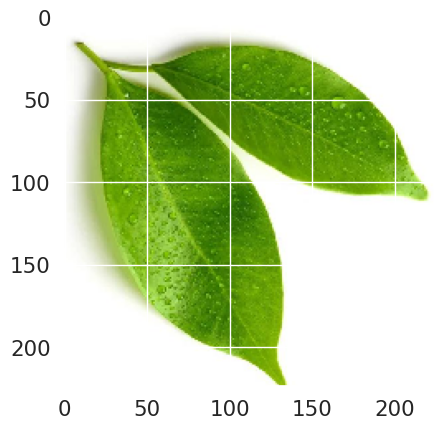

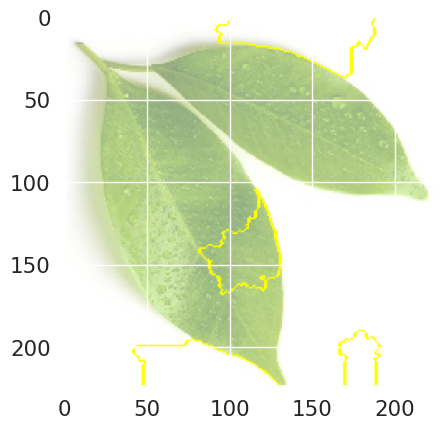

In [ ]:
import lime
from lime import lime_image
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np
from skimage.segmentation import mark_boundaries


# Load your CNN model
model = load_model(os.path.join(weights_path, 'New_Custom_cnn.h5'))

# img = image.load_img(os.path.join(temp_dir,os.listdir(temp_dir)[0]))

# Load an image for explanation
img_path = os.path.join(temp_dir,os.listdir(temp_dir)[41])  # Replace with the path to your image
img = image.load_img(img_path, target_size=(224, 224))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)

# Function to preprocess the input image for the model
def preprocess_input(img_array):
    img_array /= 255.
    # Add any additional preprocessing steps here
    return img_array

img_array = preprocess_input(img_array)

# Generate LIME explanation
explainer = lime_image.LimeImageExplainer()
explanation = explainer.explain_instance(img_array[0], model.predict, top_labels=5, hide_color=0, num_samples=1000)

# Display the original image and the LIME explanation
plt.imshow(img)
plt.show()

temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=True, num_features=5, hide_rest=False)
plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))
plt.show()